### Introduction
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

 

# 1. Basic Requirements

## 1.1 Important Libraries

In [104]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

#Other's
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

## 1.2 Dataset used for Anylysis

- **application_data.csv**  *as*  **`df1`**
- **previous_application.csv**  *as*  **`df2`**

# 2. Loading  Data "application_data.csv"

**2.0.1 Reading file**

In [2]:
df1 = pd.read_csv("application_data.csv")
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## 2.1 Inspecting The Dataframe

**2.1.1 Checking the number of rows and columns in the dataframe by using shape() func.**

In [3]:
df1.shape       

(307511, 122)

**2.1.2 Checking no. of columns with diffrent datatypes**

In [4]:
df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

**2.1.3 Checking the summary for the numeric columns**

In [5]:
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

**2.1.4 Sorting Percentage of null values in each column in desending  order**

In [6]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## 2.2 Data Cleaning

**2.2.1 List of Columns & null counts where null values are more than 35%**

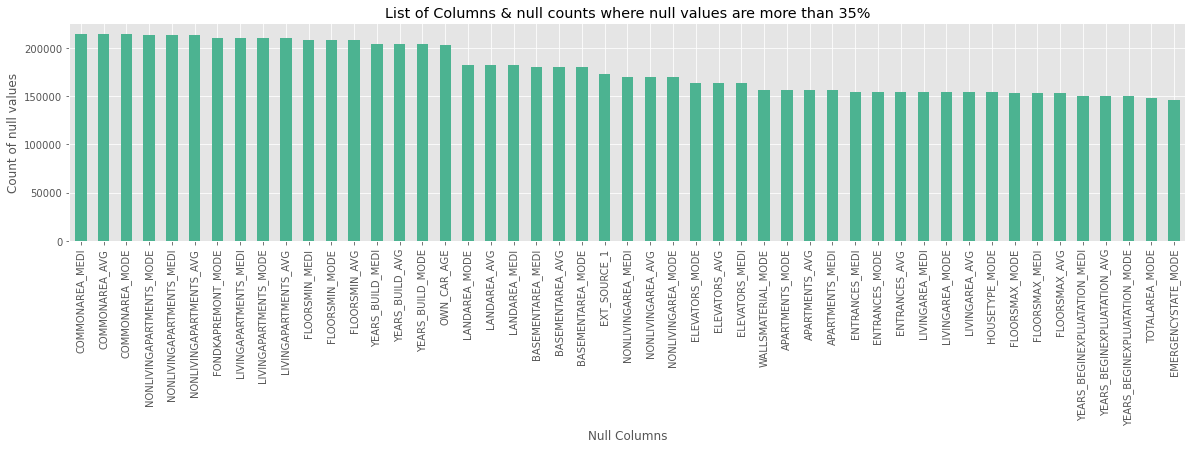

In [7]:
null_col = df1.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df1))]


#Plotting Bar Graph for null values greater than 35%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('List of Columns & null counts where null values are more than 35%') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  #Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()


**2.2.2 Total no.of columns having percentage of null values > 35%**

In [8]:
len(null_col)

49

**2.2.3 Removing the columns having percentage of null values > 35%**

In [9]:
label = list(null_col.index.values) #Making list of column names having null values greater than 35%
df1.drop(labels = label,axis=1,inplace = True) #Droping those columns

**2.2.4 Shape of new data frame after removing null values >35%**

In [10]:
df1.shape

(307511, 73)

**2.2.5 Checking the % of null values for each column in new dataset again for confirmation**

In [11]:
null = (df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
null.head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
FLAG_CONT_MOBILE               0.000000
NAME_CONTRACT_TYPE             0.000000


## 2.3 Handling Missing Values

### 2.3.1 Imputing Columns having null values ≤ 19% with Mode values for numeric columns except for continuous numeric columns we imputed with Median value

In [12]:

df1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

df1.AMT_REQ_CREDIT_BUREAU_MON.fillna(df1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

df1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

df1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

df1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

df1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

df1.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

df1.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

df1.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

df1.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

df1.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

df1.CNT_FAM_MEMBERS.fillna(df1.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

df1.DAYS_LAST_PHONE_CHANGE.fillna(df1.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

df1.EXT_SOURCE_3.fillna(df1.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

**2.3.3 Checking  if there are still null values or not in the dataframe accept column "OCCUPATION_TYPE"**

In [13]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
                                ...    
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
SK_ID_CURR                     0.000000
Length: 73, dtype: float64

### Note: 

- **Please ignore OCCUPATION_TYPE will handle the null values upcoming steps with the help of third variables if possible**

## 2.4 Handling Errors in Data types and Data

**2.4.1**

**We can  Changed the below columns**

*'DAYS_BIRTH',* 

*'DAYS_EMPLOYED',* 

*'DAYS_REGISTRATION',* 

*'DAYS_ID_PUBLISH'*

*'DAYS_LAST_PHONE_CHANGE'* 

**which had negative or mixed values and imputed them with absolute values for our analysis.**

In [14]:
df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

**2.4.2 Collecting columns starting with 'DAYS' in the list "day_cols"**

In [15]:
day_cols = [i for i in df1 if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

**2.4.3 Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive**

In [16]:
df1[day_cols]= abs(df1[day_cols])

In [17]:
print(df1['DAYS_BIRTH'].unique())
print(df1['DAYS_EMPLOYED'].unique())
print(df1['DAYS_REGISTRATION'].unique())
print(df1['DAYS_ID_PUBLISH'].unique())
print(df1['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461. 16765. 19046. ...  7951.  7857. 25061.]
[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120.  291. 2531. ... 6194. 5854. 6211.]
[1134.  828.  815. ... 3988. 3899. 3538.]


**2.4.4 Changing** **"Y"** **and** **"N"** **with 1 and 0 for** **columns** 

- **`FLAG_OWN_CAR`**

- **`FLAG_OWN_REALTY`**

In [18]:
df1['FLAG_OWN_CAR'] = np.where(df1['FLAG_OWN_CAR']=='Y', 1 , 0)

df1['FLAG_OWN_REALTY'] = np.where(df1['FLAG_OWN_REALTY']=='Y', 1 , 0)

In [19]:
df1[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].head()

FLAG_OWN_CAR  FLAG_OWN_REALTY
0             0                1
1             0                0
2             1                1
3             0                1
4             0                1

**2.4.5 As per below information we can impute the value'XNA' to "F" in the column  'CODE_GENDER" as the most frequent value is `F`**

In [20]:
df1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
df1.loc[df1.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
df1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

**2.4.6 Cheking and Imputing column ORGANIZATION_TYPE'**

In [22]:
df1.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

- Let's see if the value is `Missing Completely At Random(MCAR)`,`Missing At Random(MAR)`,`Missing Not At Random(MNAR)`

In [23]:
df1[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

- Here we observe that wherever `NAME_INCOME_TYPE` is ___Pensioner___ there only we have null values in `ORGANIZATON_TYPE` column.Let's see count of Pensioner and then we'll decide whether to impute null values of `ORGANIZATION_TYPE` with Pensioner or not.

In [24]:
df1.NAME_INCOME_TYPE.value_counts()    #Check the counts for each in NAME_INCOME_TYPE

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

- So from these data we can conclude that, Pensioner value is approximately equal to null values in `ORGANIZATION_TYPE` column.So the value is `Missing At Random`


- Similarly imputing null values of `OCCUPATION_TYPE` with ___Pensioner___ as most of the null values for OCCUPATION_TYPE compare to Income type variable values we found that "___Pensioner___" is most frequent value almost 80% of teh null values of OCCUPATION_TYPE

In [25]:
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df1['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

## 2.5 Binning of continuous variables

**2.5.1 Binning 'AMT_INCOME_TOTAL' to AMT_INCOME_TYPE based on quantiles**

In [26]:
df1['AMT_INCOME_TYPE'] = pd.qcut(df1.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

**2.5.2 Binning 'AMT_CREDIT' to 'AMT_CREDIT_TYPE' based on quantiles**

In [27]:
df1['AMT_CREDIT_TYPE'] = pd.qcut(df1.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df1['AMT_CREDIT_TYPE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

**2.5.3 Binning 'DAYS_BIRTH' column  by converting it to years based on various "AGE_GROUP"**

In [28]:
df1['DAYS_BIRTH']= (df1['DAYS_BIRTH']/365).astype(int)    # Converting 
df1['DAYS_BIRTH'].unique()


array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [29]:
df1['AGE_GROUP']=pd.cut(df1['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])   #Binning

In [30]:
df1[['DAYS_BIRTH','AGE_GROUP']].head()    

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

# 3. Analysis

## 3.1 Dataypes Conversion's for better understanding of Variables

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

**3.1.1 Found out few catogrical columns are showing dtype as "object" hence changing dtypes of columns from object to "categorical"**

In [32]:
df1['NAME_CONTRACT_TYPE'] = df1['NAME_CONTRACT_TYPE'].astype('category')
df1['CODE_GENDER'] = df1['CODE_GENDER'].astype('category')
df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].astype('category')
df1['NAME_INCOME_TYPE'] = df1['NAME_INCOME_TYPE'].astype('category')
df1['NAME_EDUCATION_TYPE'] = df1['NAME_EDUCATION_TYPE'].astype('category')
df1['NAME_FAMILY_STATUS'] = df1['NAME_FAMILY_STATUS'].astype('category')
df1['NAME_HOUSING_TYPE'] = df1['NAME_HOUSING_TYPE'].astype('category')
df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].astype('category')
df1['WEEKDAY_APPR_PROCESS_START'] = df1['WEEKDAY_APPR_PROCESS_START'].astype('category')
df1['ORGANIZATION_TYPE'] = df1['ORGANIZATION_TYPE'].astype('category')

**3.1.2 Datatypes corrected**

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

**3.1.3 Removing unwanted columns so that will not get confused and our Data looks Clear**

In [34]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df1.drop(labels=unwanted,axis=1,inplace=True)

## 3.2 Finding and Analysing Outliers

**3.2.1 Checking total no. of Numerical columns after removing unwanted columns**

In [35]:
numerical_col = df1.select_dtypes(include='number').columns
len(numerical_col)

35

**3.2.2 Boxplots distribution for each numerical_col using** ***`"for"`***  **loop**

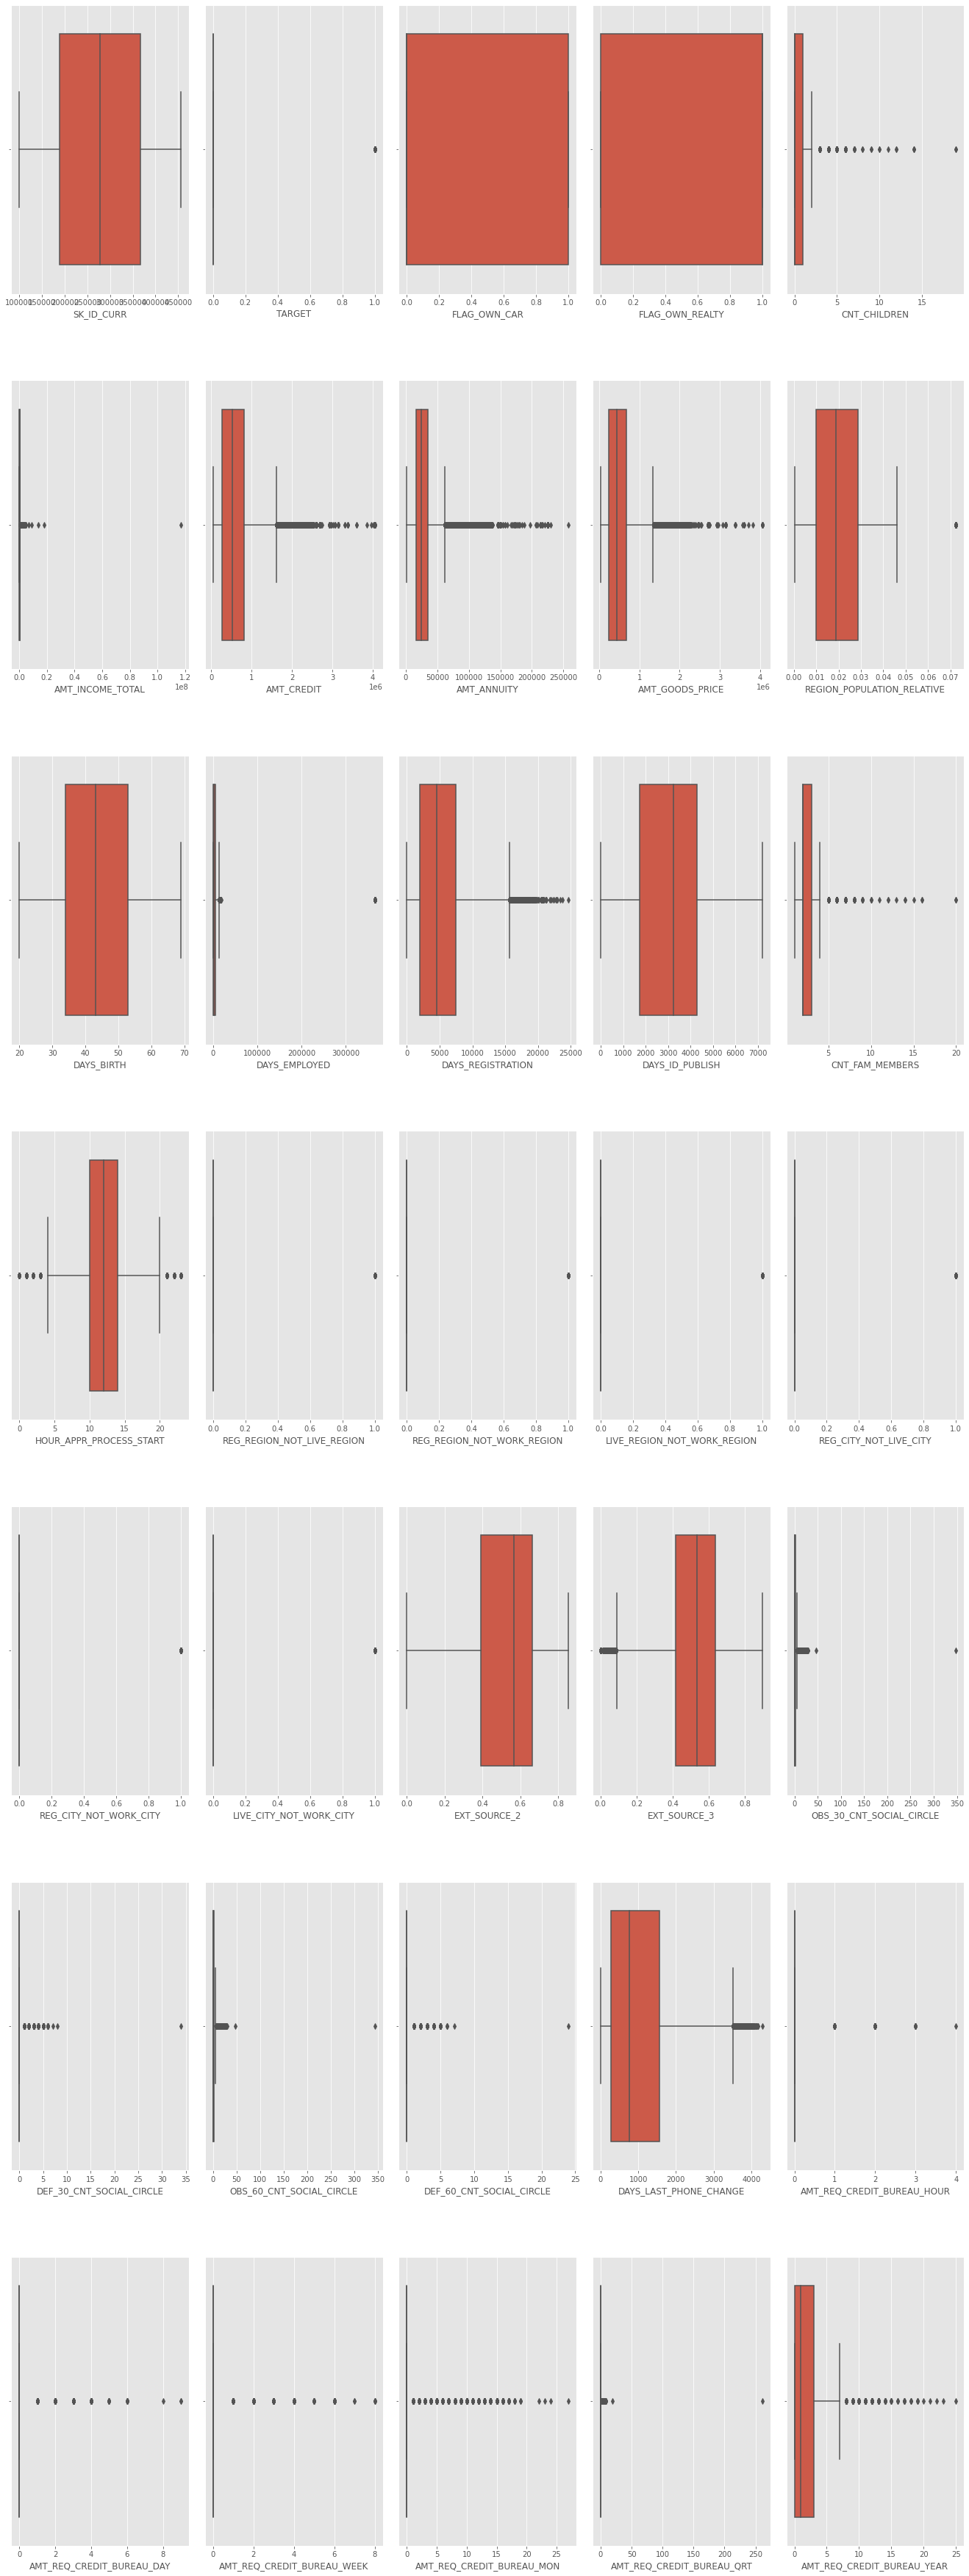

In [36]:
fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop 

    sns.boxplot(df1[column],ax=ax)   #Ploting 

## Insight:

- **`CNT_CHILDREN`** have outlier values having children more than 5.
- IQR for **`AMT_INCOME_TOTAL`** is very slim and it have a large number of outliers.
- Third quartile of **`AMT_CREDIT`** is larger as compared to First quartile which means that most of the **Credit amount of the loan** of customers are present in the third quartile.And there are large number of outliers present in **`AMT_CREDIT`**.
- Third quartile of **`AMT_ANNUITY`** is slightly larger than First quartile and there are large number of outliers.
- Third quartile of **`AMT_GOODS_PRICE`**,**`DAYS_REGISTRATION`** AND **`DAYS_LAST_PHONE_CHANGE`** is larger as compared to First quartile and all have a large number of outliers.
- IQR for **`DAYS EMPLOYED`** is very slim.Most of the outliers are present below 25000.And a outlier is present 375000.
- From boxplot of **`CNT_FAM_MEMBERS`** ,we can say that most of the clients have 4 family members.There are some outliers present.
- **`DAYS_BIRTH`** ,**`DAYS_ID_PUBLISH`** and **`EXT_SOURCE_2`**,**`EXT_SOURCE_3`** don't have any outliers.
- Boxplot for **`DAYS_EMPLOYED`** ,**`OBS_30_CNT_SOCIAL_CIRCLE`**, **`DEF_30_CNT_SOCIAL_CIRCLE`**,**`OBS_60_CNT_SOCIAL_CIRCLE`**, **`DEF_60_CNT_SOCIAL_CIRCLE`**,**`AMT_REQ_CREDIT_BUREAU_HOUR`**,**`AMT_REQ_CREDIT_BUREAU_DAY`**, **`AMT_REQ_CREDIT_BUREAU_WEEK`**,**`AMT_REQ_CREDIT_BUREAU_MON`**, **`AMT_REQ_CREDIT_BUREAU_QRT`** and **`AMT_REQ_CREDIT_BUREAU_YEAR`**are very slim and have a large number of outliers.
- **`FLAG_OWN_CAR`** : It doesn't have First and Third quantile and values lies within IQR,So we can conclude that,most of the clients **own a car**
- **`FLAG_OWN_REALTY`** : It doesn't have First and Third quantile and values lies within IQR,So we can conclude that,most of the clients **own a House/Flat**

# 4. Checking Data  Imbalance for Target Variable

## 4.1 Splitting original dataframe into two dataframes based on TARGET values

In [37]:
Target0 = df1.loc[df1["TARGET"]==0]
Target1 = df1.loc[df1["TARGET"]==1]

**4.1.1 Calculating Imbalance percentage**

In [38]:
round(len(Target0)/len(Target1),2)

11.39

*The Imbalance ratio is* ***`"11.39"`***

**4.2.2 Checking data Imbalance by using PIE CHART**

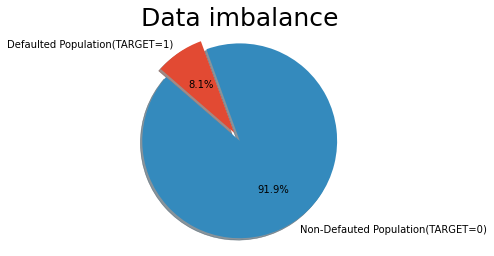

In [39]:
count1 = 0 
count0 = 0
for i in df1['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df1['TARGET']))*100
count0 = (count0/len(df1['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

## Insight:

- df1 dataframe that is application data is highly imbalanced. **`Defaulted population is 8.1 % and non- defaulted population is 91.9%`** .Ratio is **`11.3`**

# 5. Univariante Analysis of Categorical columns with respect to Target variable

## 5.1 Gender Distribution based Target 0 and Target 1

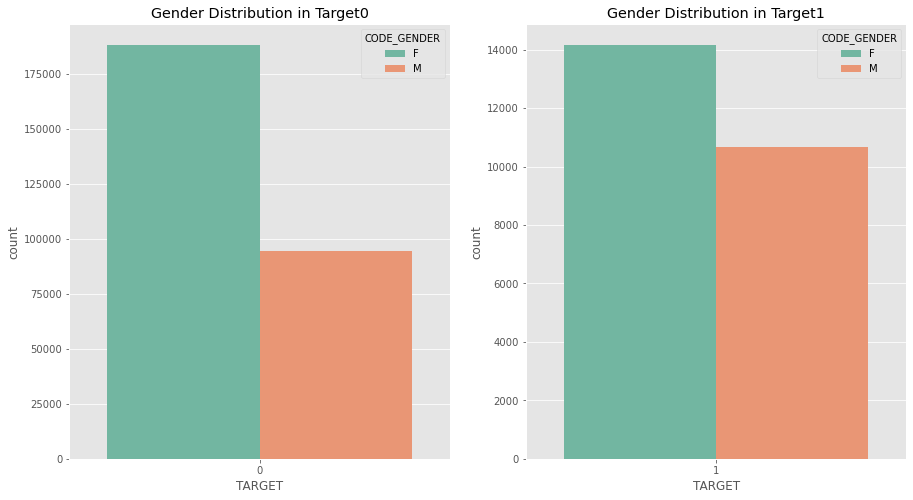

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

## Insights:
- It seems like **Female clients applied higher than male clients for loan**
- **`66.6% Female`** clients are **non-defaulters** while **`33.4% male`** clients are **non-defaulters**.
- **`57% Female`** clients are **defaulters** while **`42% male`** clients are **defaulters**.

## 5.2 AGE Distribution based on  Target 0 and Target 1

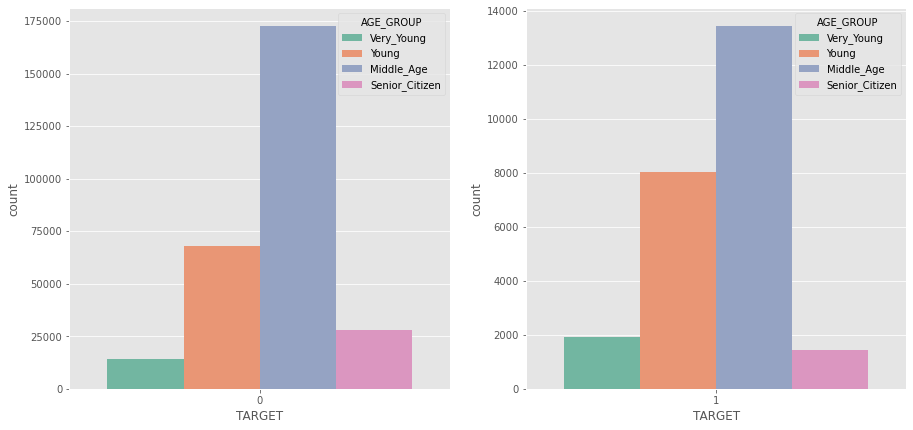

In [41]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

## Insights:

- **`Middle Age(35-60)`** group seems to applied higher than any other age group for loan in case of Defaulters as well as Non-defaulters.


- Also , **`Middle Age`** group facing paying difficulties the most.



- While **`Senior Citizens(60-100)`** and **`Very young(19-25)`** age group facing paying difficulties less as compared to other age groups.

## 5.3  ORGANIZATION'S distribution based on  Target 0 and Target 1

<Figure size 2880x360 with 0 Axes>

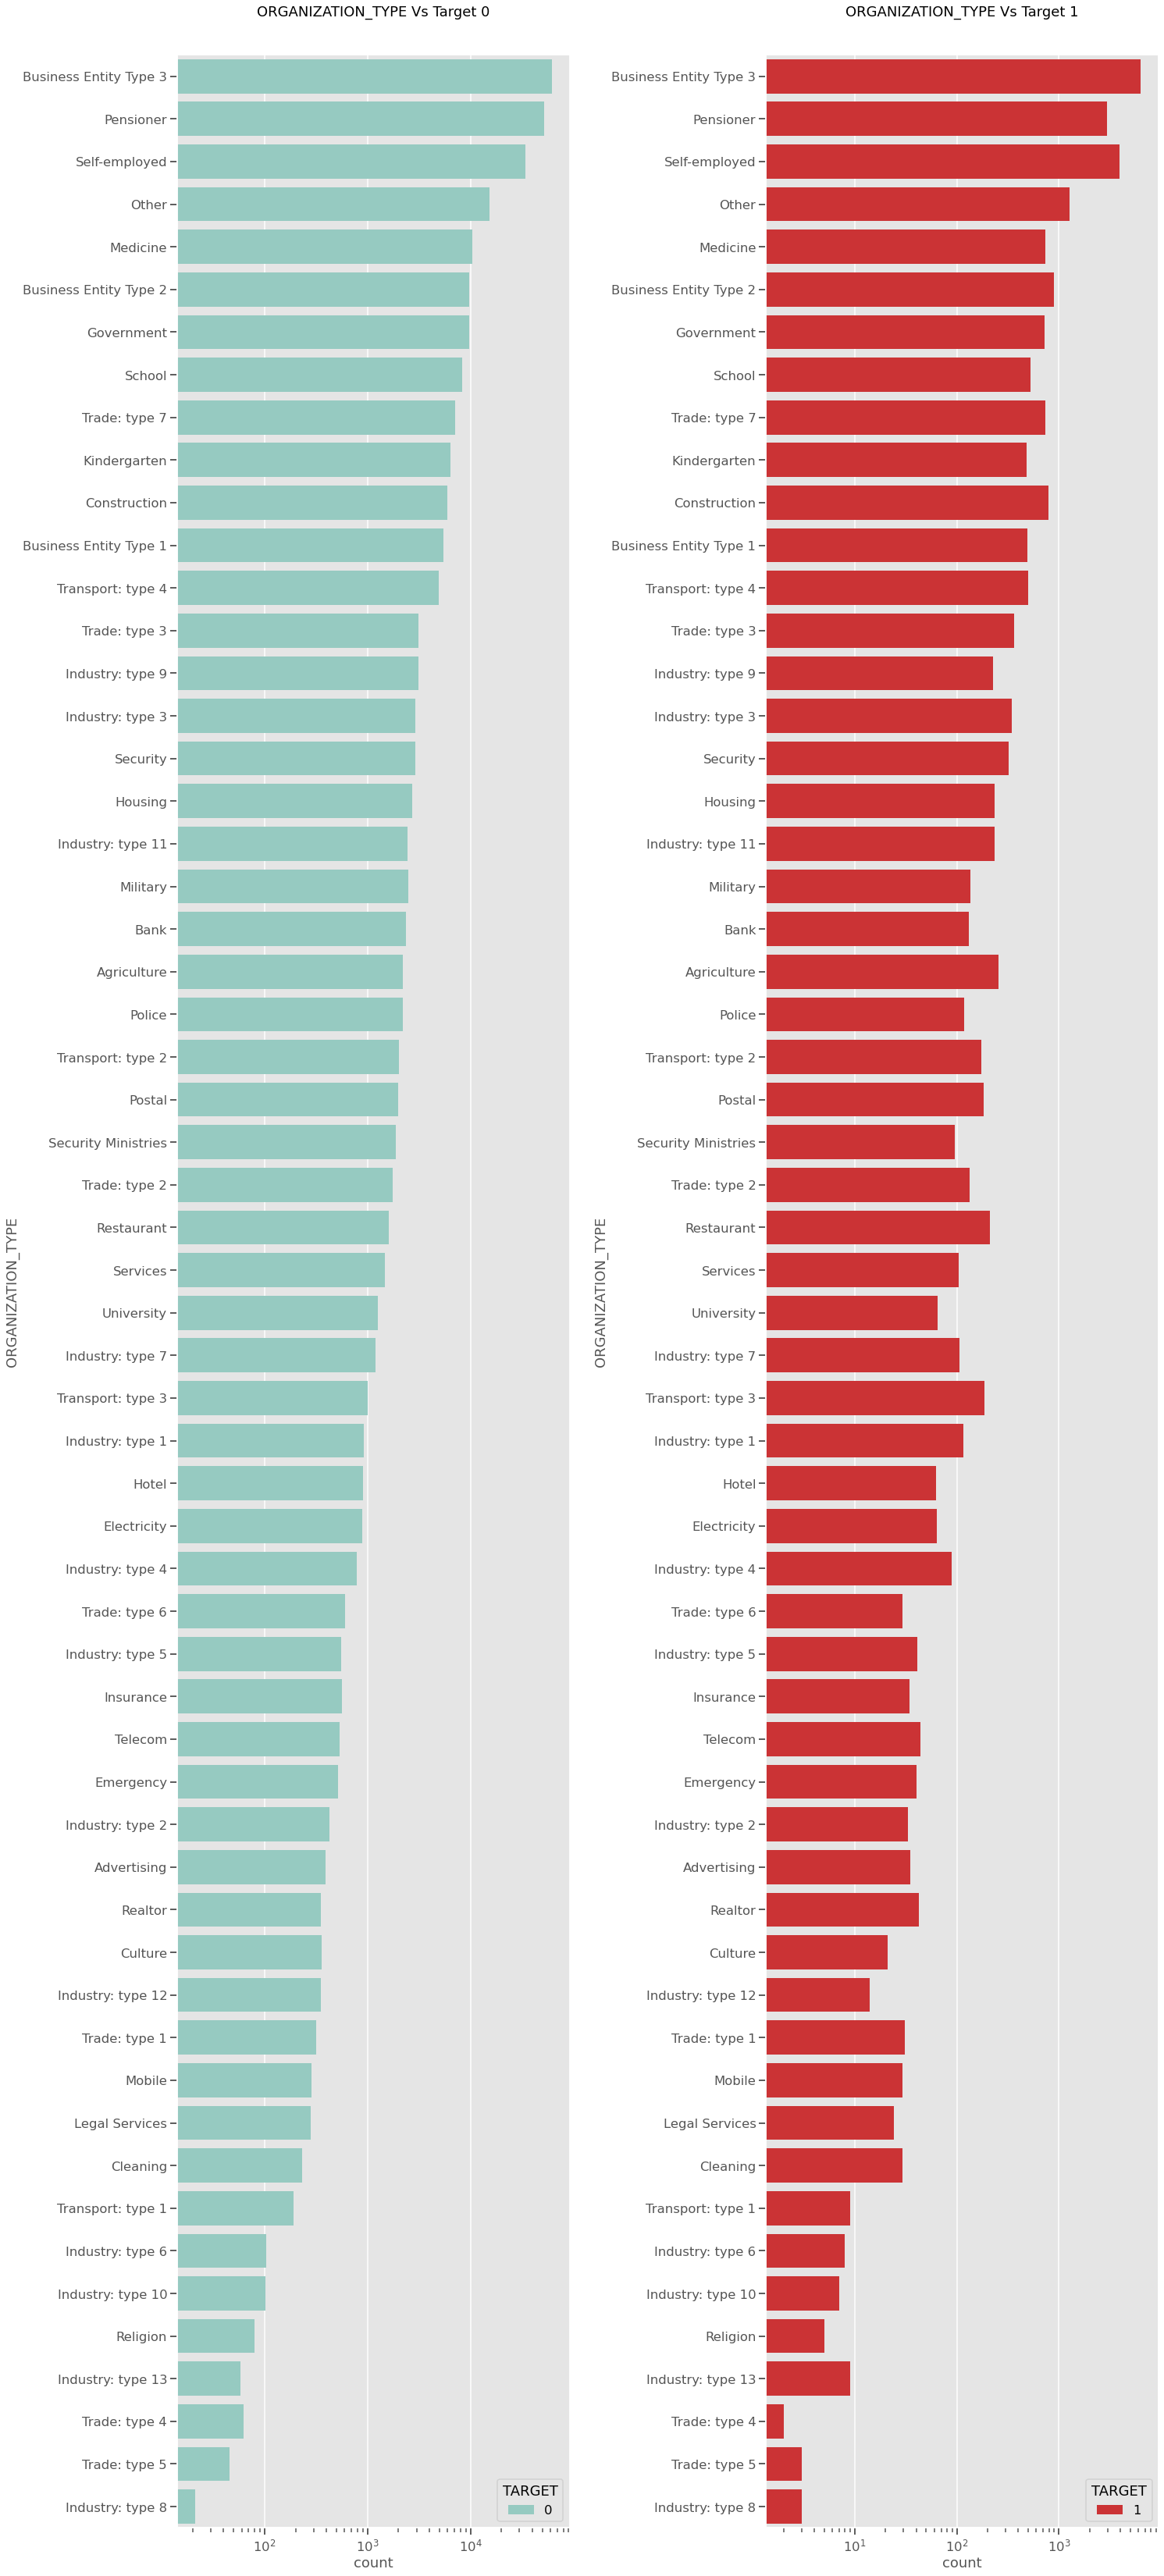

In [42]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration 
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)                  
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 


plt.subplot(121)
plt.xscale('log')                                                                             # For Target0      
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")



plt.show();

## Insights:

- ___(Defaulters as well as Non-defaulters)___ Clients with ORGANIZATION_TYPE **`Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2`** applied the most for the loan as compared to others



- ___(Defaulters as well as Non-defaulters)___ Clients having ORGANIZATION_TYPE **`Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8`** applied lower for the loan  as compared to others.


## 5.4 Similarly for below Catogrical columns 

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE']
 
### it will be hectic to write a code for each.So we will create  Function and  ___`for loop`___ to plot graph for each column with specific Titles

### 5.4.1 Creating function to plot  graphs for all the Catogrical columns WRT  Target 0 and Target 1

In [43]:
def categorical_plot(var):
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=Target0, palette = 'Set3', hue='TARGET') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=Target1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()
    

**5.4.2 Filtering all catogrical columns from df1**

In [44]:

categorical_col = list(df1.select_dtypes(include= 'category').columns) 


# Removing 'ORGANIZATION_TYPE','CODE_GENDER','AGE_GROUP' because we have already taken up the isights from  above plots

categorical_col.remove('ORGANIZATION_TYPE') 
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')

categorical_col #Checking after removing columns 

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE']

**5.4.3 Using for loop for all columns distribution at a time**

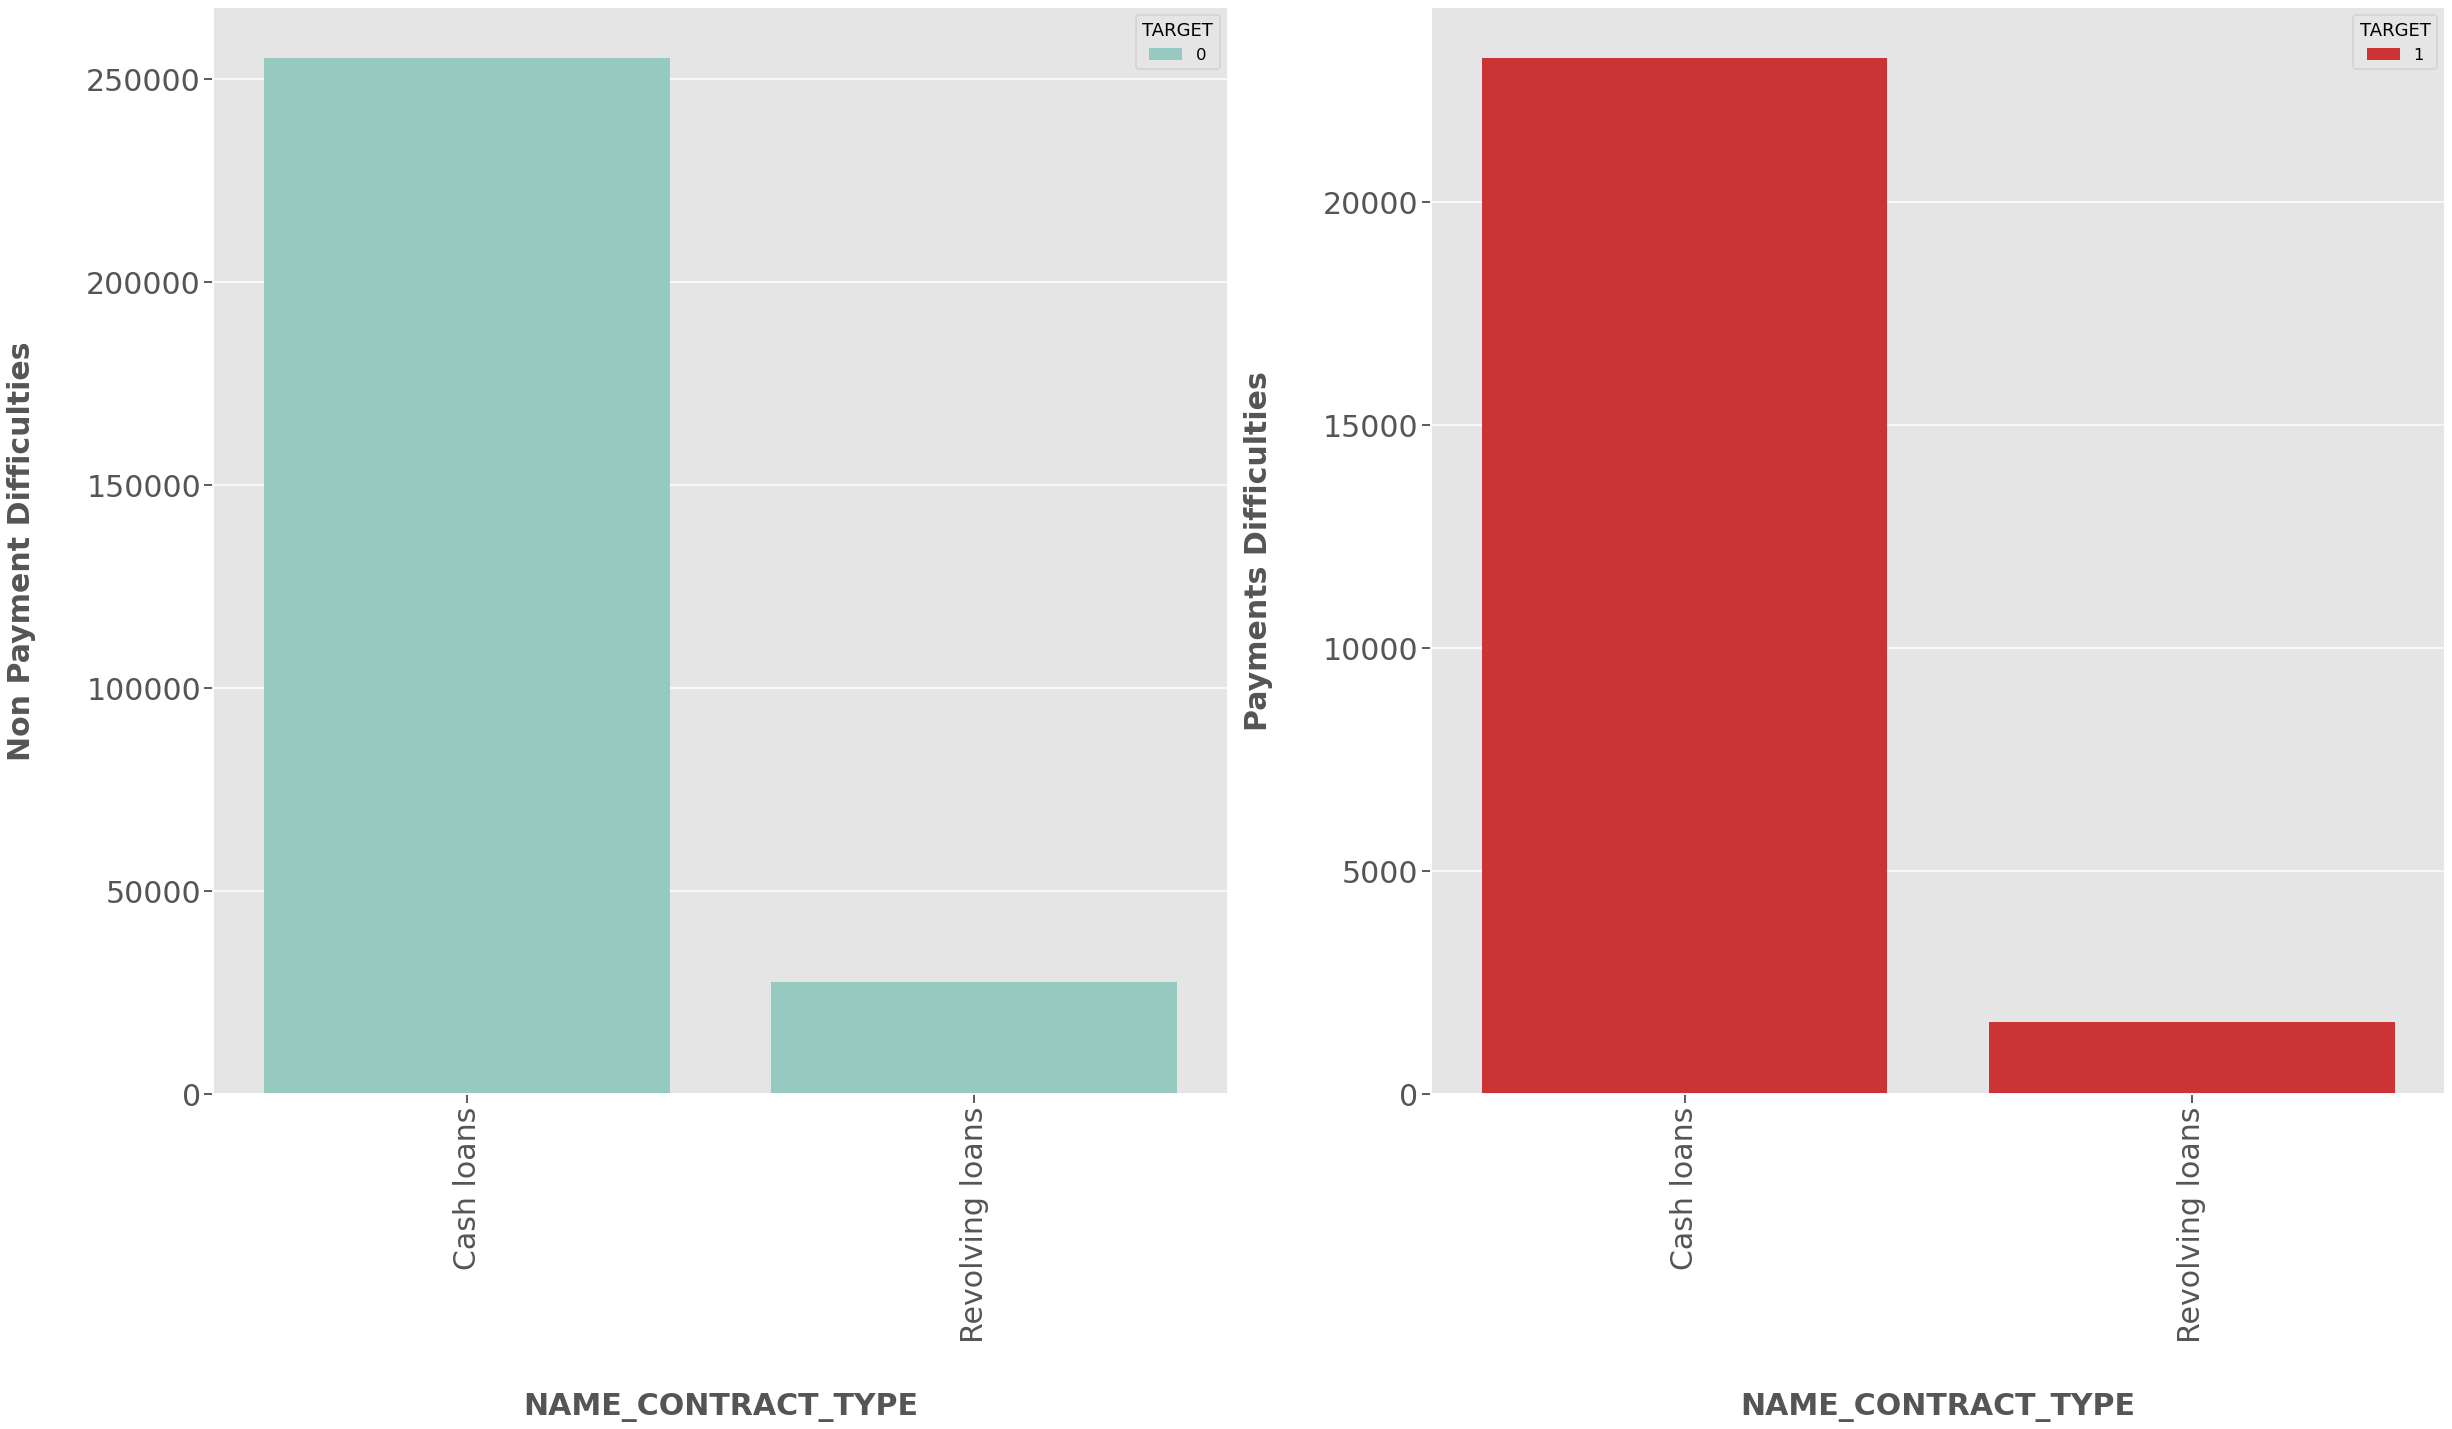

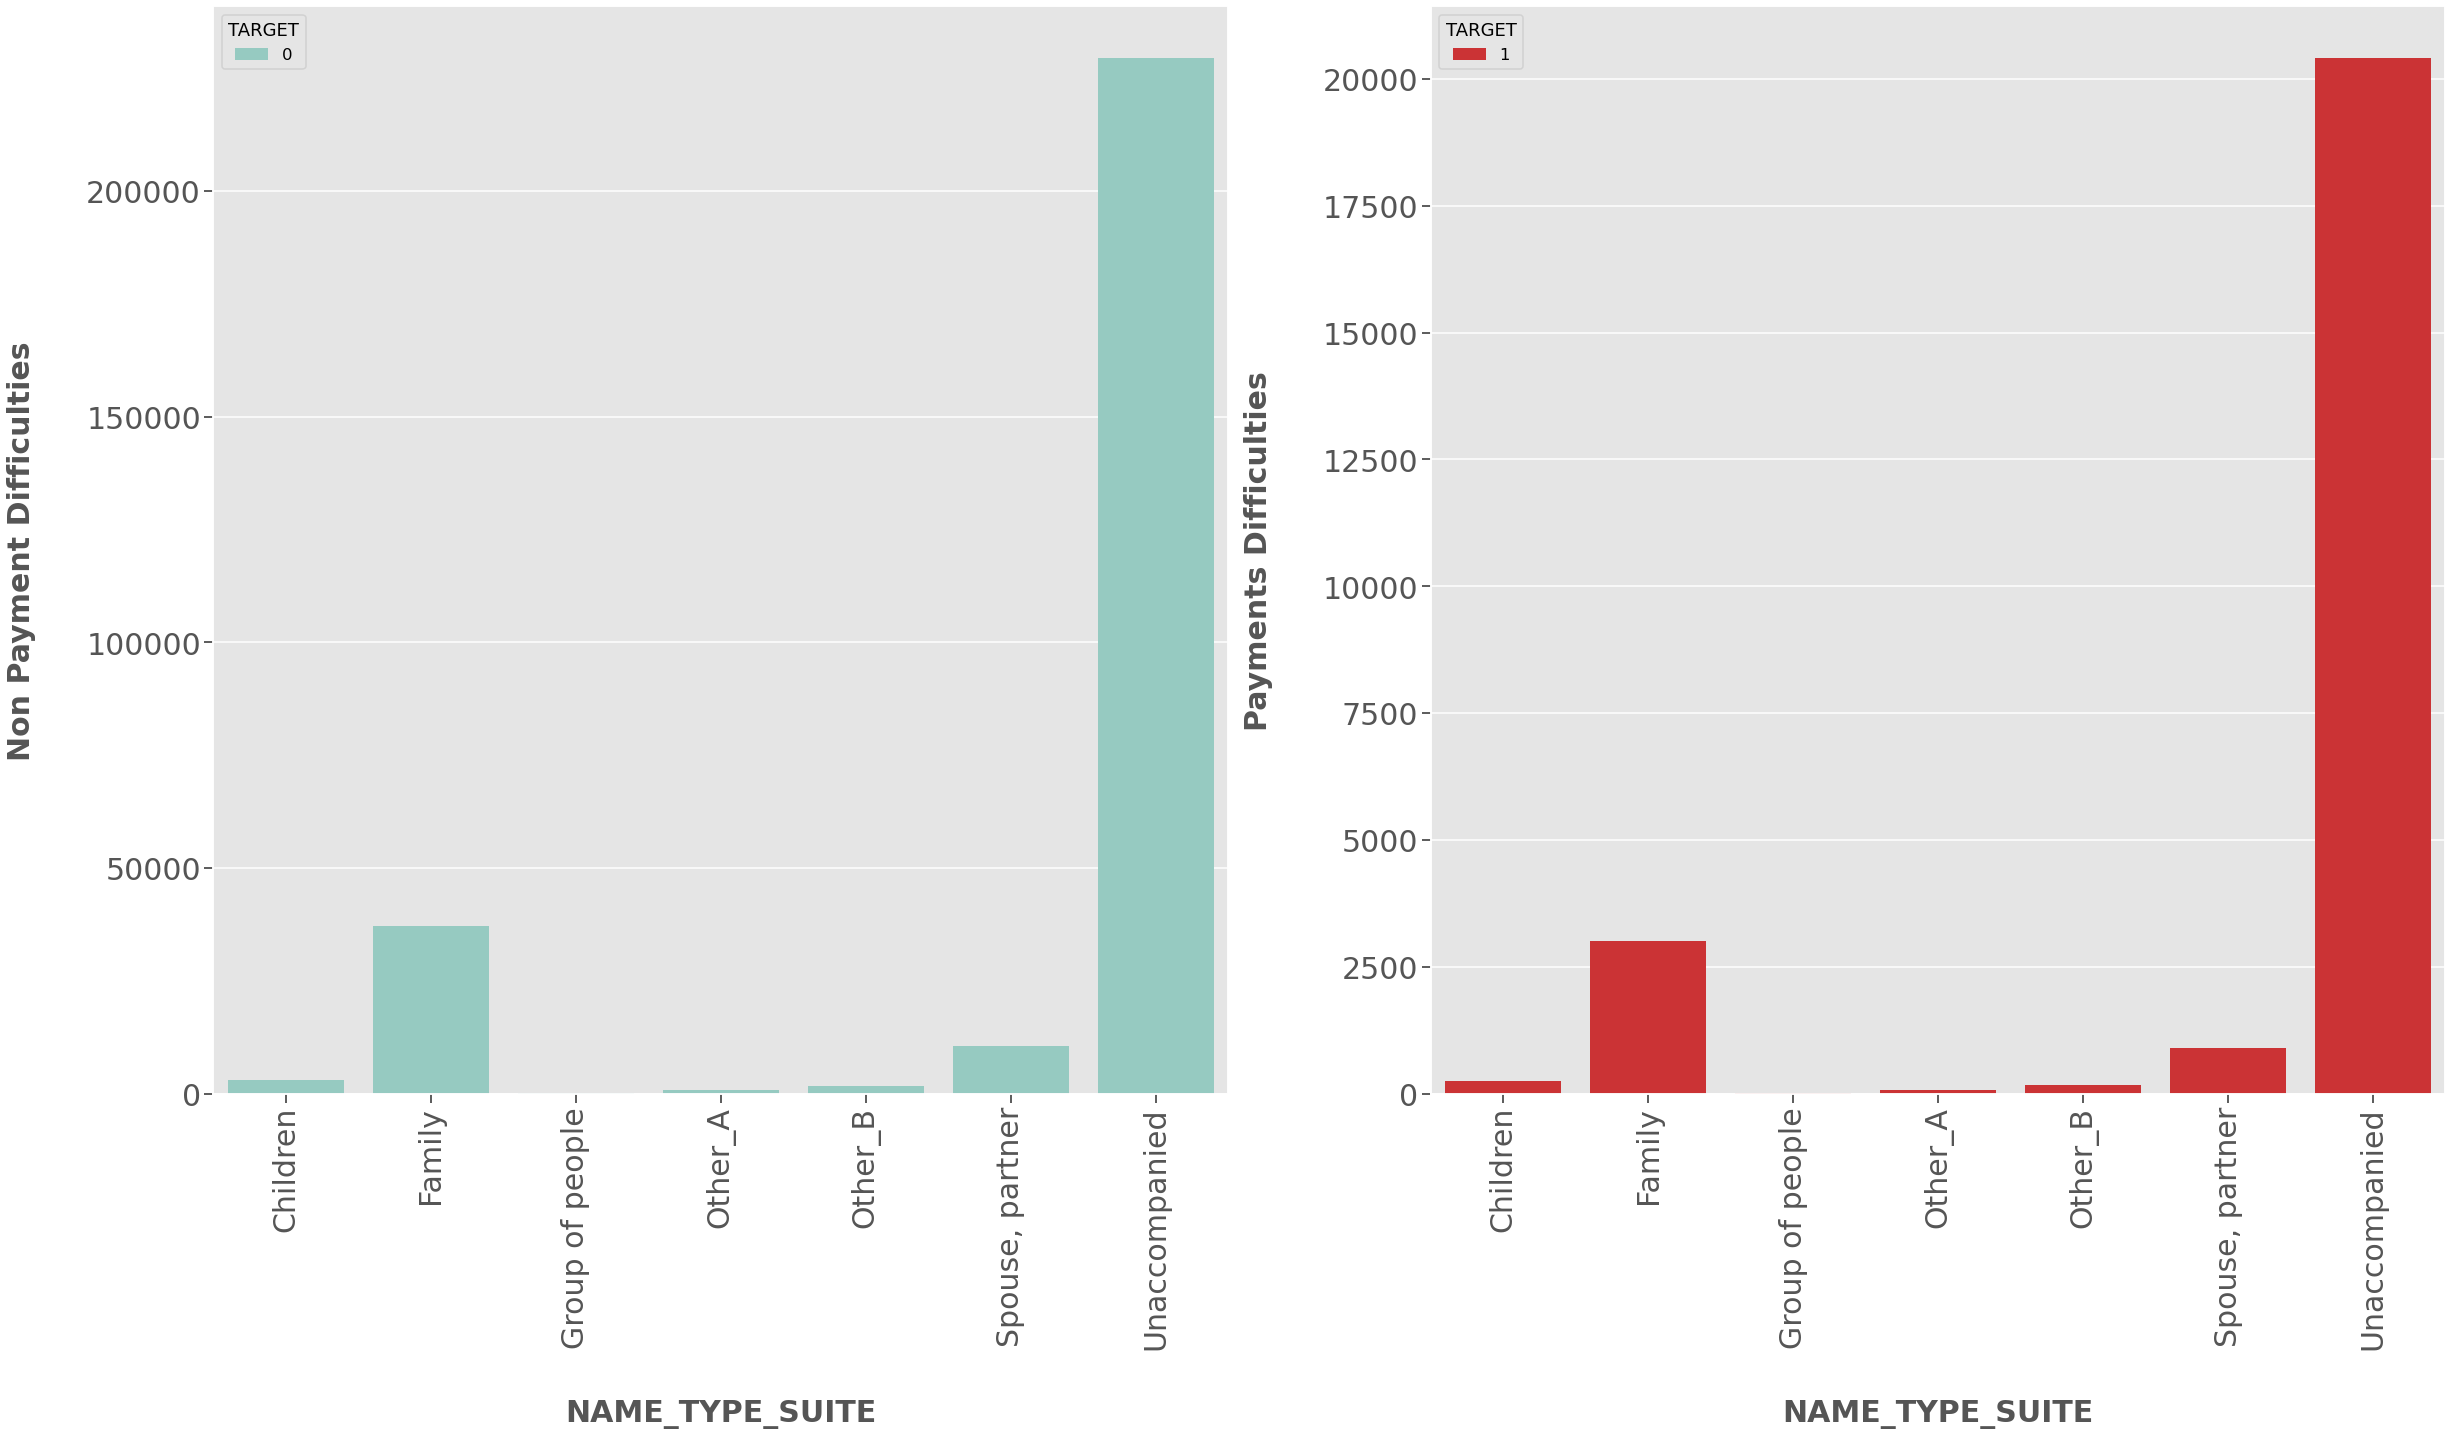

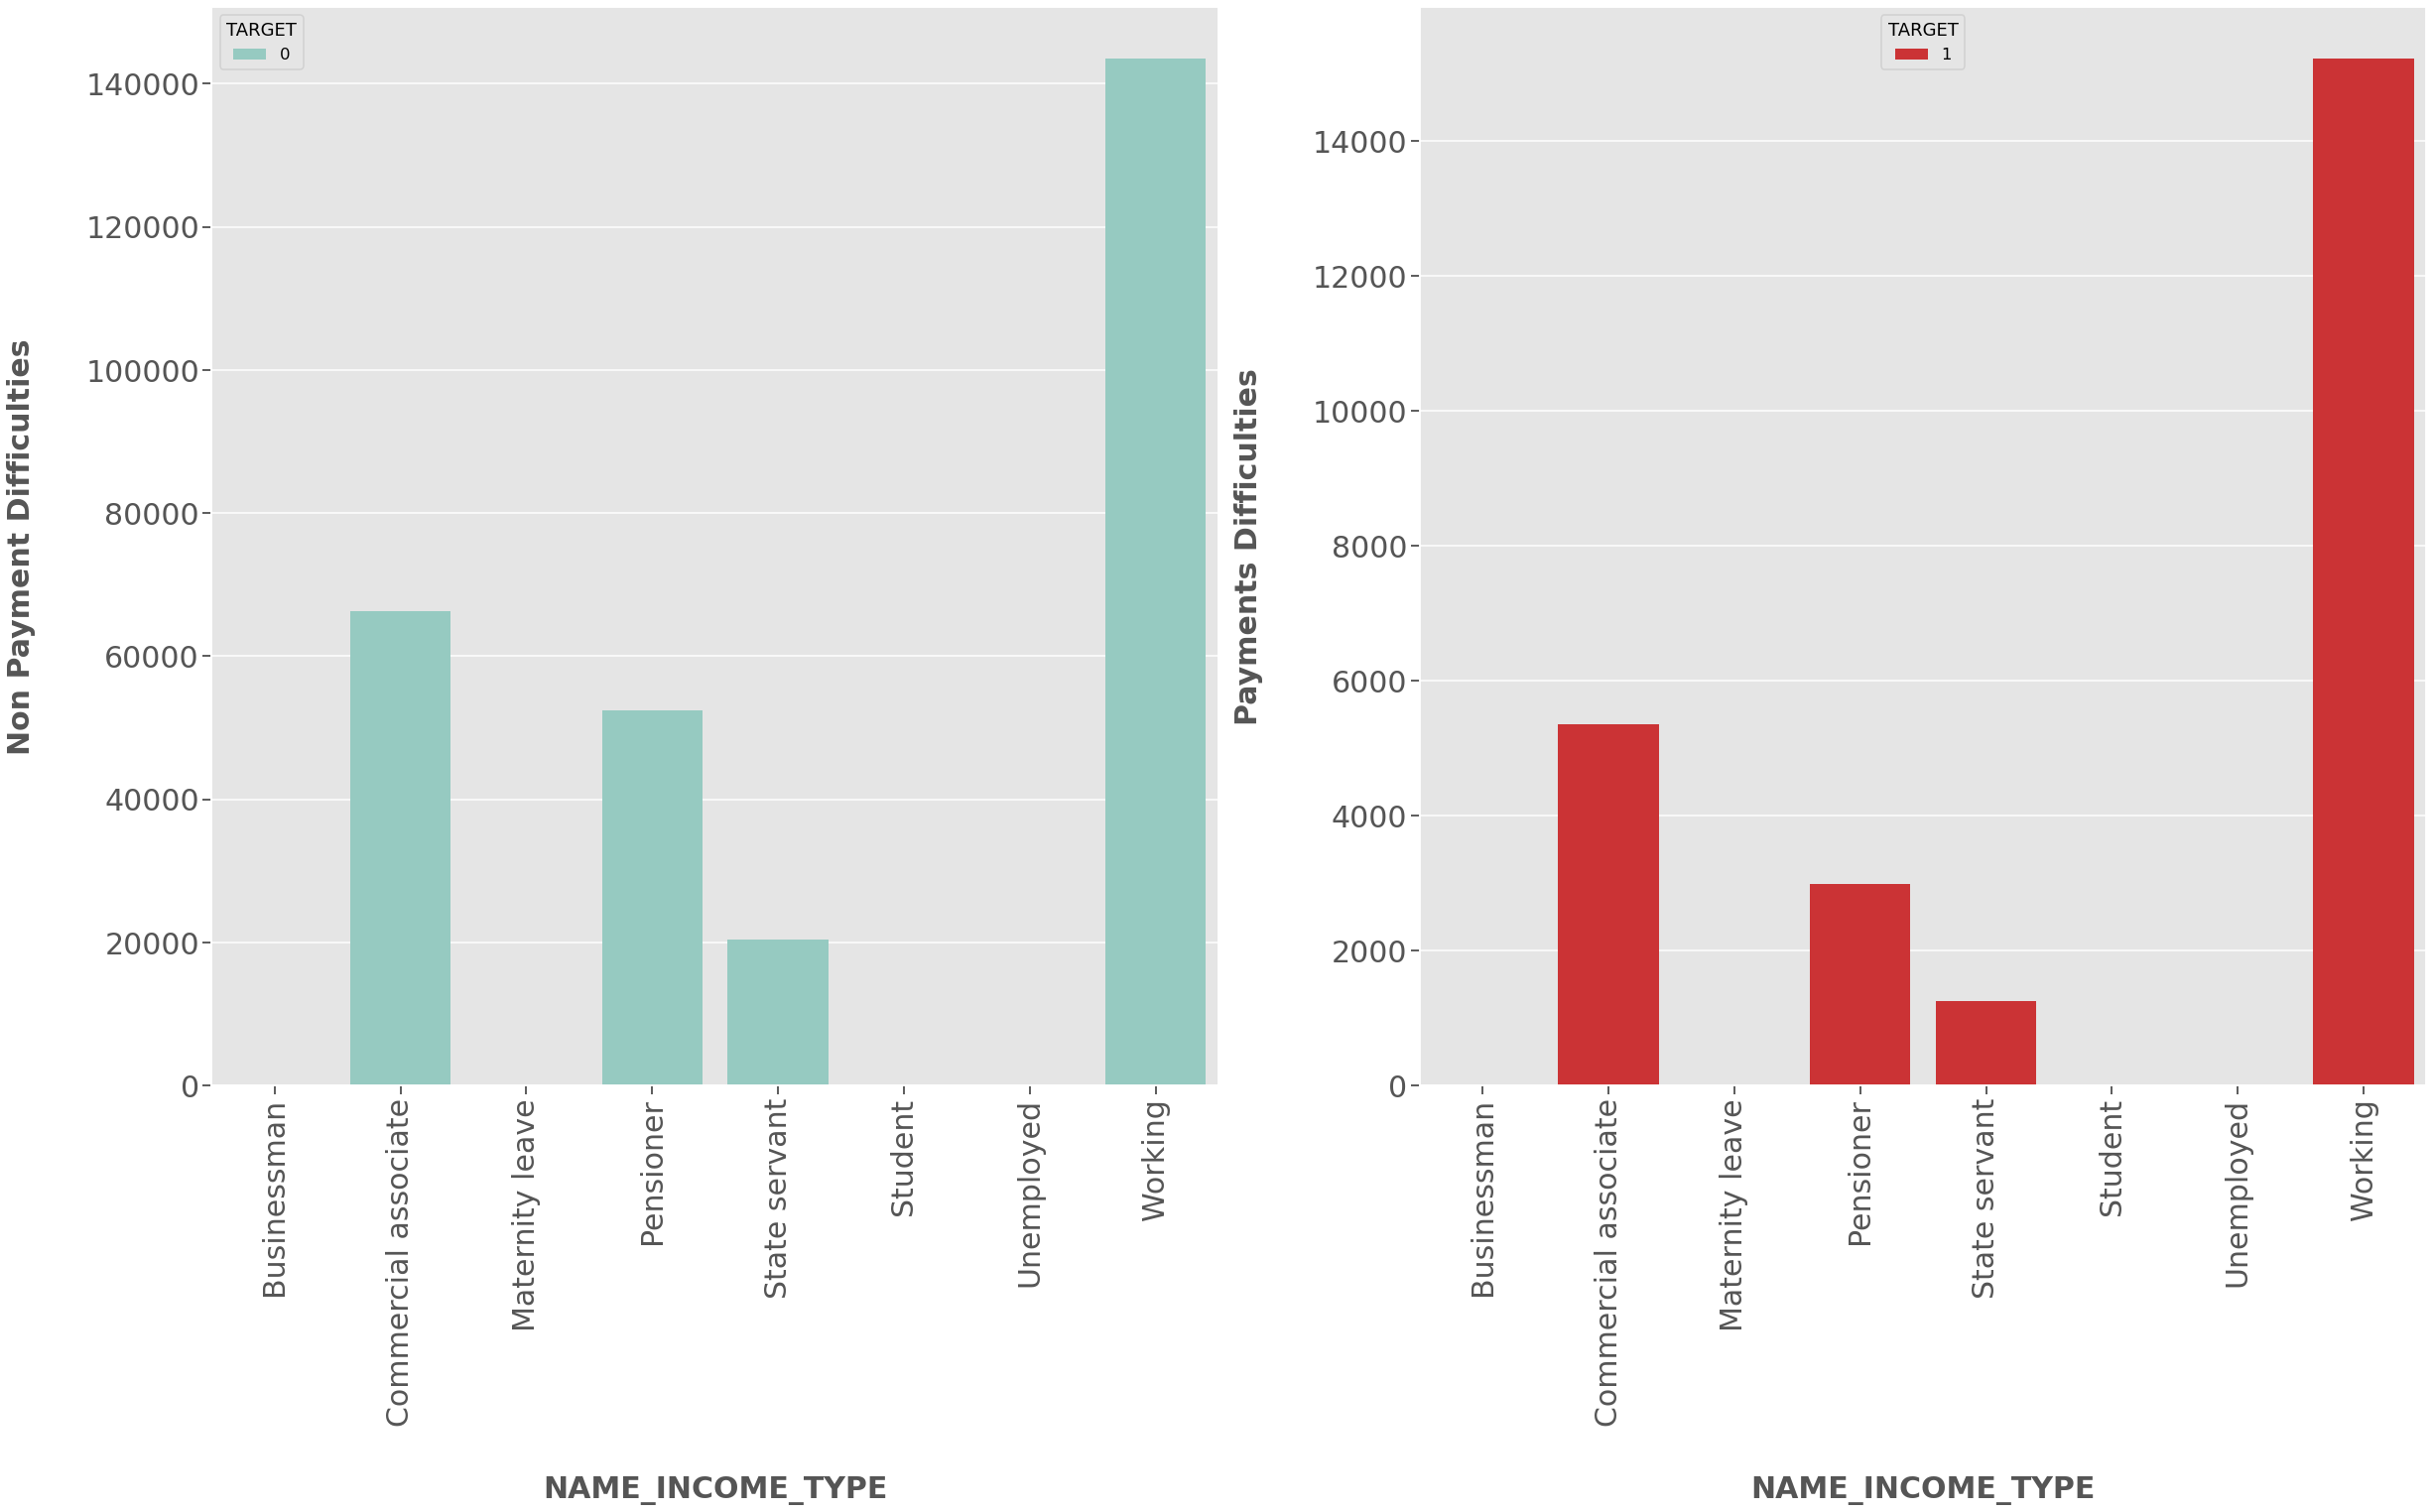

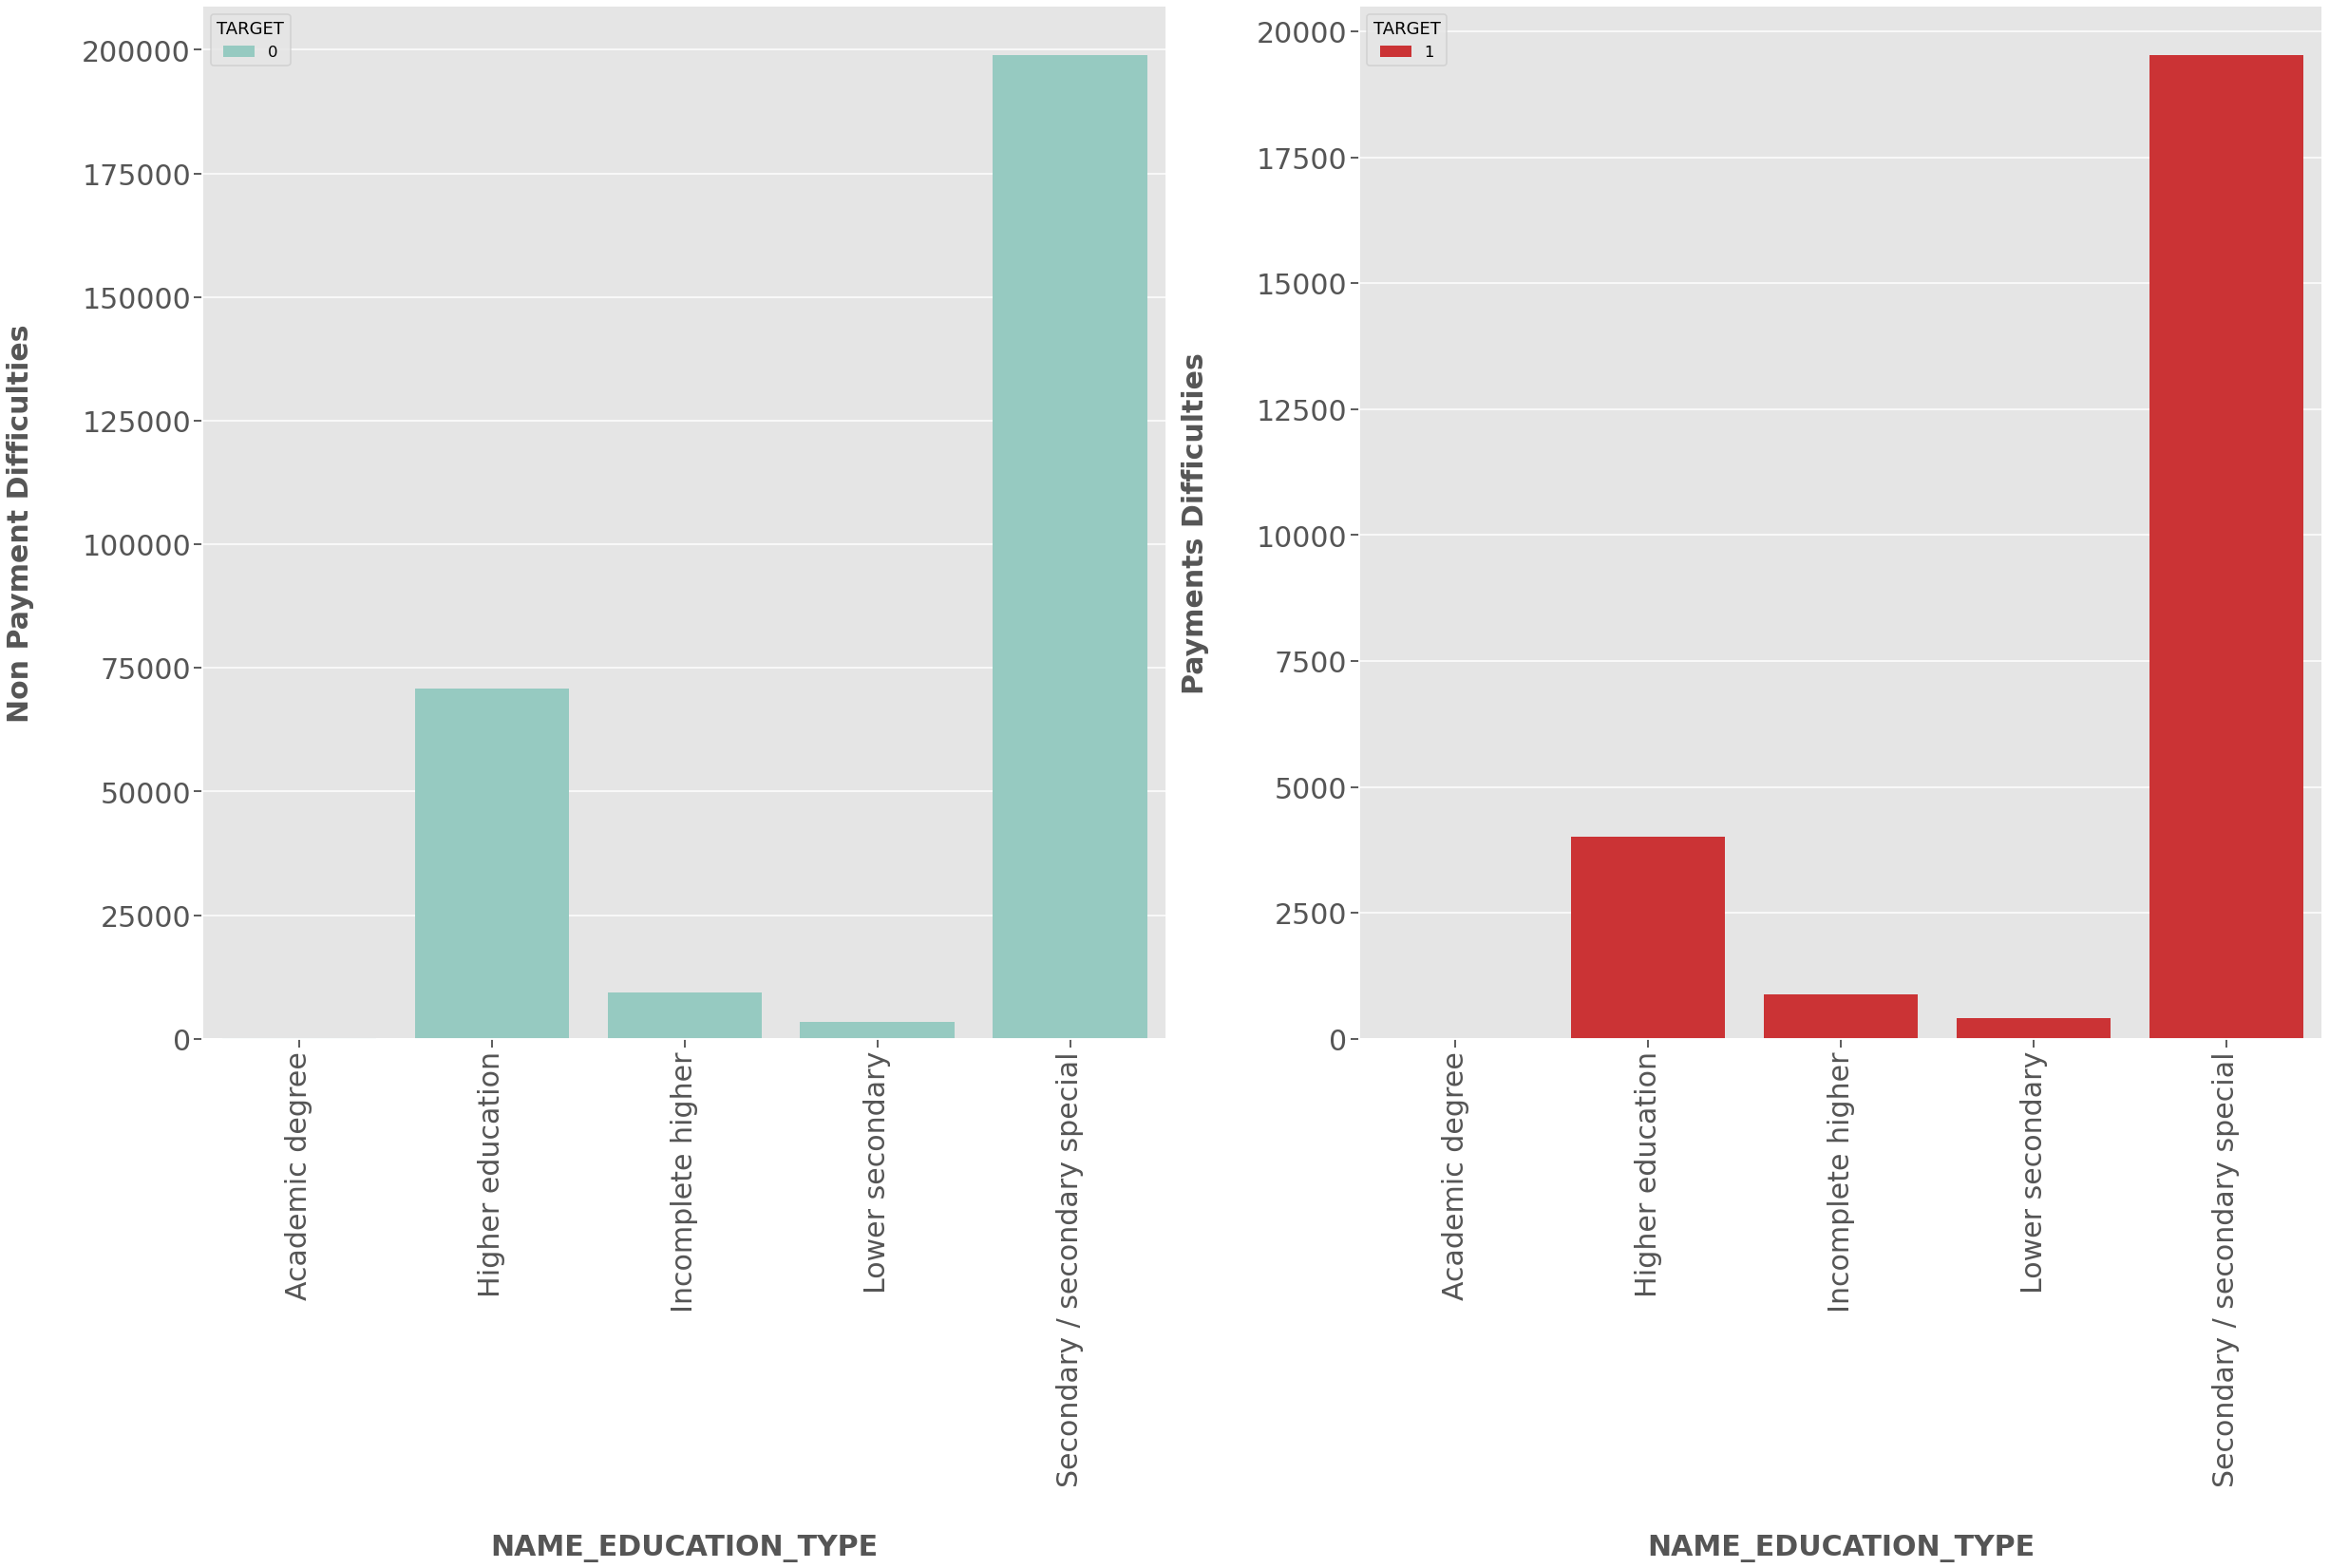

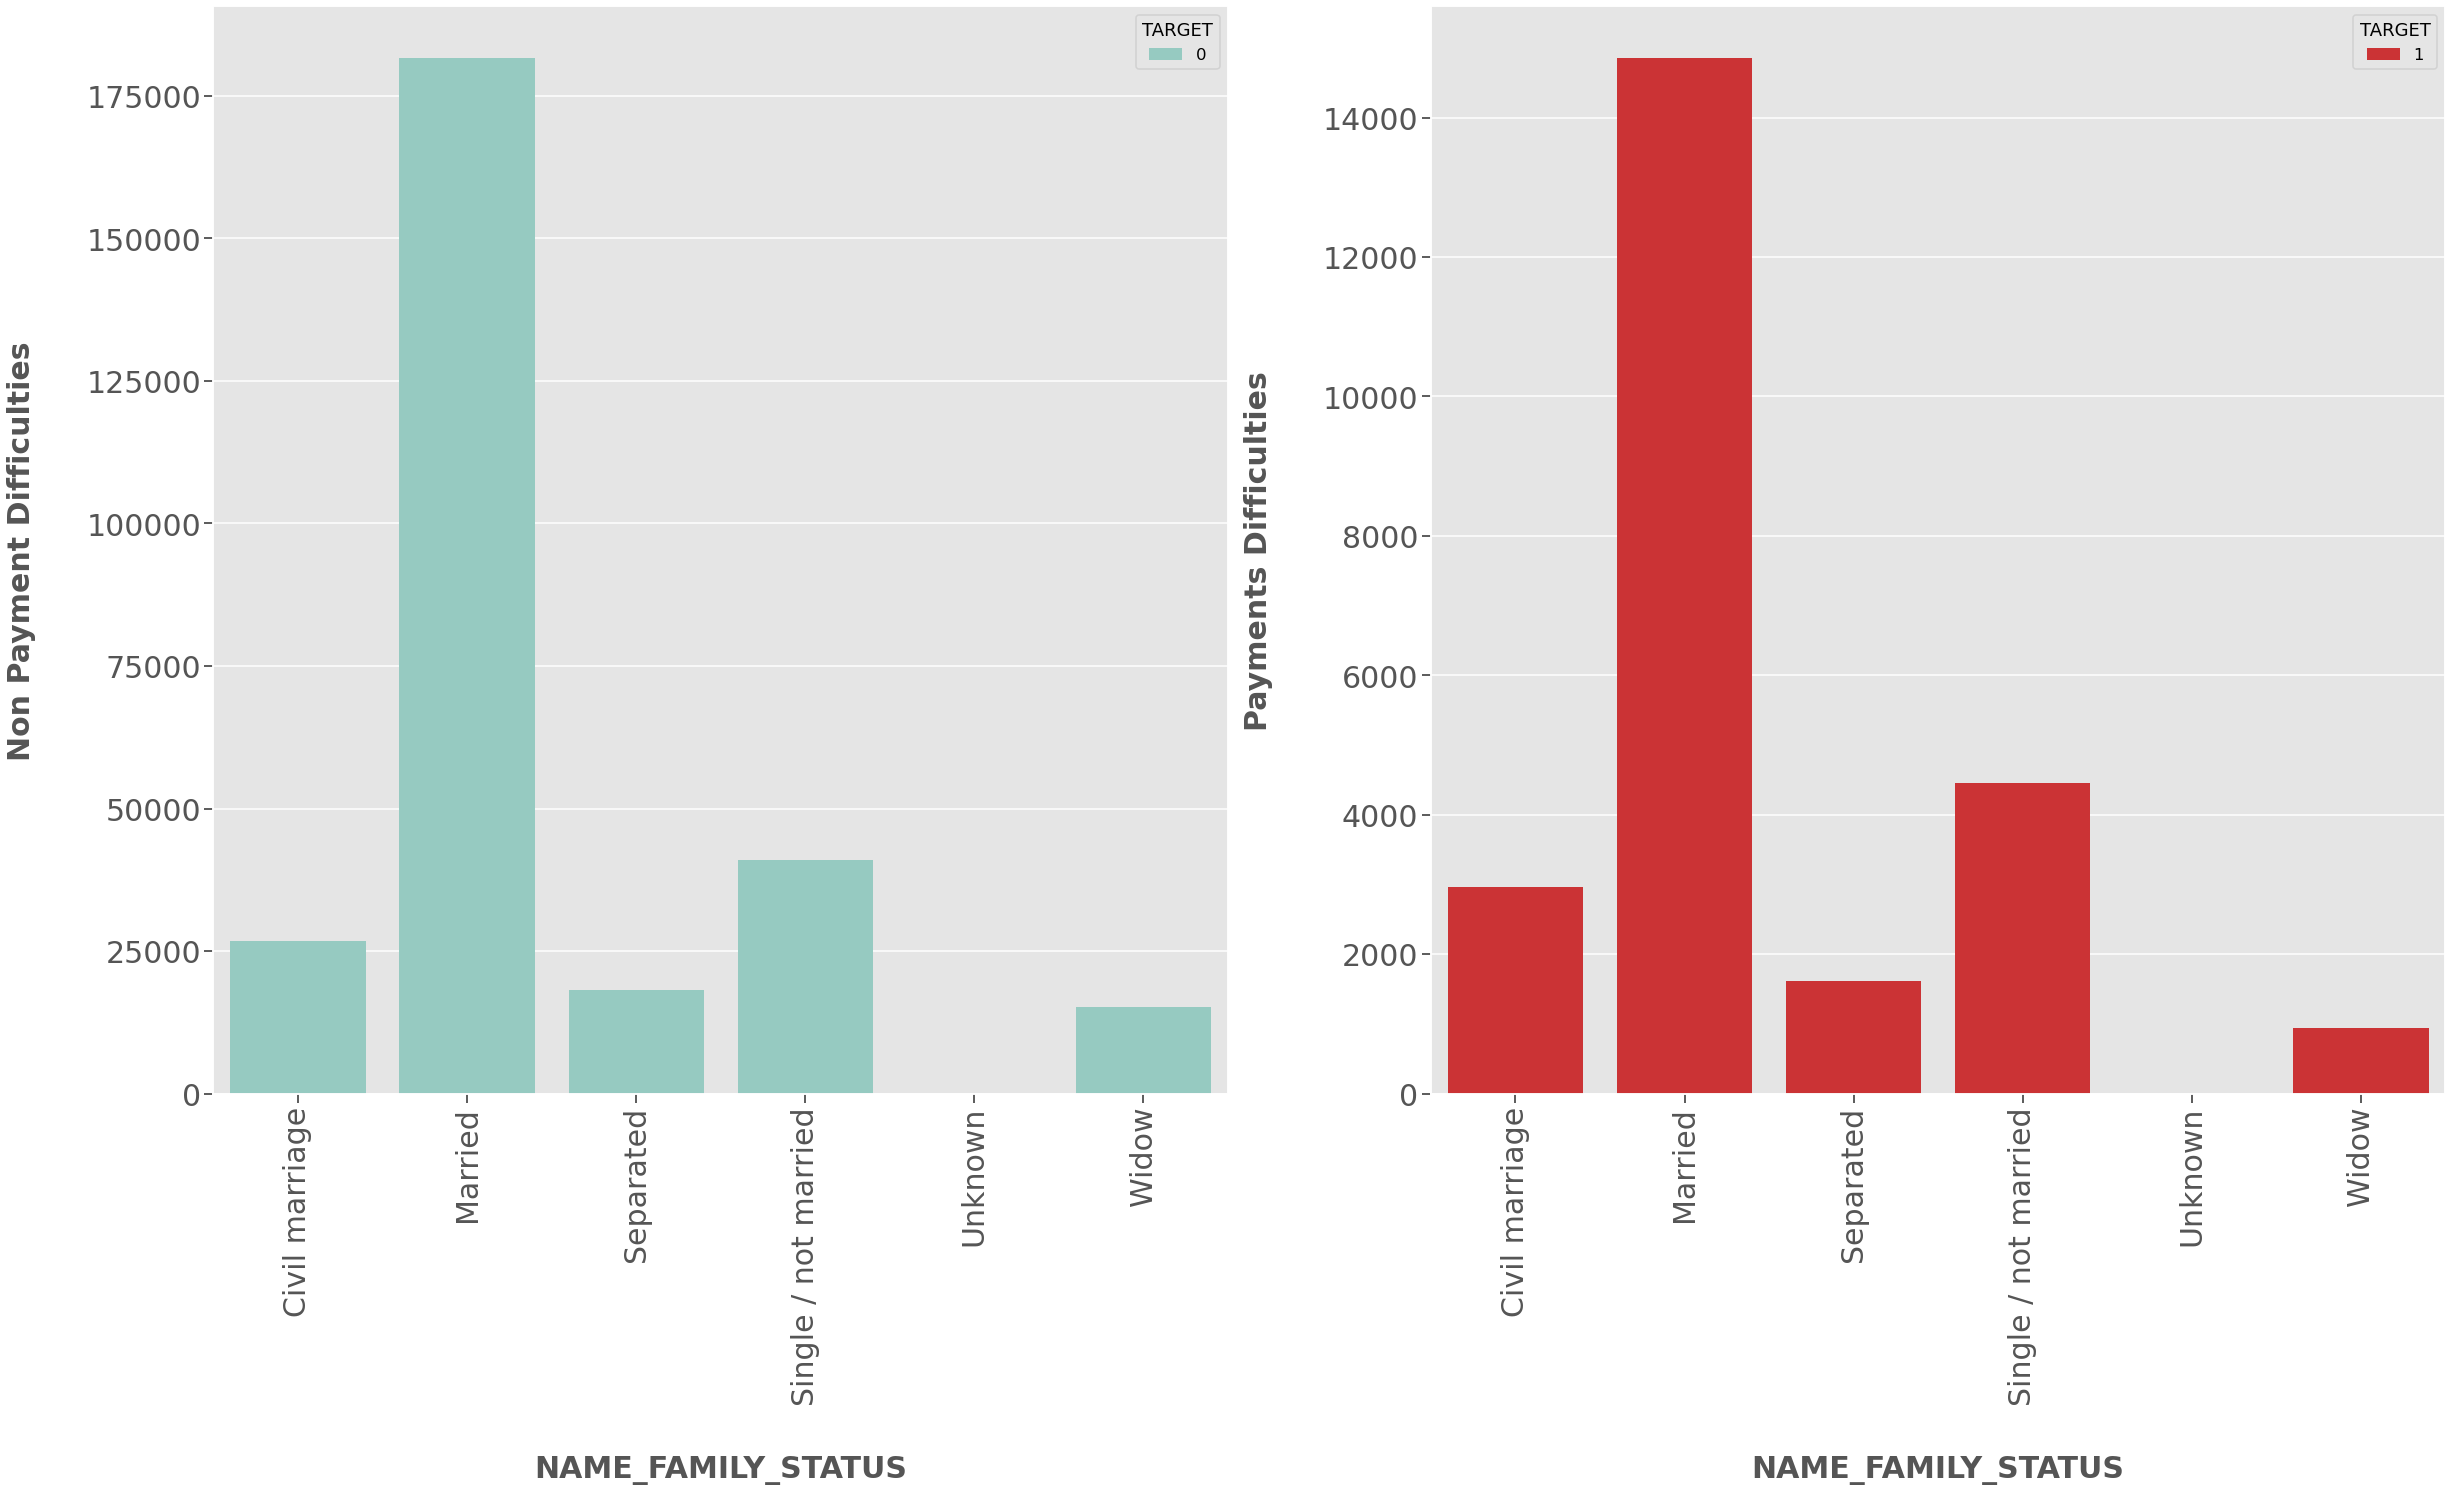

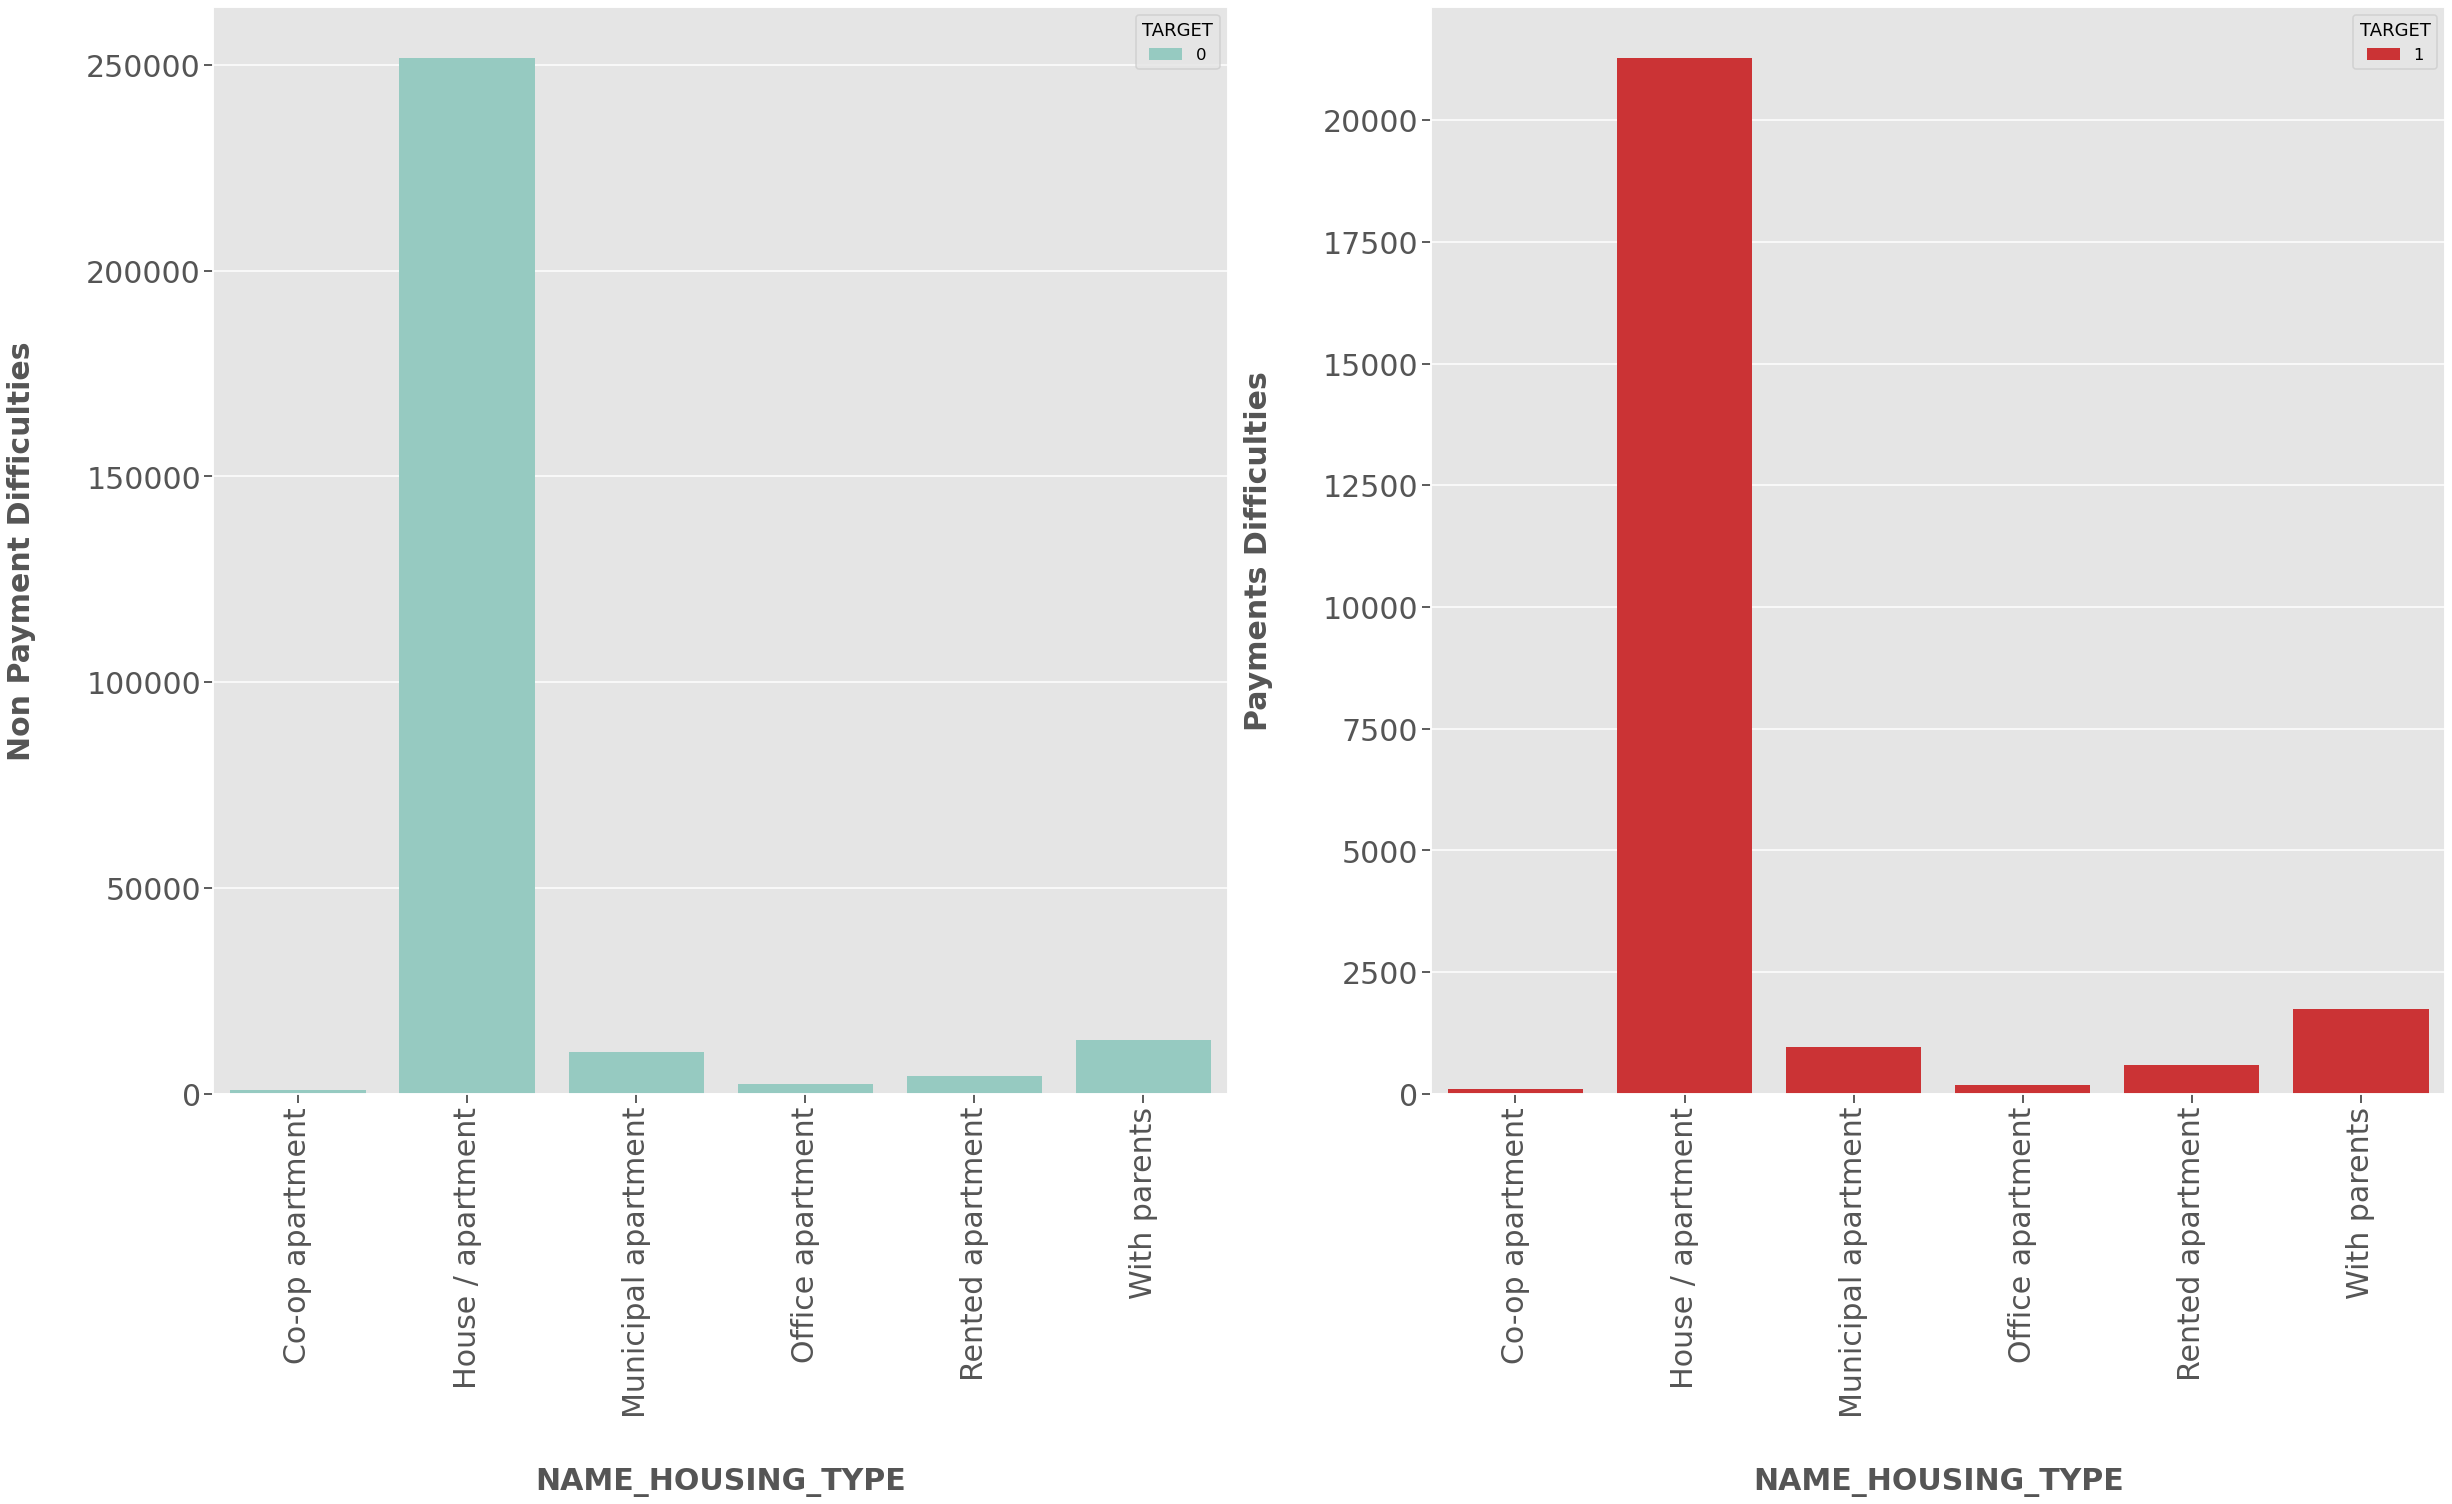

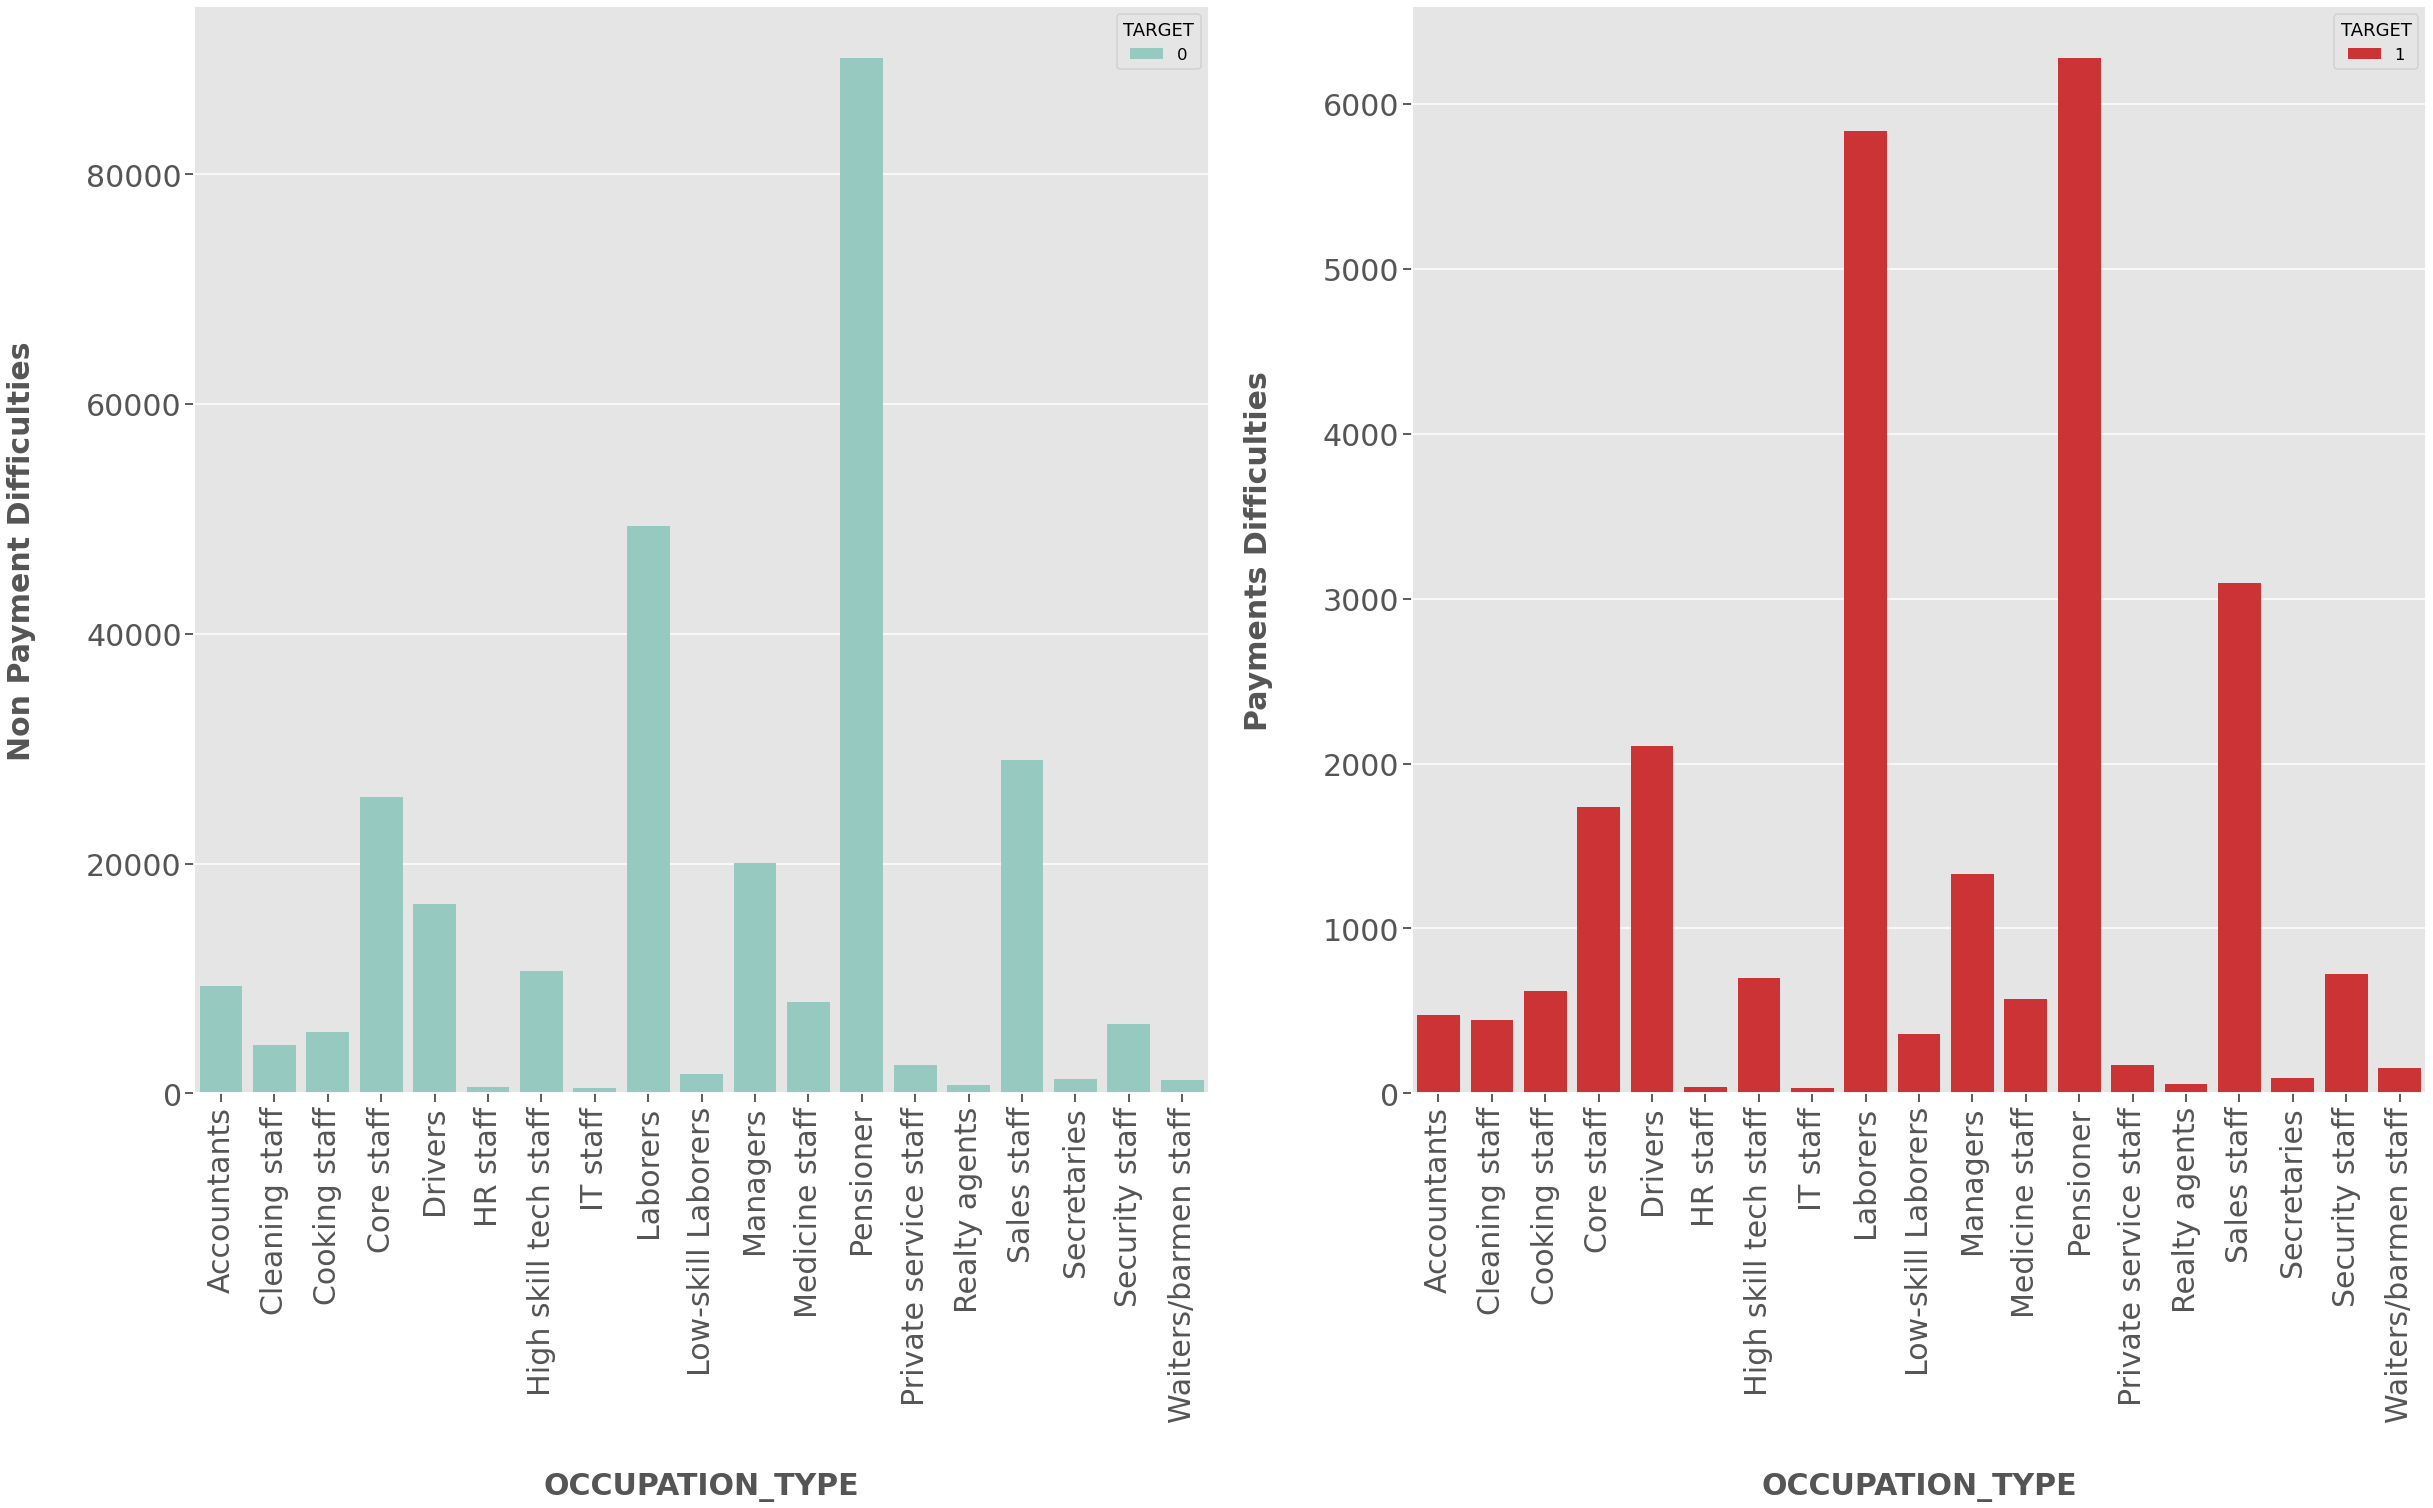

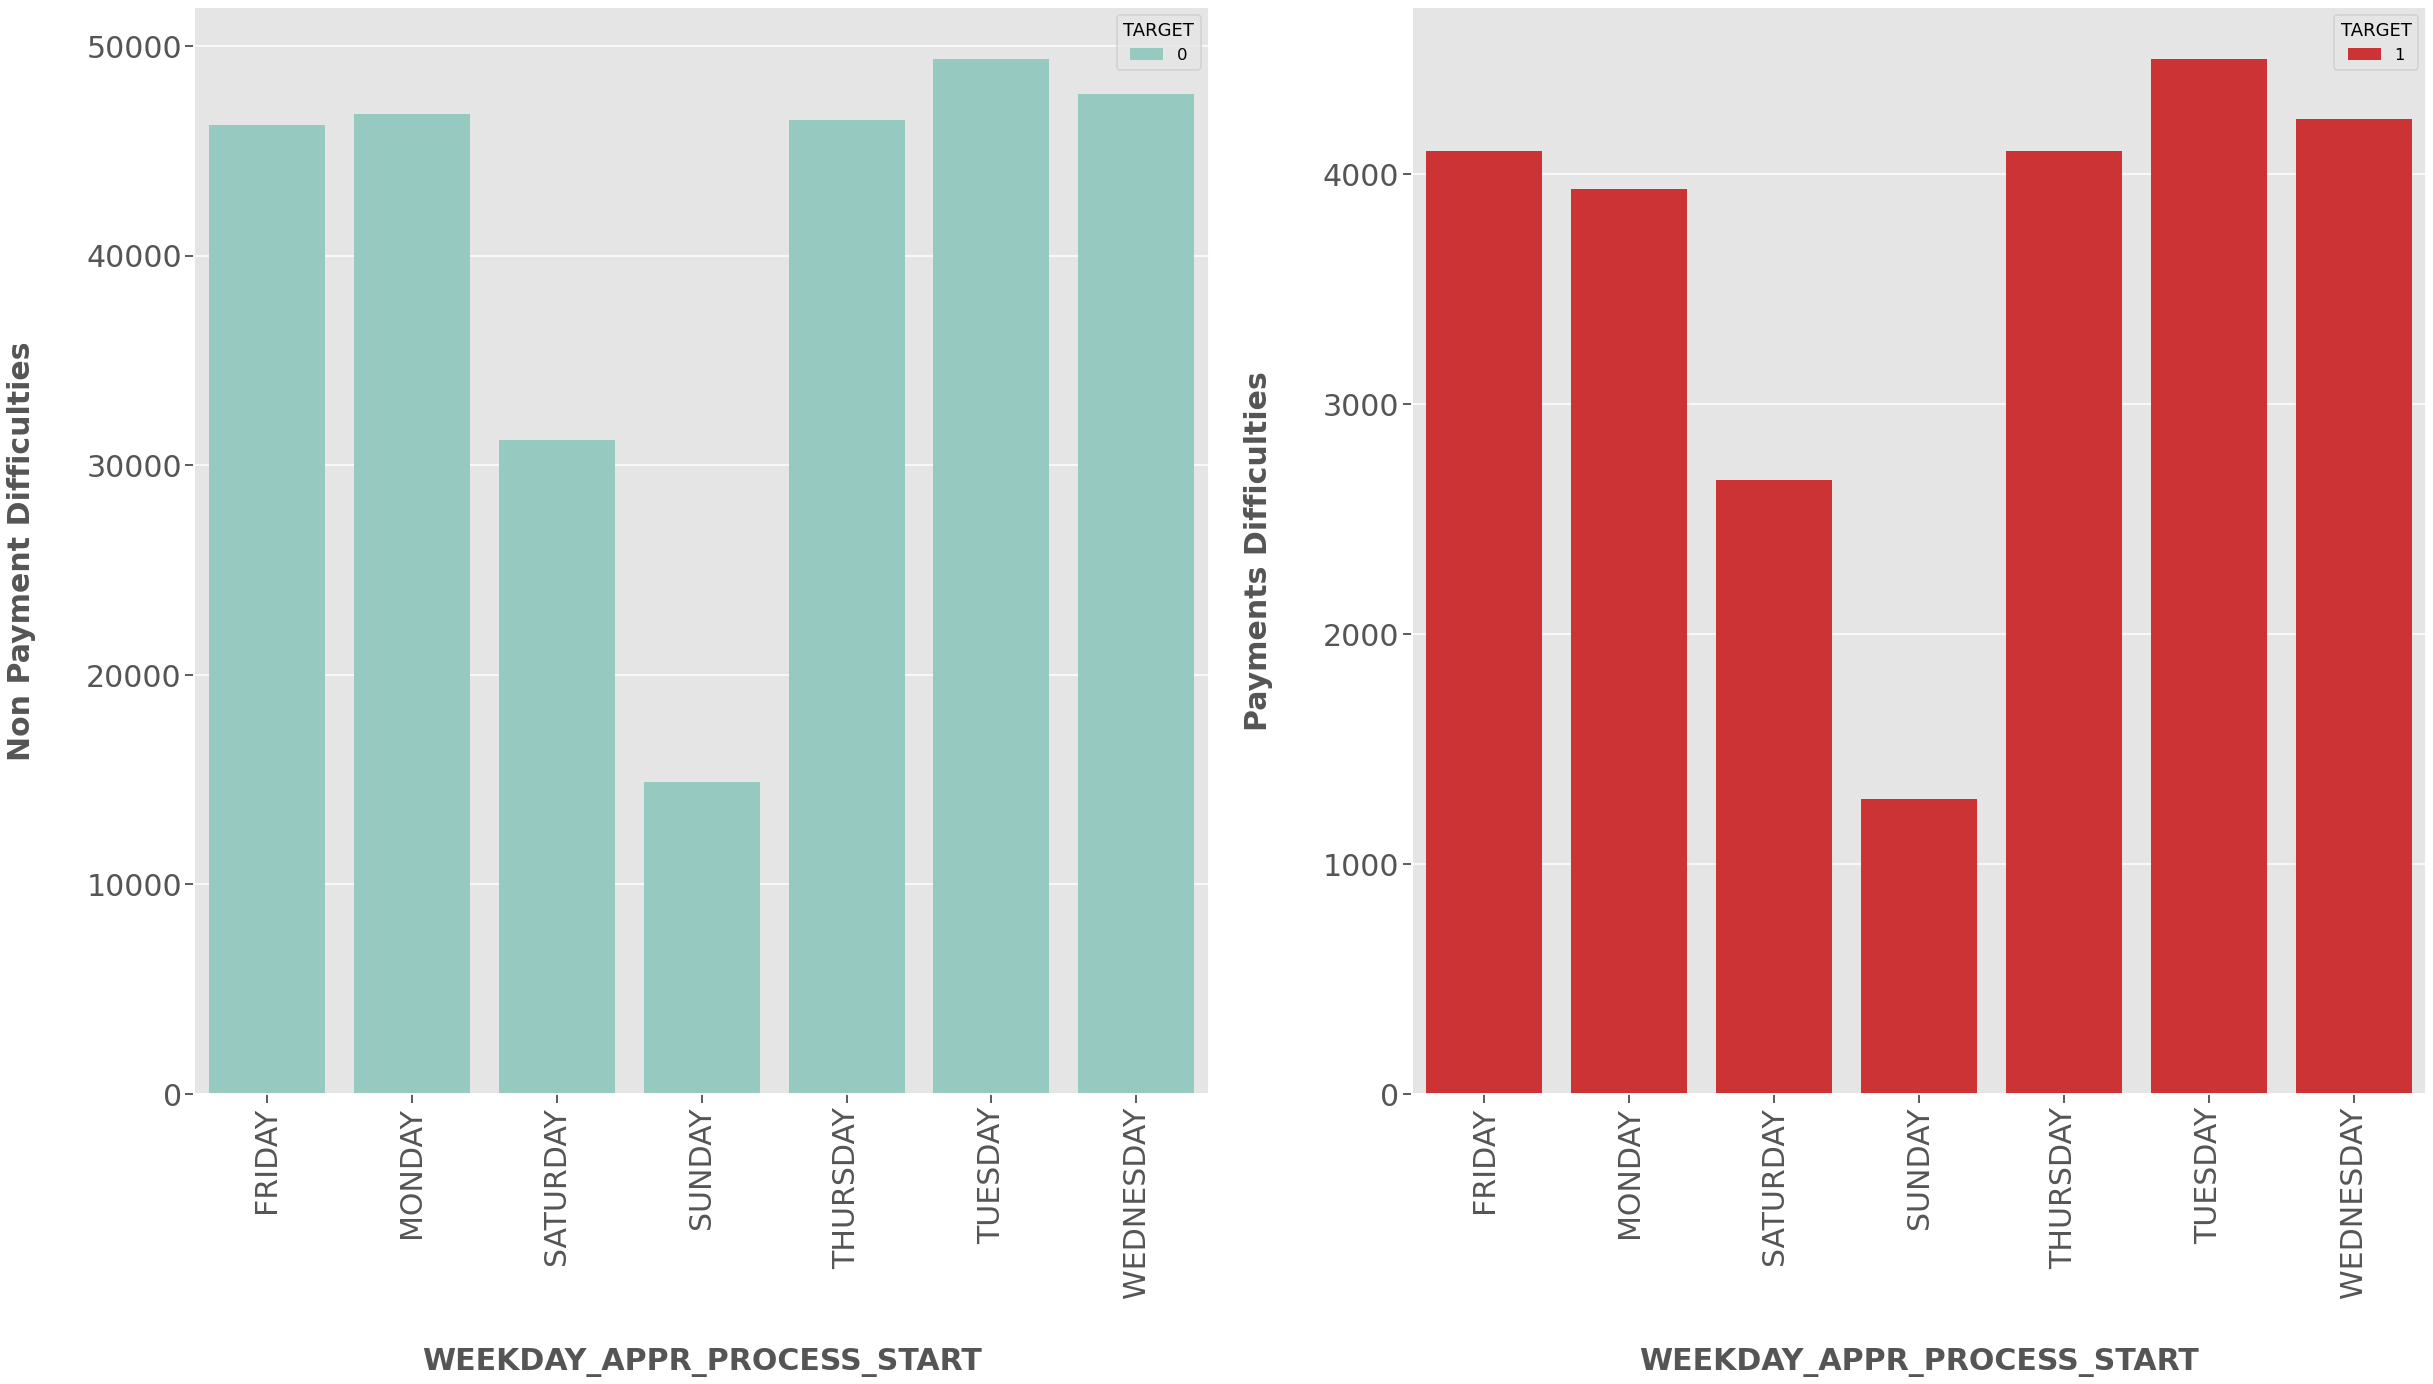

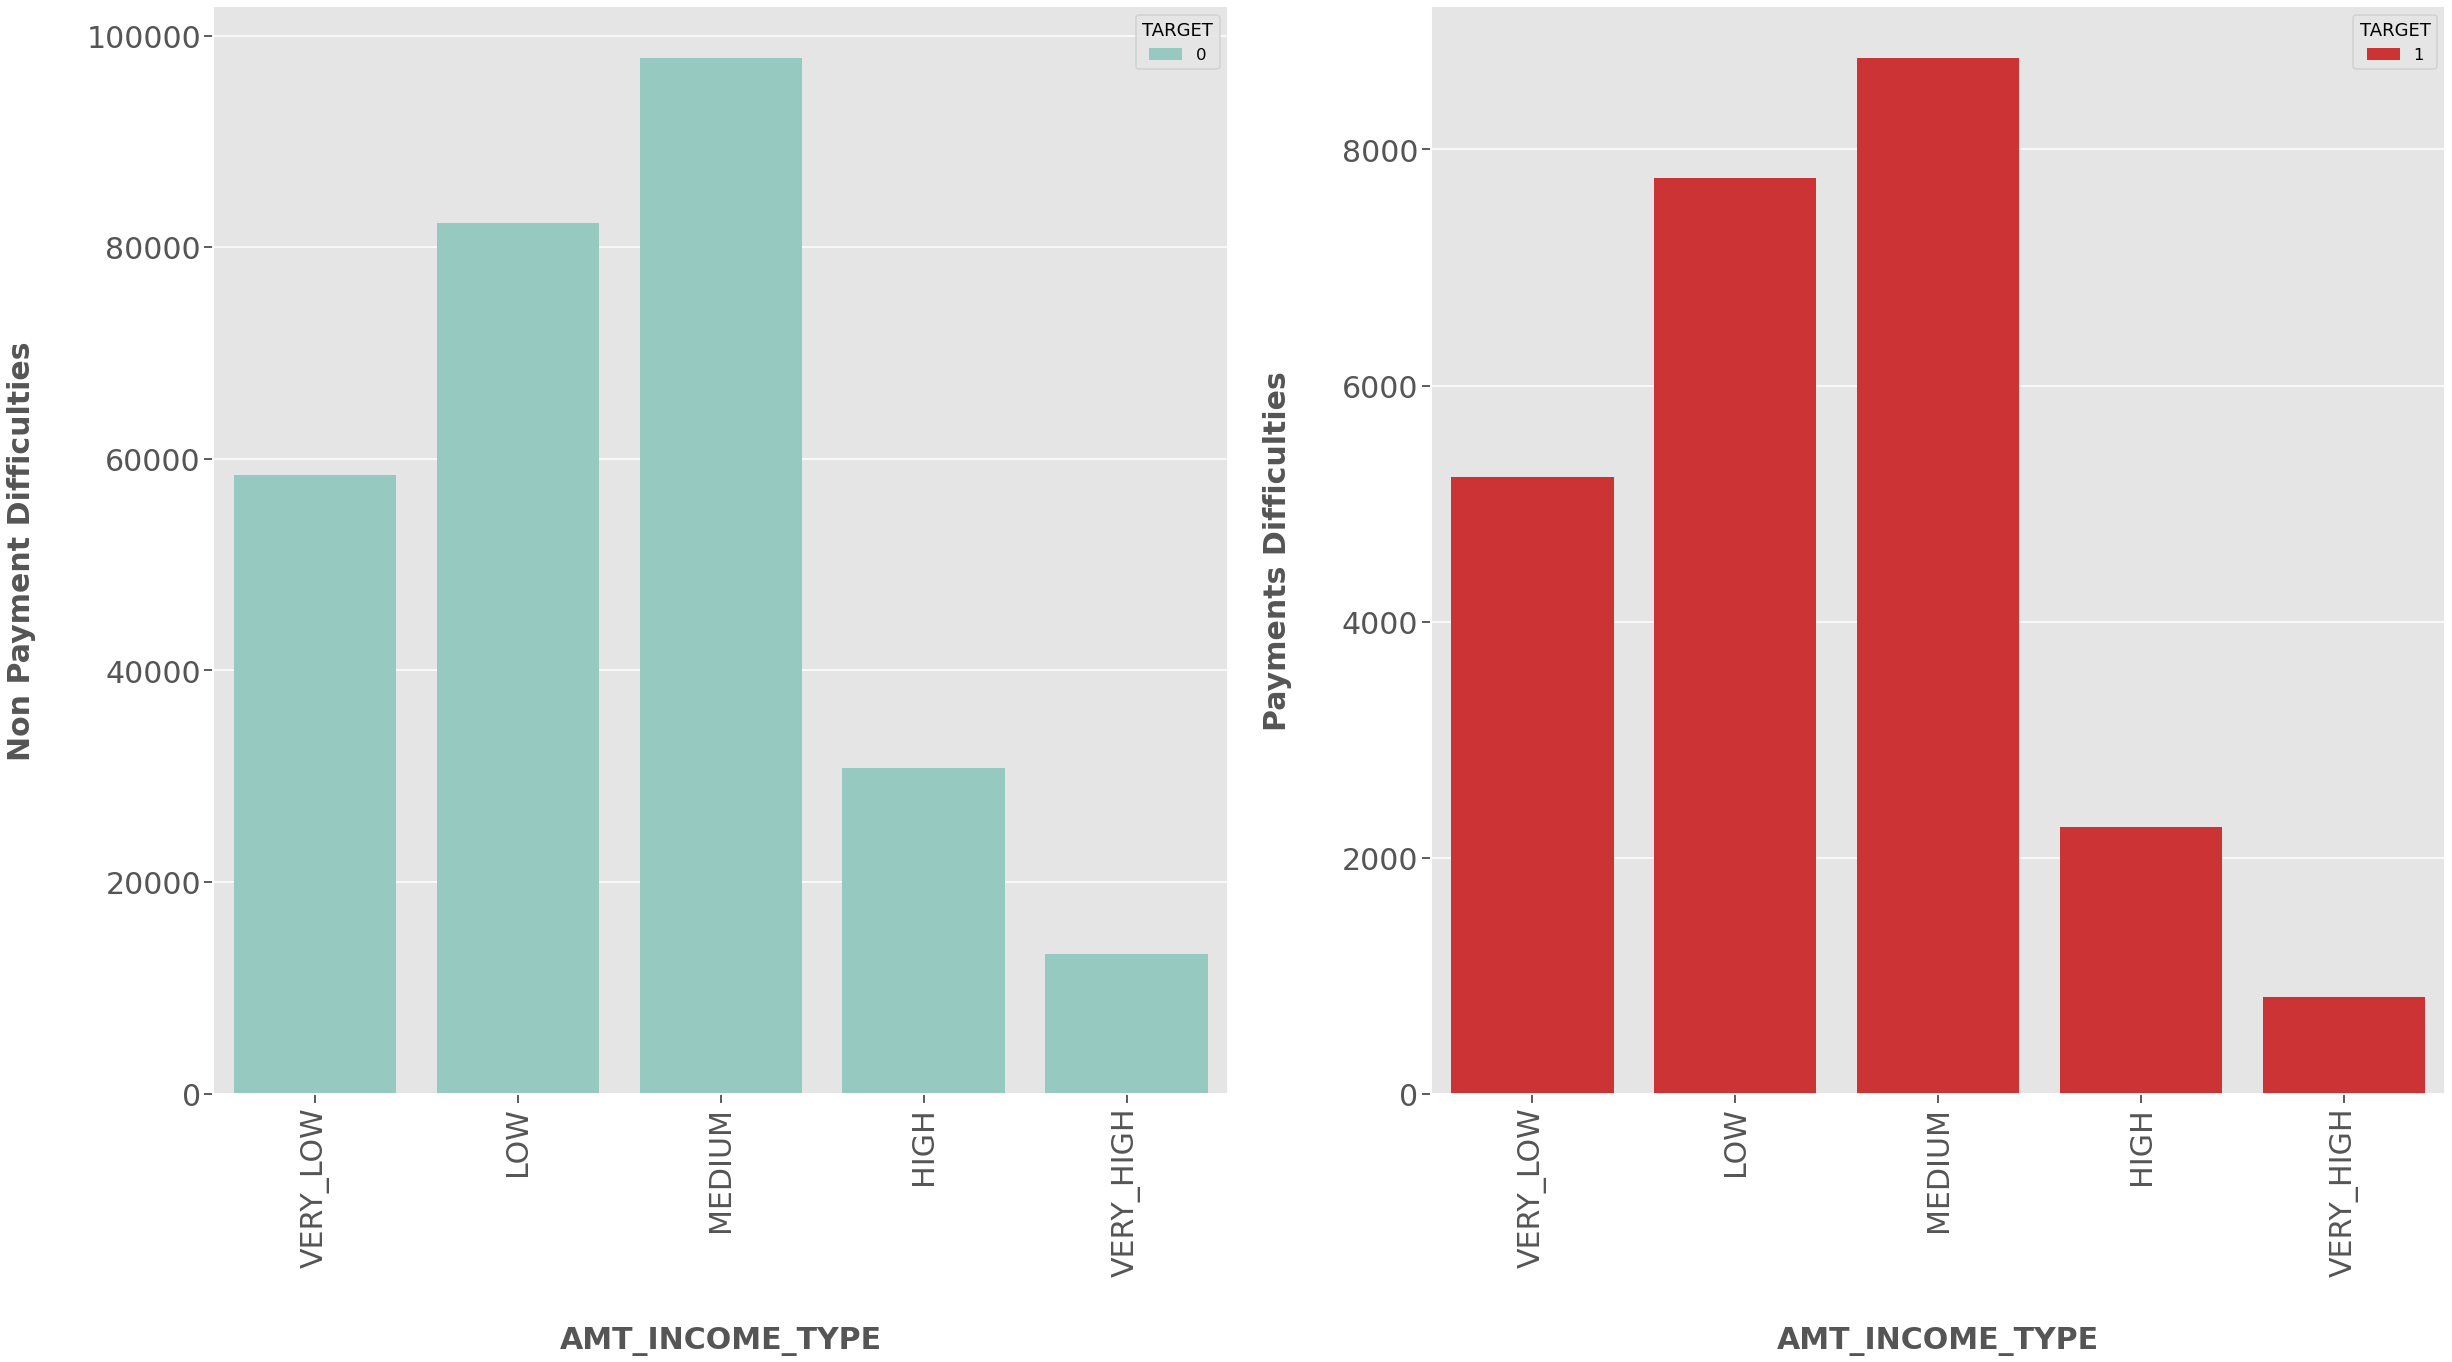

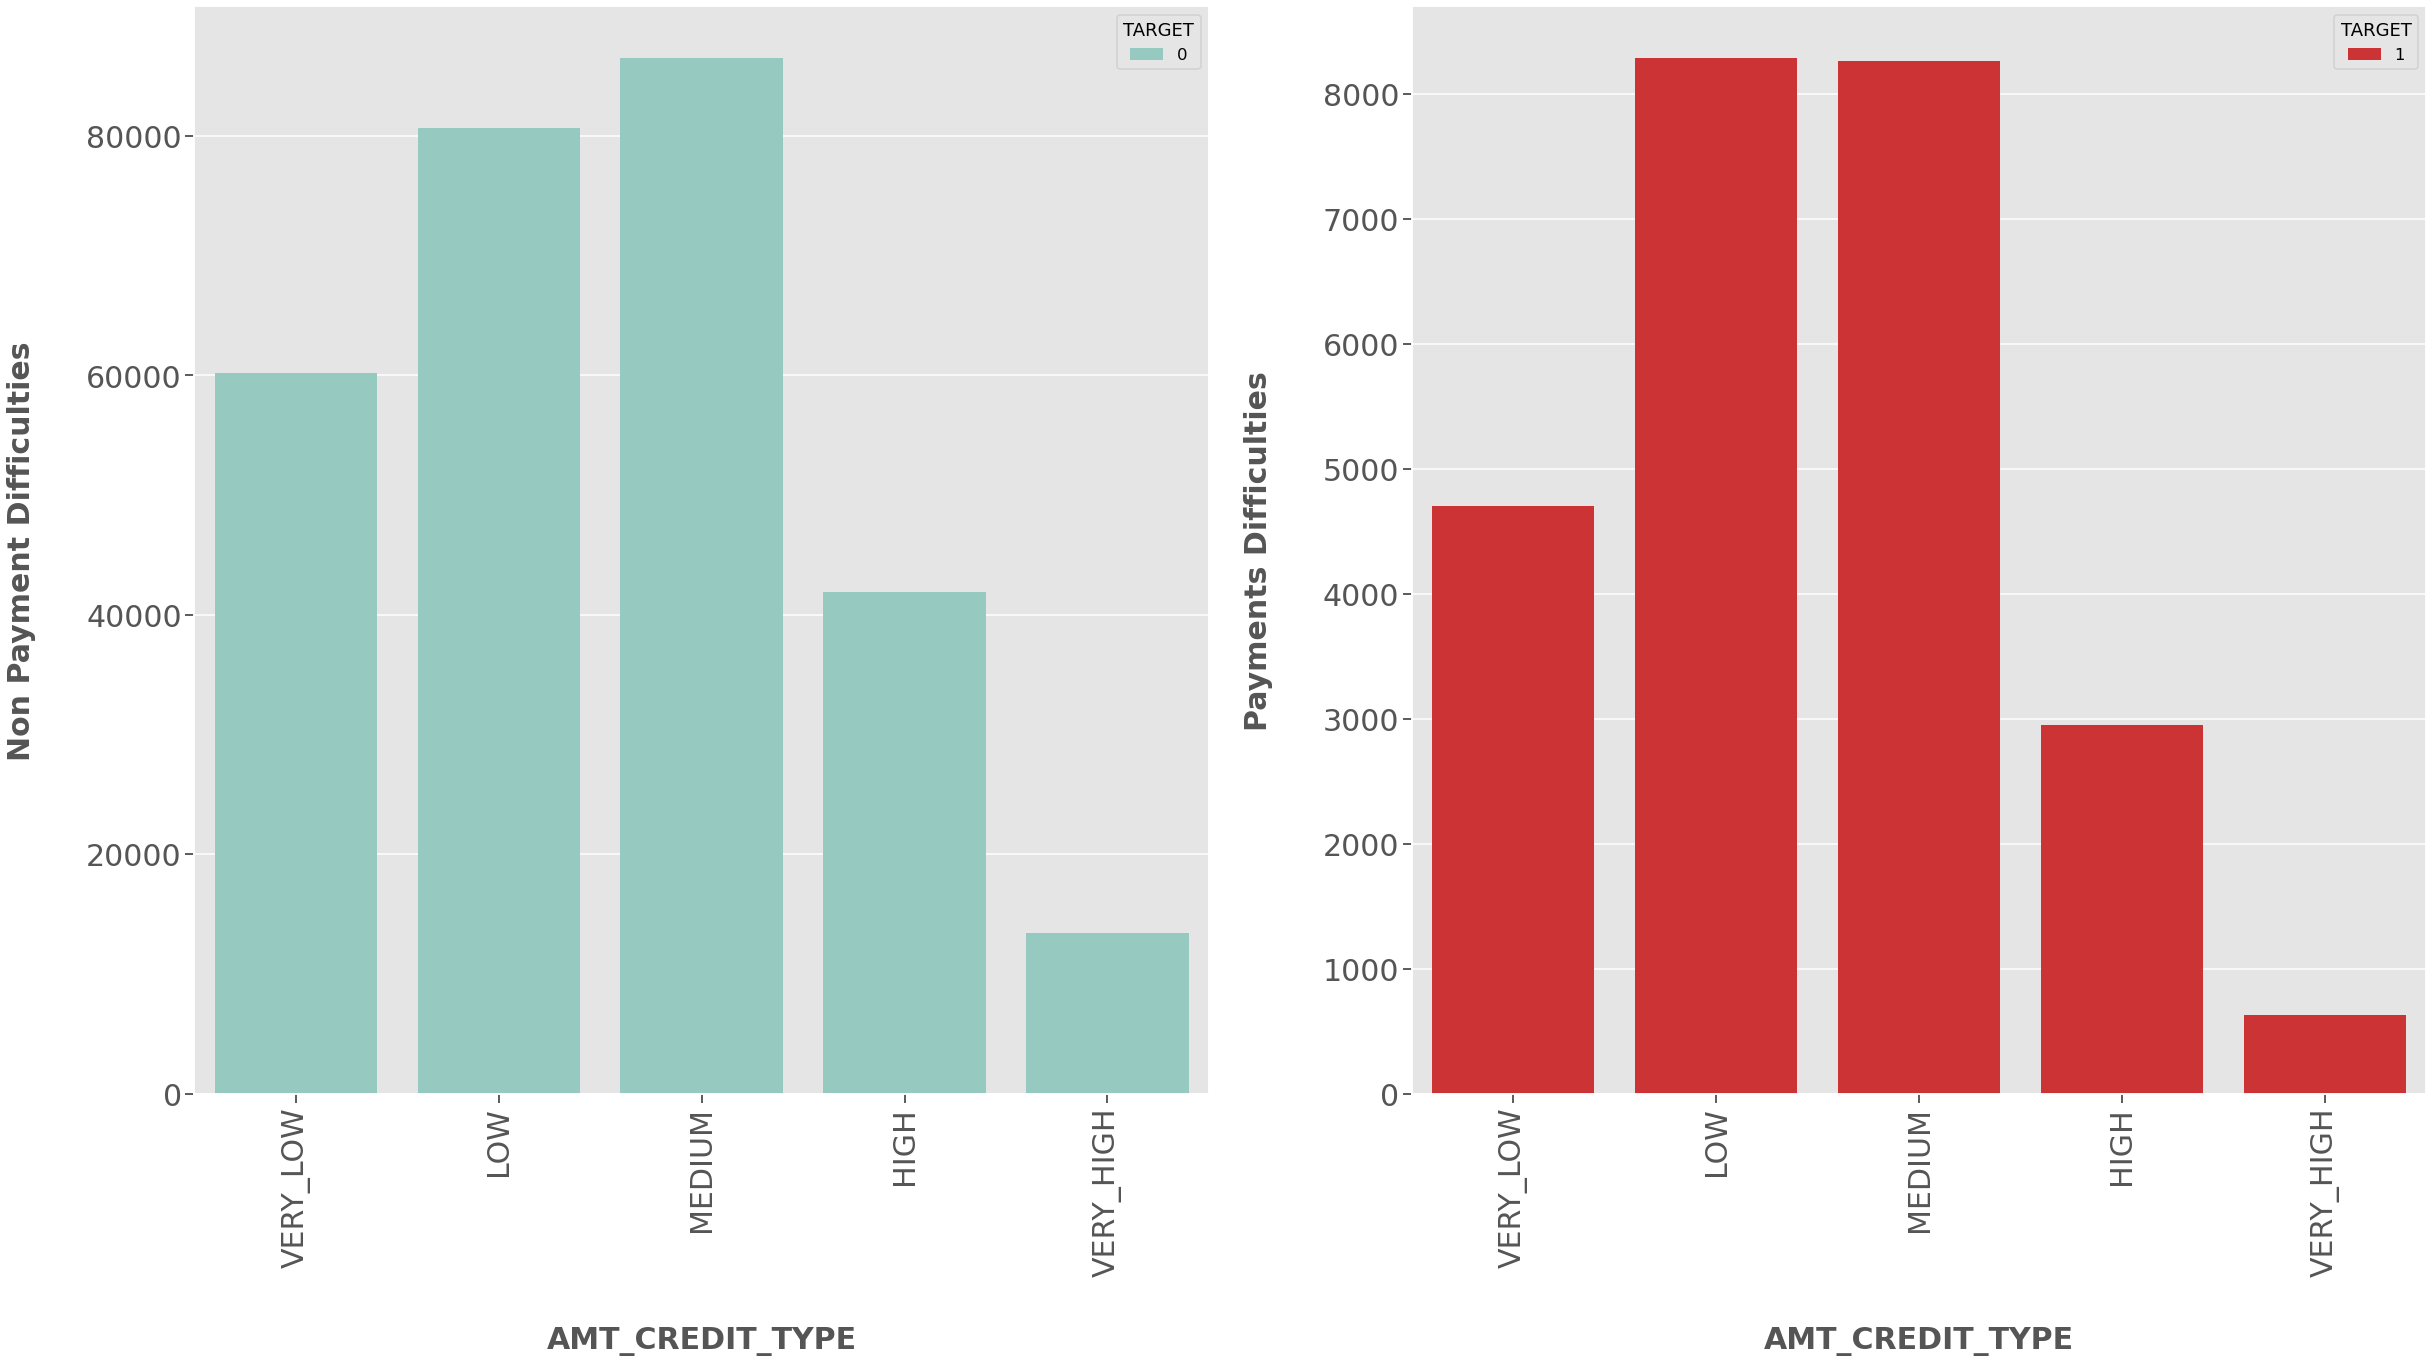

In [45]:
for cat in categorical_col:
    categorical_plot(cat)

## Insights:

1. `NAME_CONTRACT_TYPE` :
> - **Most of the clients** have applied for `Cash Loan` while **very small proportion ** have applied for `Revolving loan` for both Defaulters as well as  Non-defaulters.

2. `NAME_TYPE_SUIT` :
> - Most of the clients were **accompanied** while applying for the loan.And with few clients a family member was accompanying for both Defaulters and Non-Defaulters.
> - But who was accompanying client while applying for the loan doesn't impact on the default.Also both the populations have same proportions.
3. `NAME_INCOME_TYPE`:
> - Clients who applied for loans were getting income by  **Working,Commercial associate and Pensioner** are more likely to apply for the loan, highest being the `Working class category` .
> - **Businessman, students and Unemployed**less likely to apply for loan .
> - **Working category** have high risk to default.
> - **State Servant** is at Minimal risk to default.
4. `NAME_EDUCATION_TYPE`:
> - Clients having education `Secondary or Secondary Special` are more likey to apply for the loan.
> - Clients having education `Secondary or Secondary Special` have higher risk to default.Other education types have minimal risk.
5. `NAME_FAMILY_STATUS` :
> - **Married Clients** seems to be applied most for the loan compared to others for both Defaulters and Non-Defaulters.
> - In case of Defaulters,Clients having single relationship are **less risky**
> - In case of Defaulters, Widows shows **Minimal risk**.
6. `NAME_HOUSING_TYPE`:
> - From the bar chart, it is clear that Most of the clients **own a house or living in a apartment** for both Defaulters and Non-Defaulters.
7. `OCCUPATION_TYPE`:
> - Pensioners have applied the most for the loan in case of Defaulters and Non-Defaulters.
> - Pensioner being highest followed by `laborers` have high risk to default.
8. `WEEKDAY_APPR_PROCESS_START`:
> - There is no considerable difference in days for both Defaulters and Non-defaulters.
9. **`AMT_INCOME_TYPE`**:
> - Clients having **Medium salary range** are more likely to apply for the loan for both Defaulters and Non-defaulters.
> - Clients having `low`and`medium` income are at high risk to default.
10. **`AMT_CREDIT_TYPE`**:
> - Most of the clients applied for  **Medium Credit Amount of the loan**  for both Defaulters and Non-defaulters.
> -  Clients applying for `high` and `low` credit are at high risk of default.

# 6. Univariante Analysis of Numerical columns with respect to Target variable

## 6.1 Creating Function's for univariate plots


In [46]:
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
     
    
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')    
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show();
    

### 6.1.1 Loan Annuity based on  Target 0 and Target 1

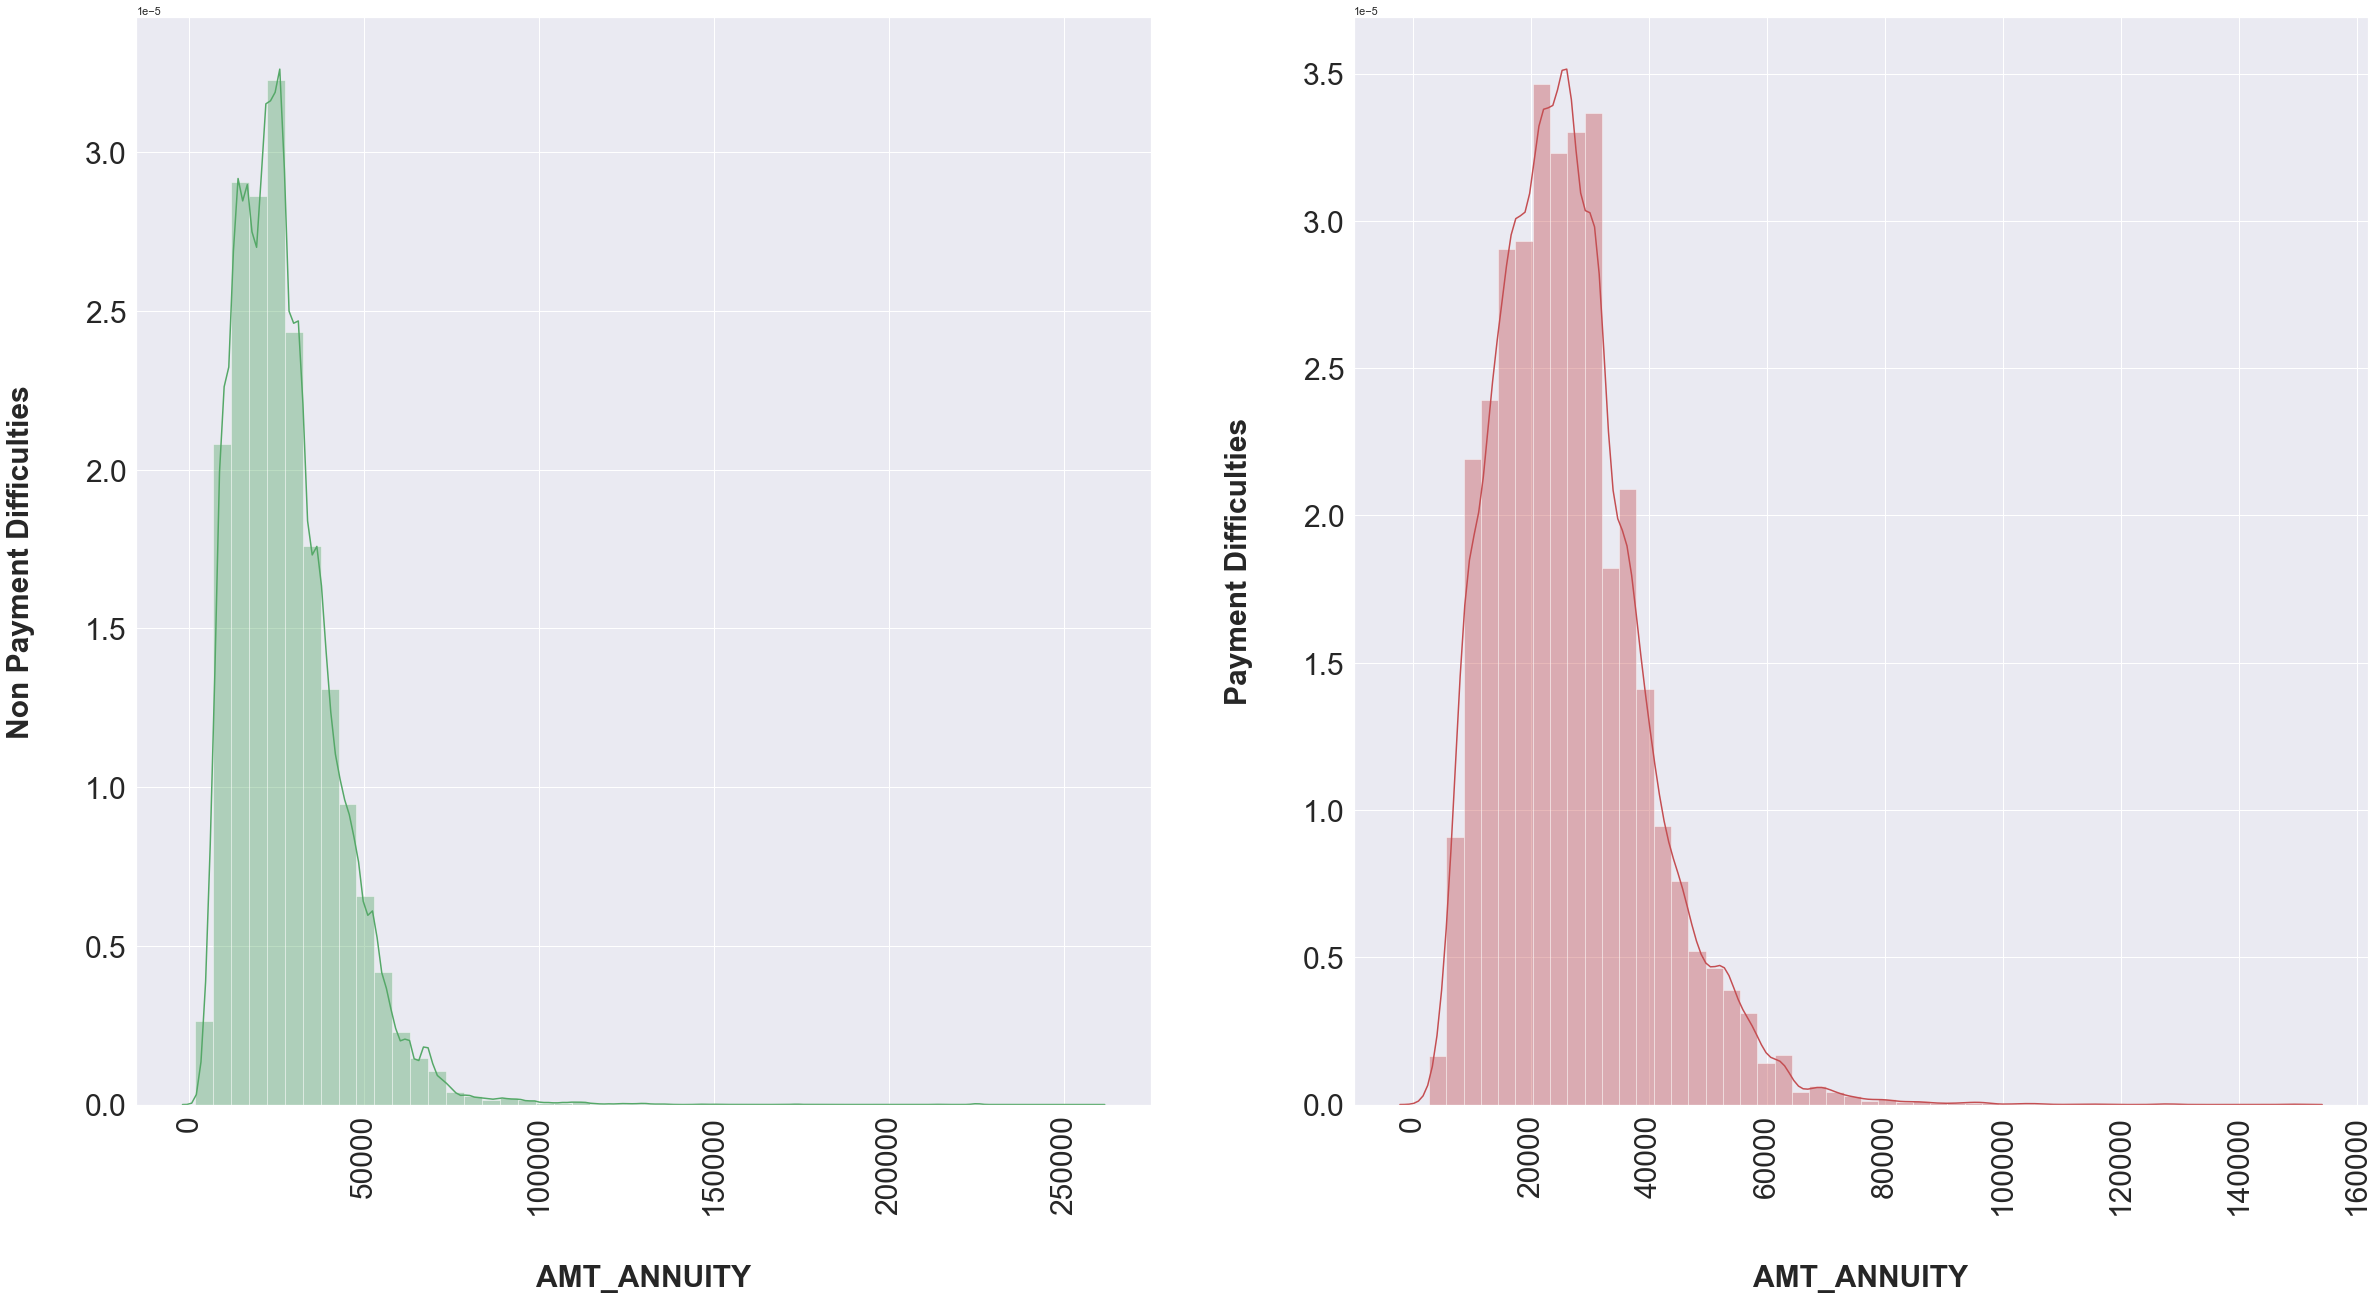

In [47]:
uni(col='AMT_ANNUITY')               

### 6.1.2 Credit Amount based on  Target 0 and Target 1

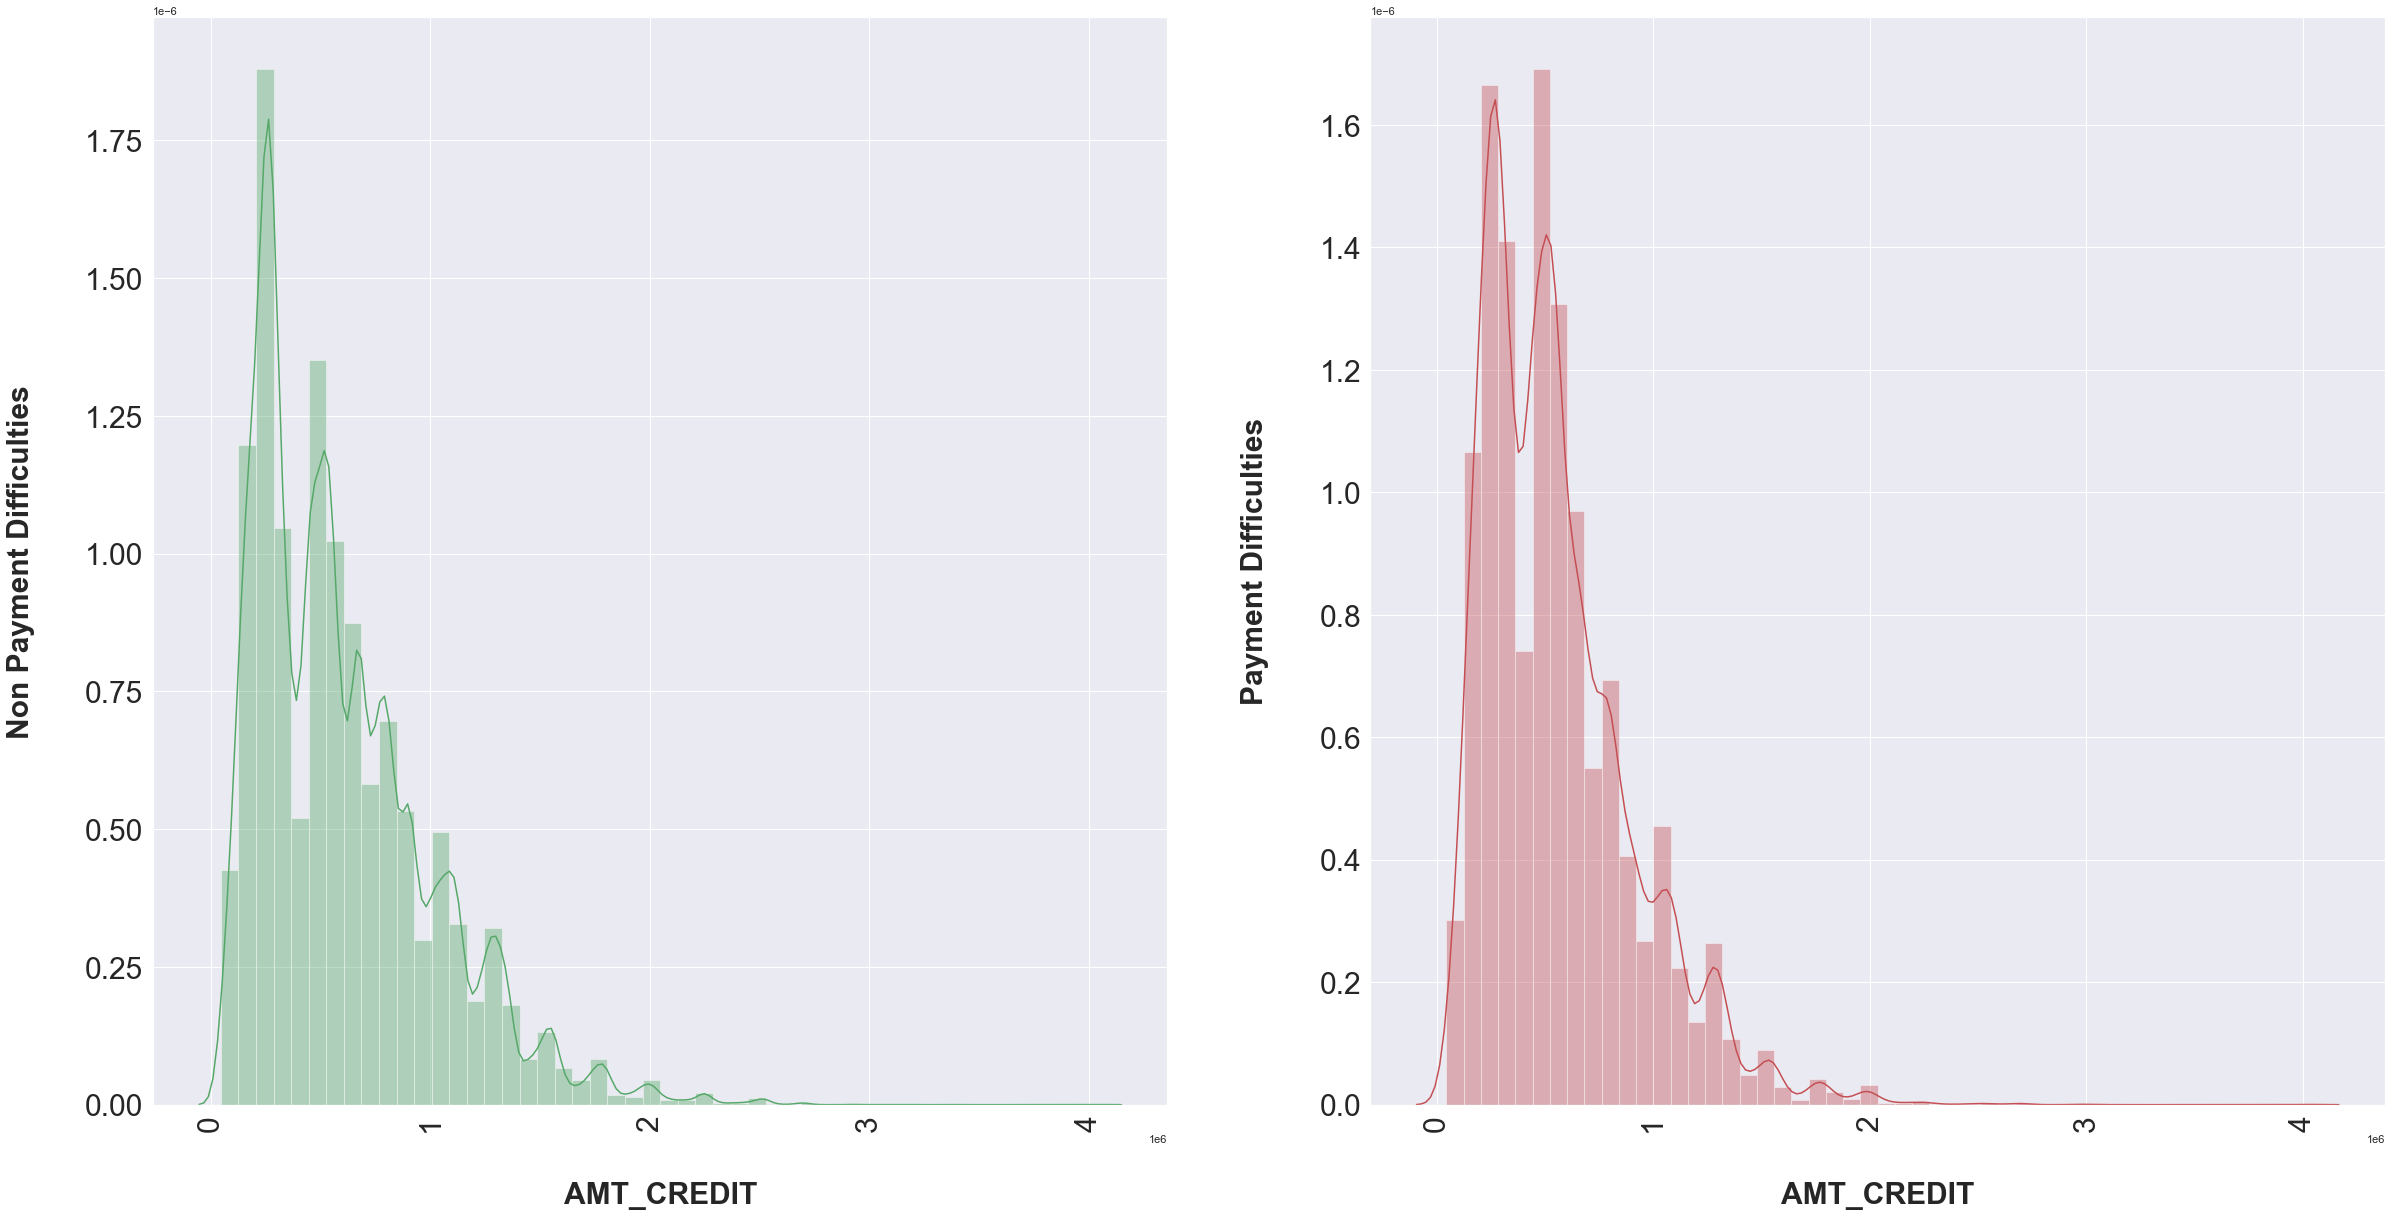

In [48]:
uni(col='AMT_CREDIT')           

### 6.1.3 Price of Goods based on  Target 0 and Target 1

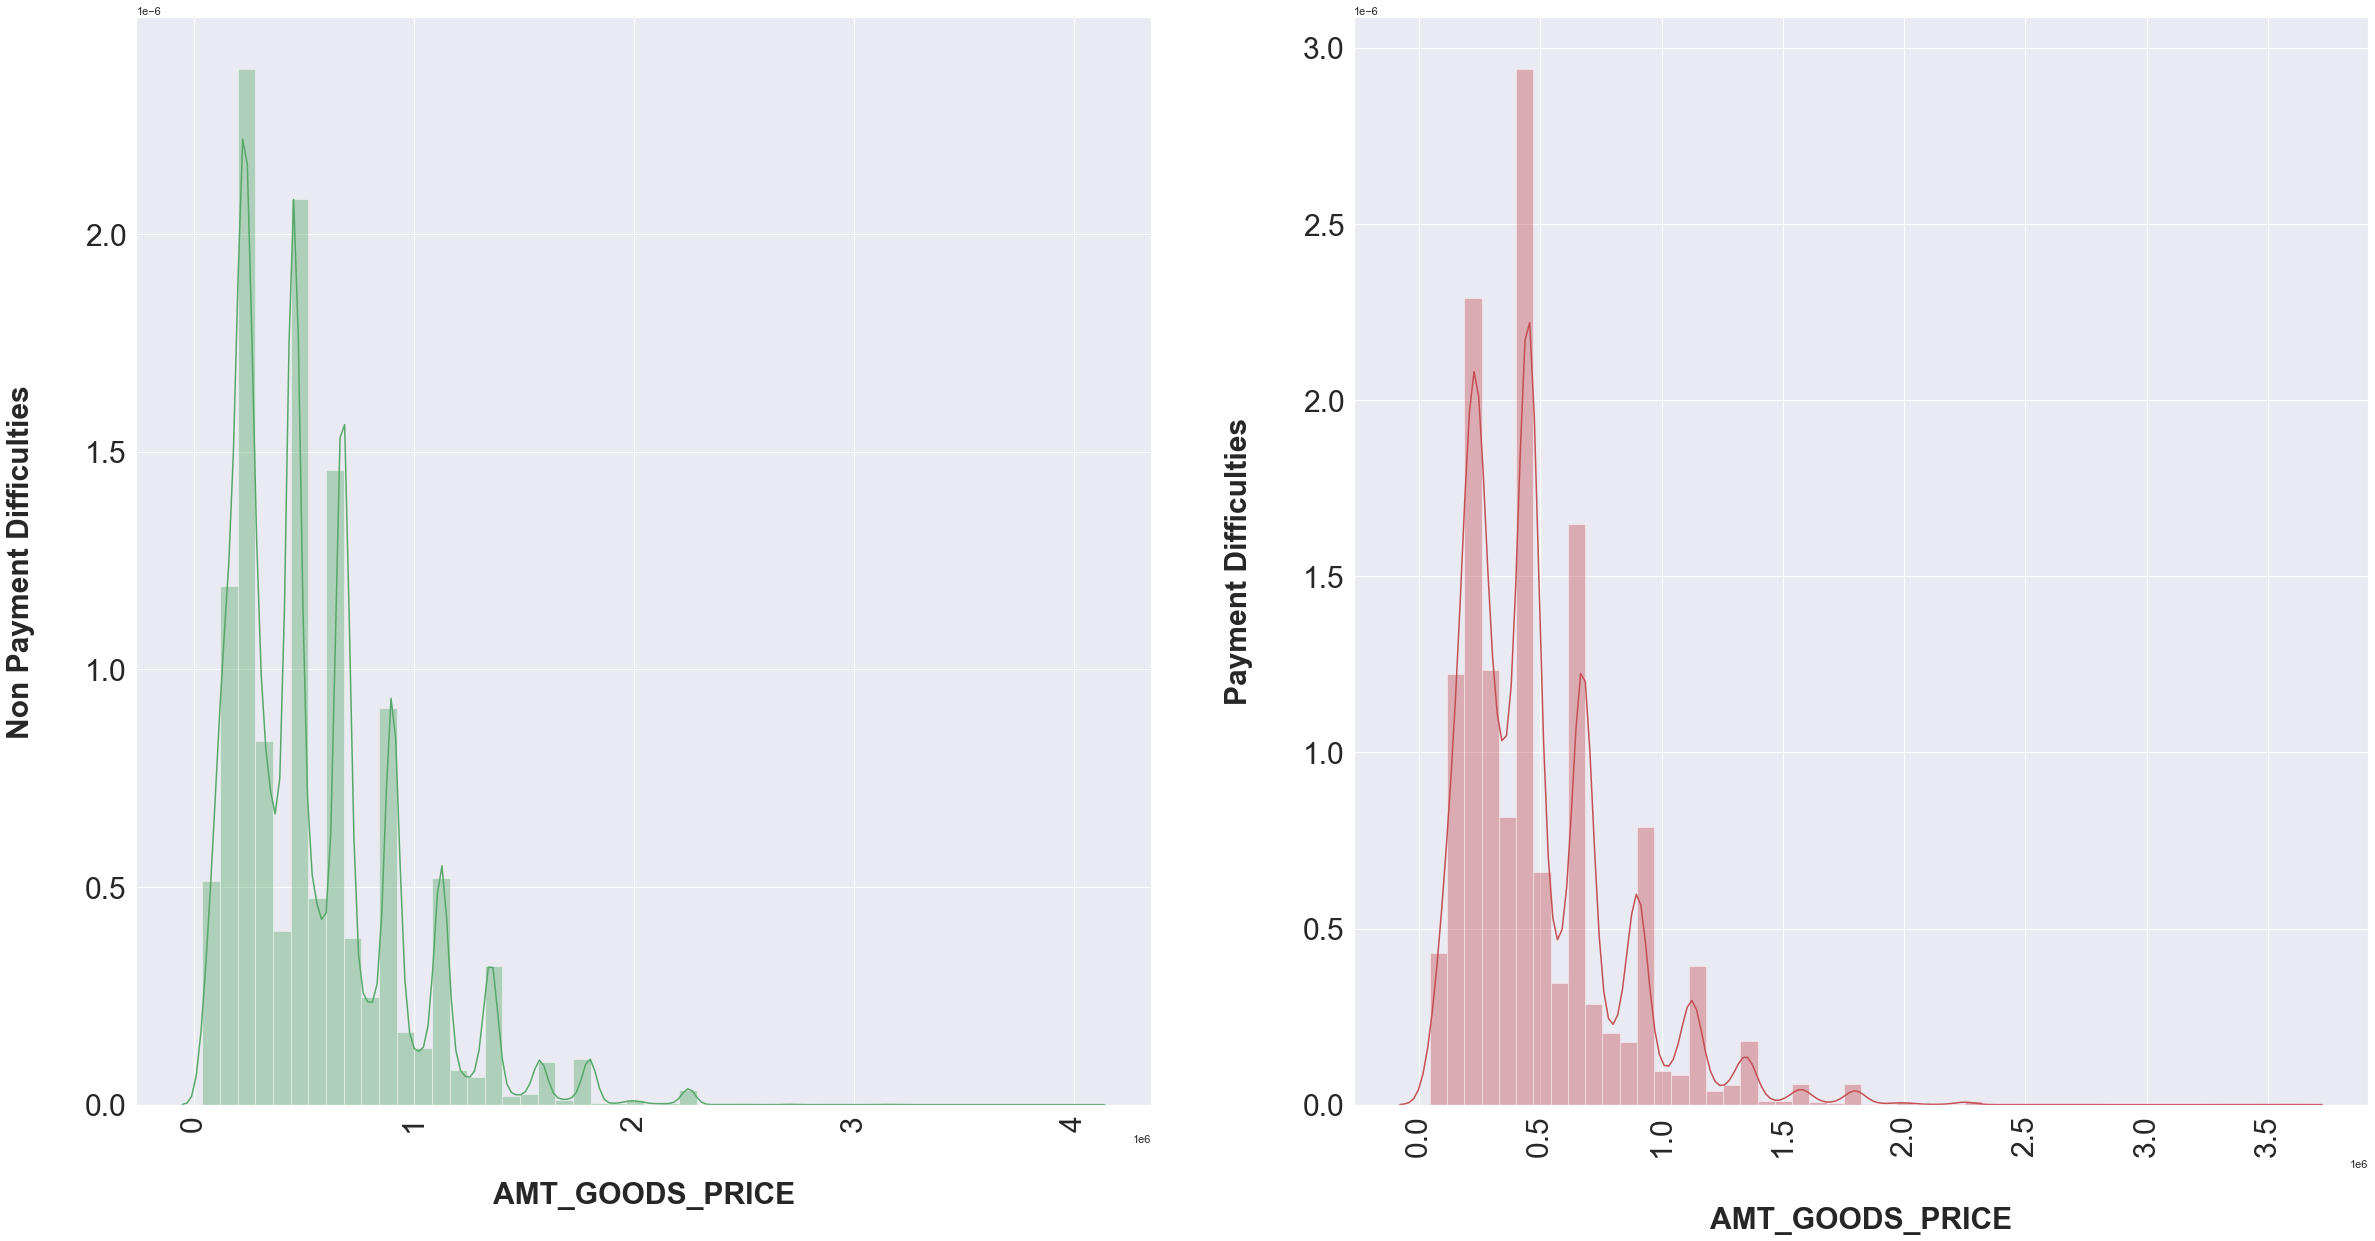

In [49]:
uni(col='AMT_GOODS_PRICE')          

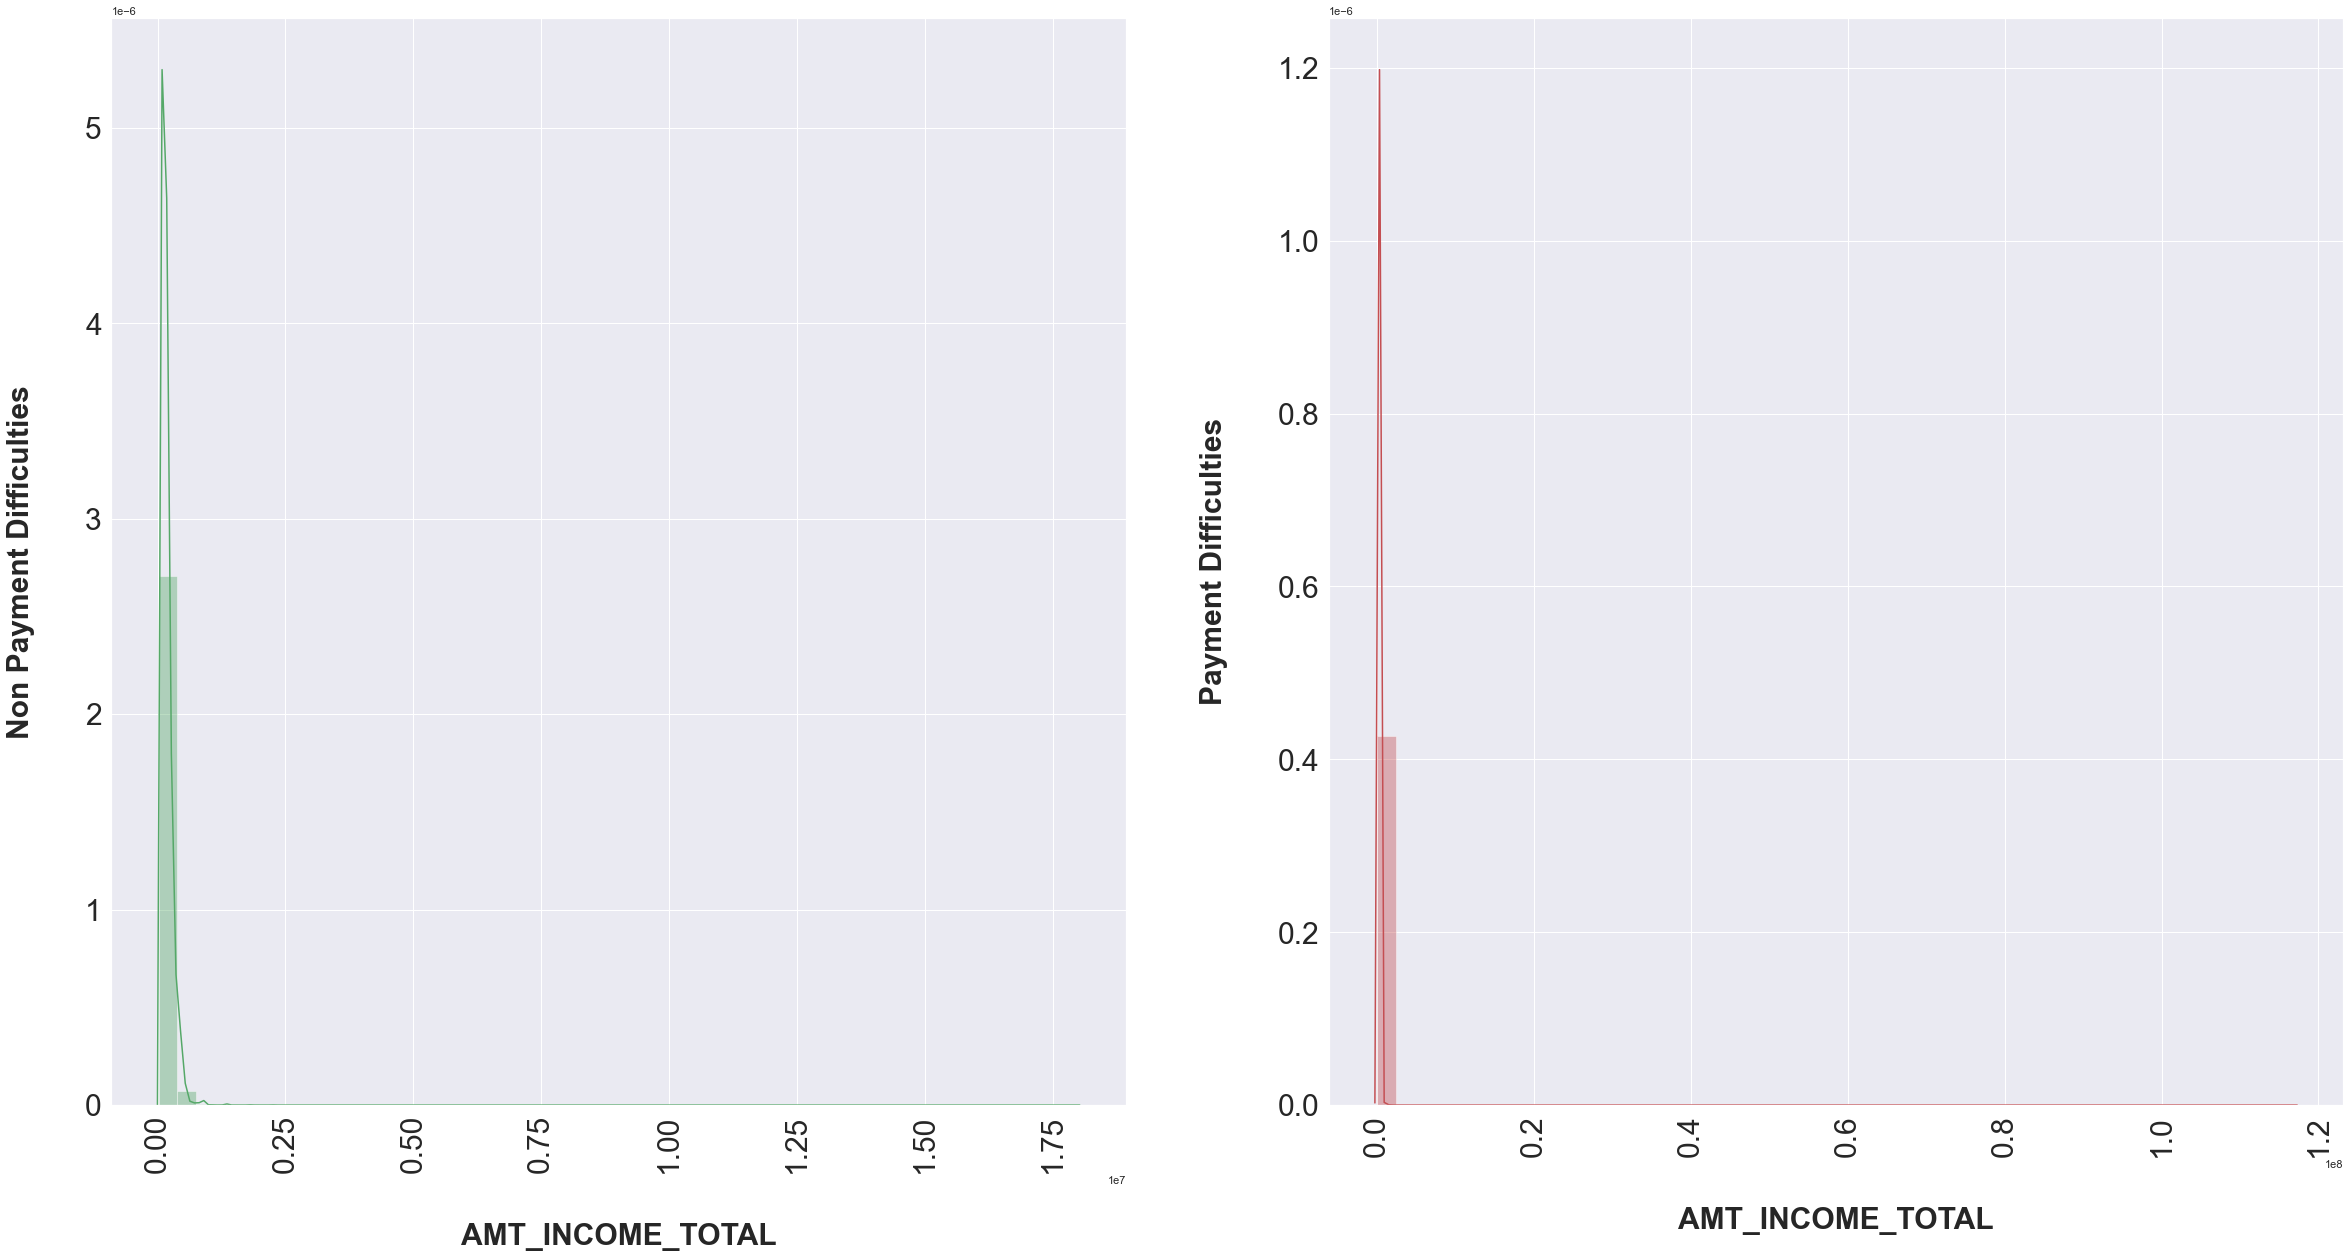

In [50]:
uni(col='AMT_INCOME_TOTAL') 

## Insight:

- People with target one has largely  staggered income as compared  to target zero. Dist. plot clearly  shows that the shape in Income  total, Annuity, Credit and Good  Price are similar for Target 0 and  similar for Target 1.


- The plots are also highlighting that  people who have difficulty in  paying back loans with respect to  their income, loan amount, price  of goods against which loan is  procured and Annuity.


- Dist. plot highlights the curve  shape which is wider for Target 1  in comparison to Target 0 which is  narrower with well defined edges.


# 6. Bivariate Analysis : Numerical & Categorical W.R.T Target variables

**6.0 Checking Required columns for Analysis**

In [51]:
df1[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307506       0          157500.0  Secondary / secondary special   
307507       0           72000.0  Secondary / secondary special   
307508       0          153000.0               Higher education   
307509       1          171000.0  Secondary / secondary special   
307510       0          157500.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 4 columns]

## 6.1 . For Target 0

### 6.1.1 Income_Amount   Vs   Eduacation_Status    Vs   FAMILY_Status  for No-payment diffculties client (Trget 0)

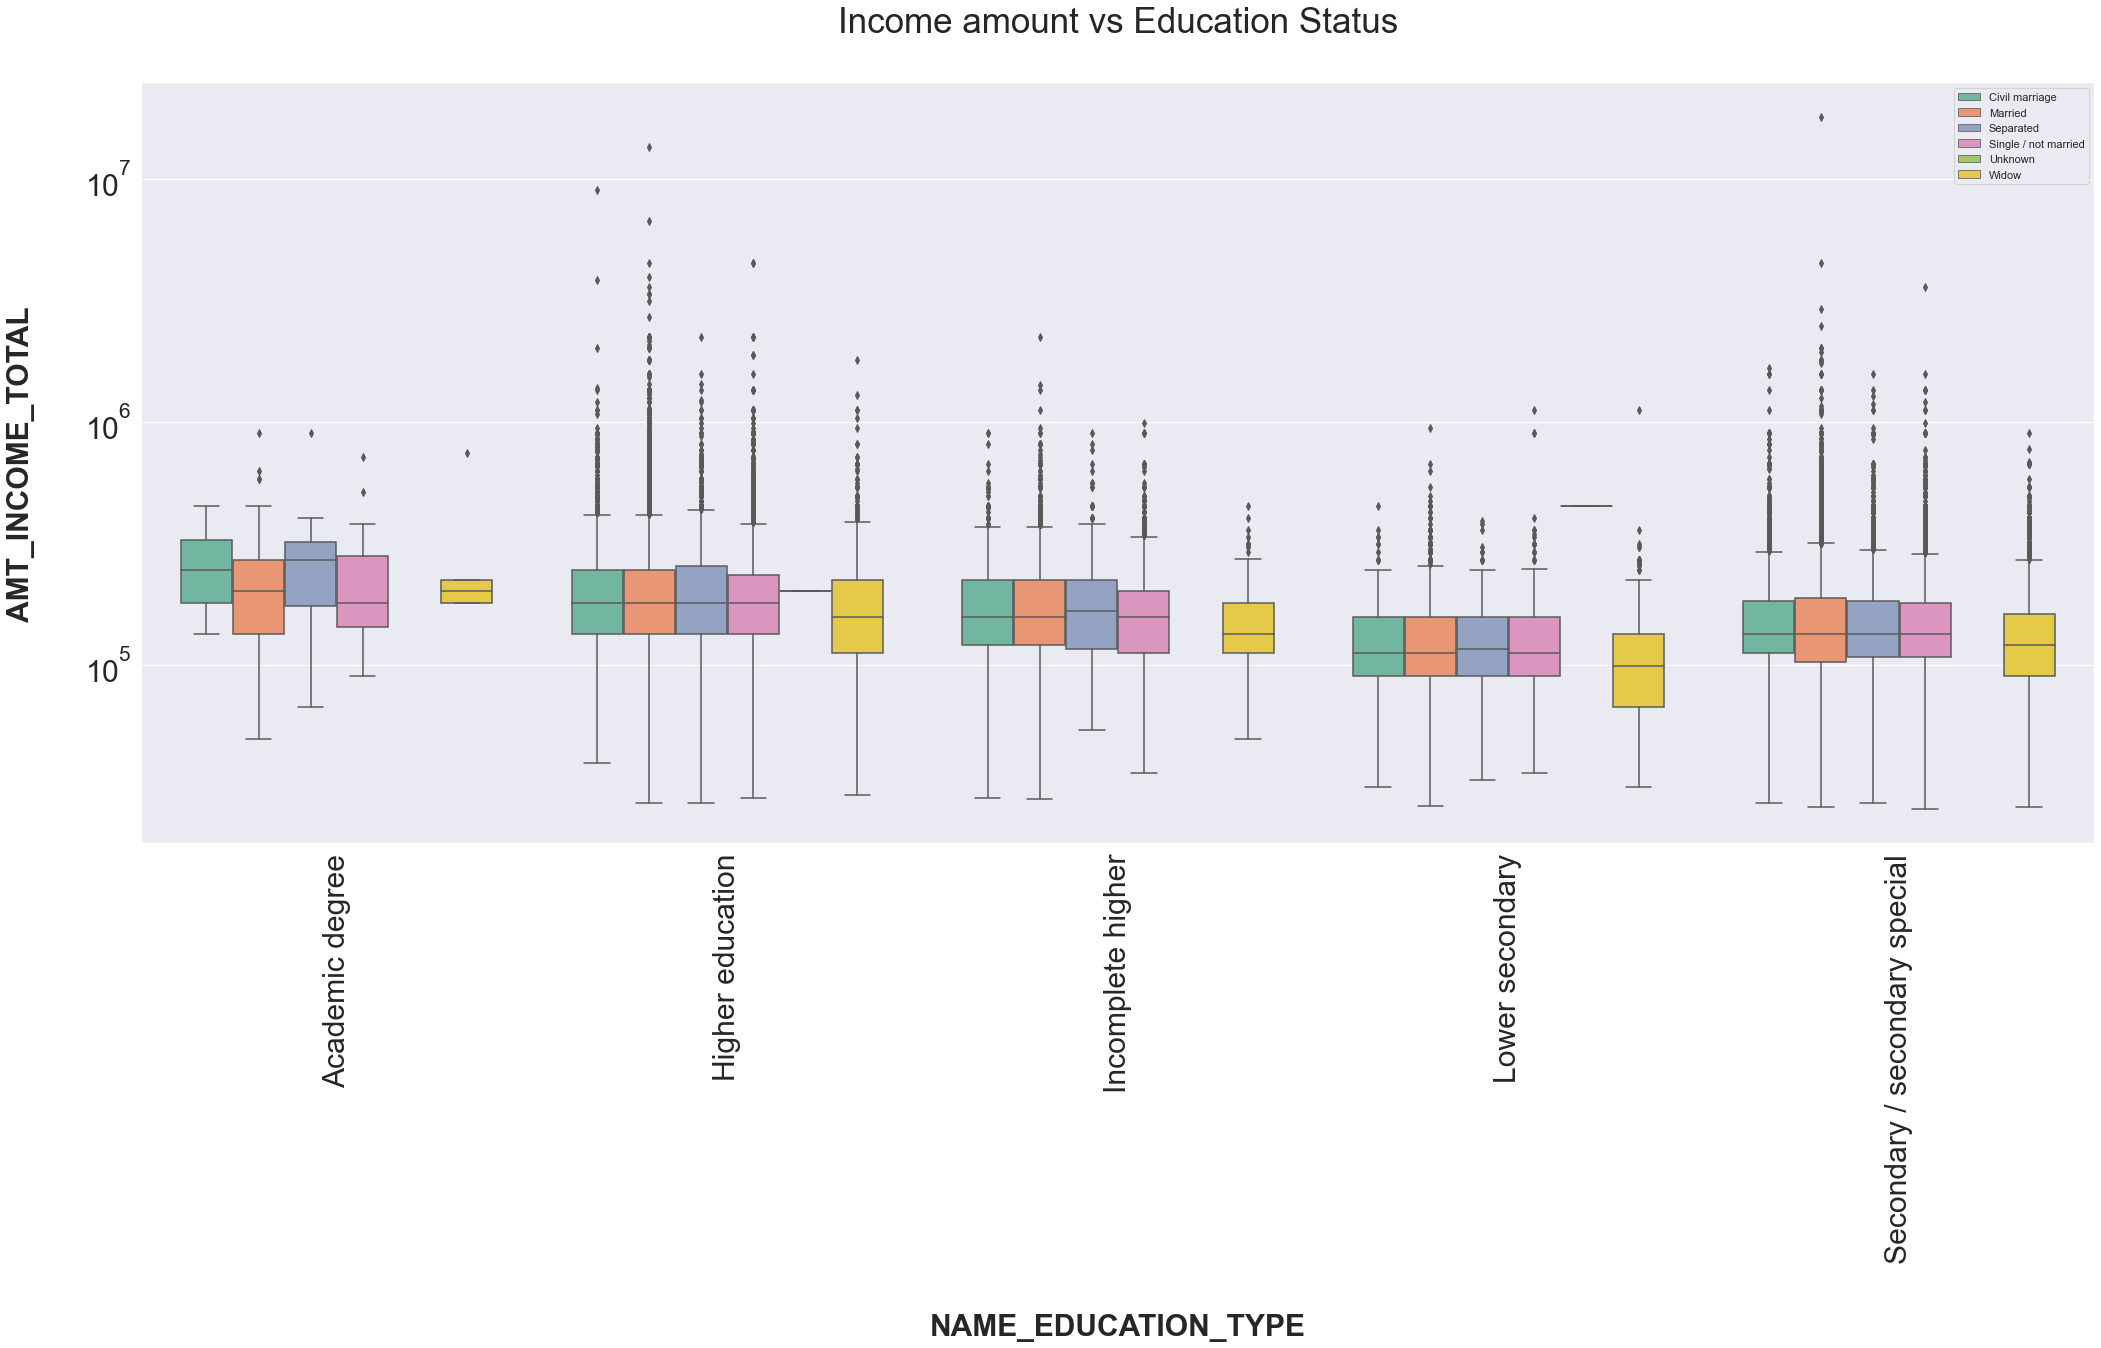

In [52]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Insights:

-  Widow Client with Academic degree have a **very few outliers** and doesn't have First and Third quartile.Also Clients with all type of **family status having academic degree** have very **less outliers** as compared to other type of **education**.


-  Income of the clients with all type of family status having rest of the education type lie Below the First quartile i.e. **`25%`**


-  Clients having Higher **Education**, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a **higher number of outliers**.


-  From the above figure we can say that, some of the clients **having Higher Education tend to have highest Income compared to others.**


-  Though some of the clients who **haven't completed their Higher Education** tend to have **higher Income**.


-  Some of the clients having **Secondary/Secondary Sepcial Eduacation** tend to **have higher income**.

### 6.1.2 Credit Amount Vs Eduacation status Vs  FAMILY_Status   WRT  data Target 0

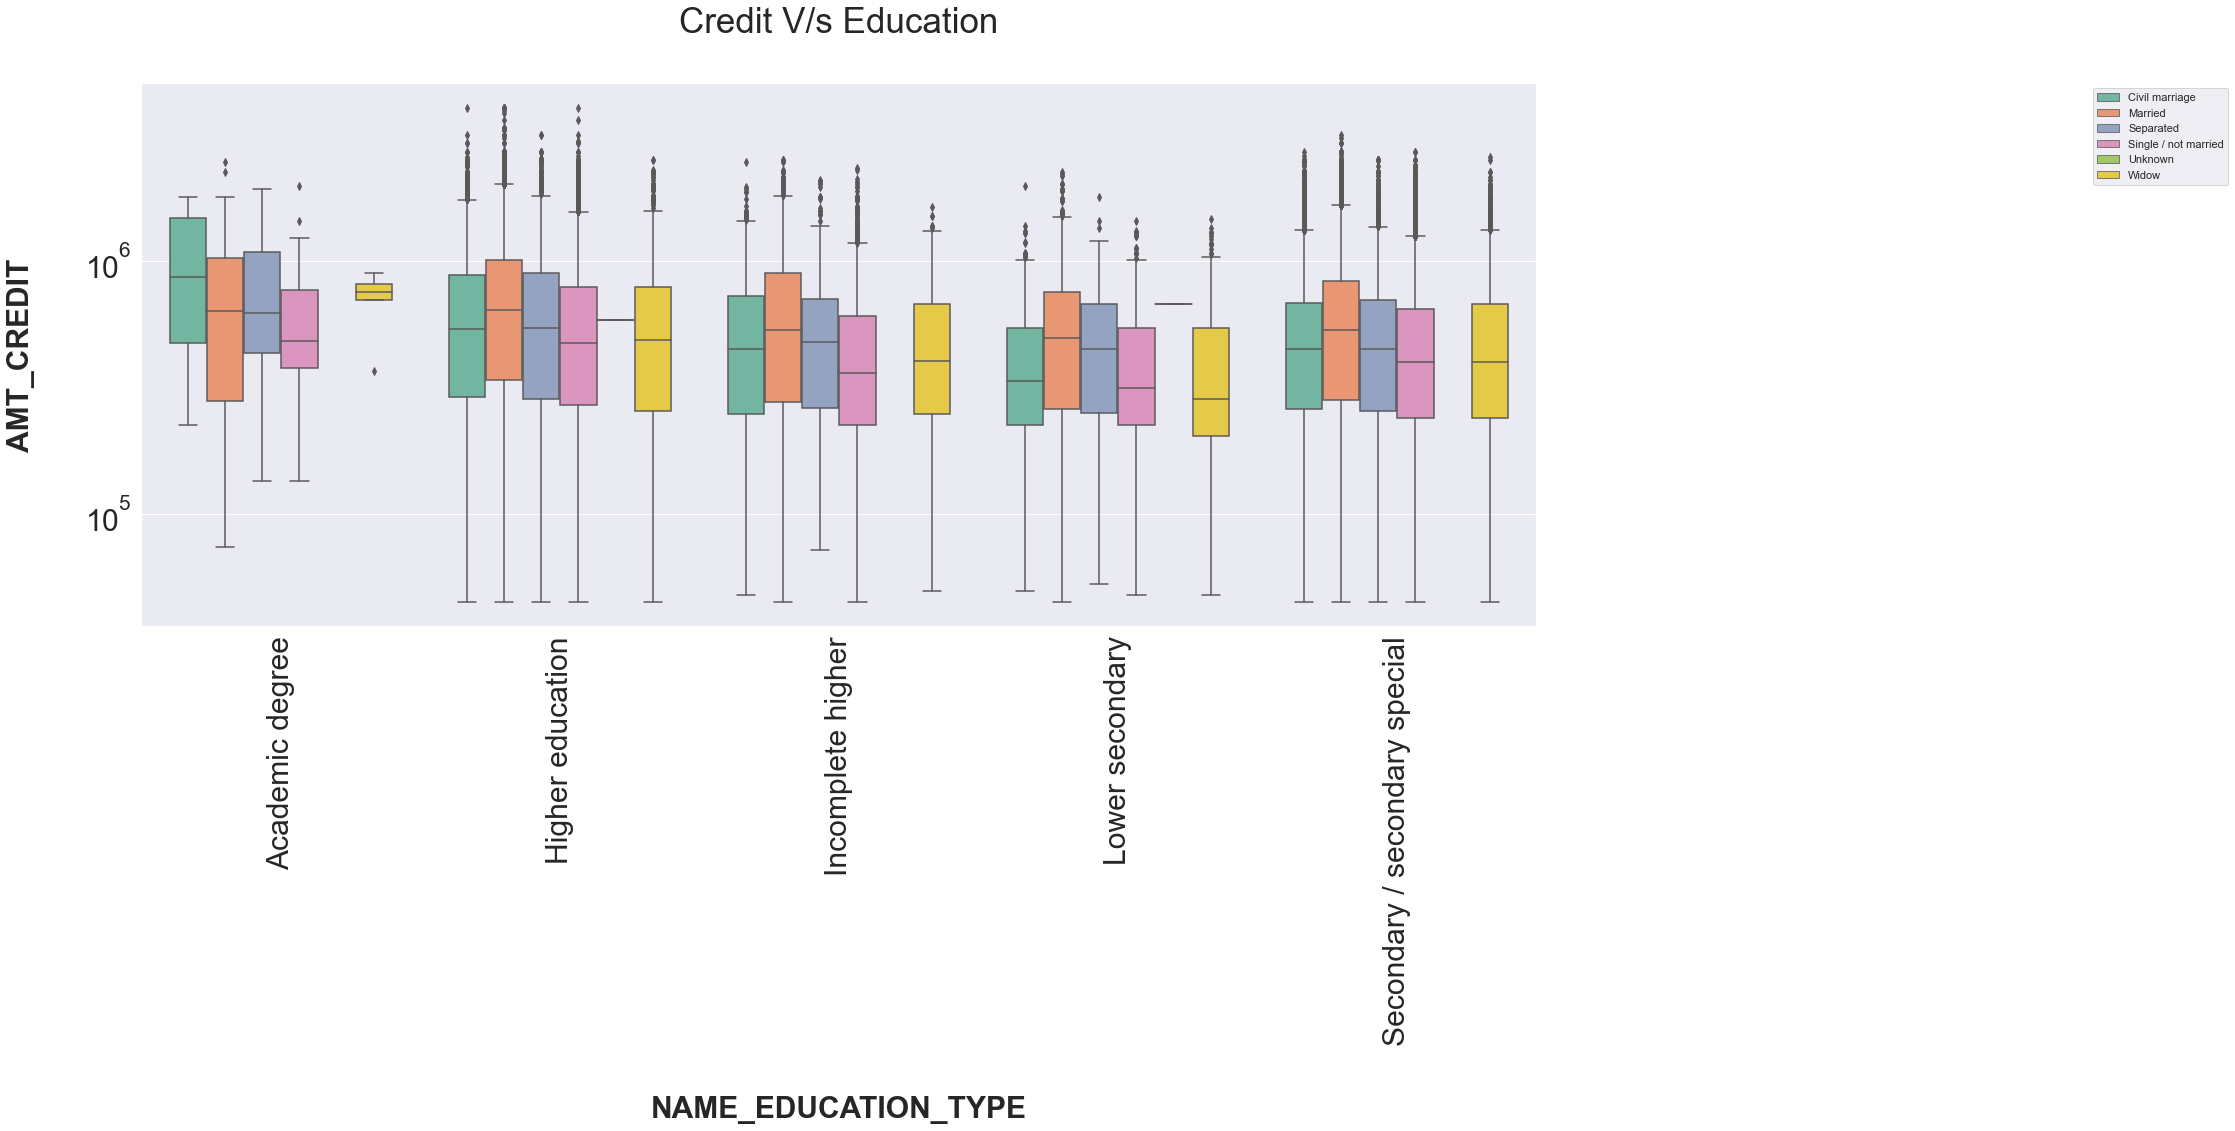

In [53]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Insights:

- Clients with different **Education** type except **Academic degree** have large number of outliers**


- Most of the population i.e. cliends **credit amounts** lie below **25%.**


- Clients with **Academic degree** and who is a widow tend to take **higher** credit loan.**


- Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Eduacation are more likely to take **high amount of credit loan.**

## 6.2.  For Target 1

### 6.2.1 Income_Amount   Vs   Education_Status    Vs   FAMILY_Status  for payment diffculties client (Target 1)

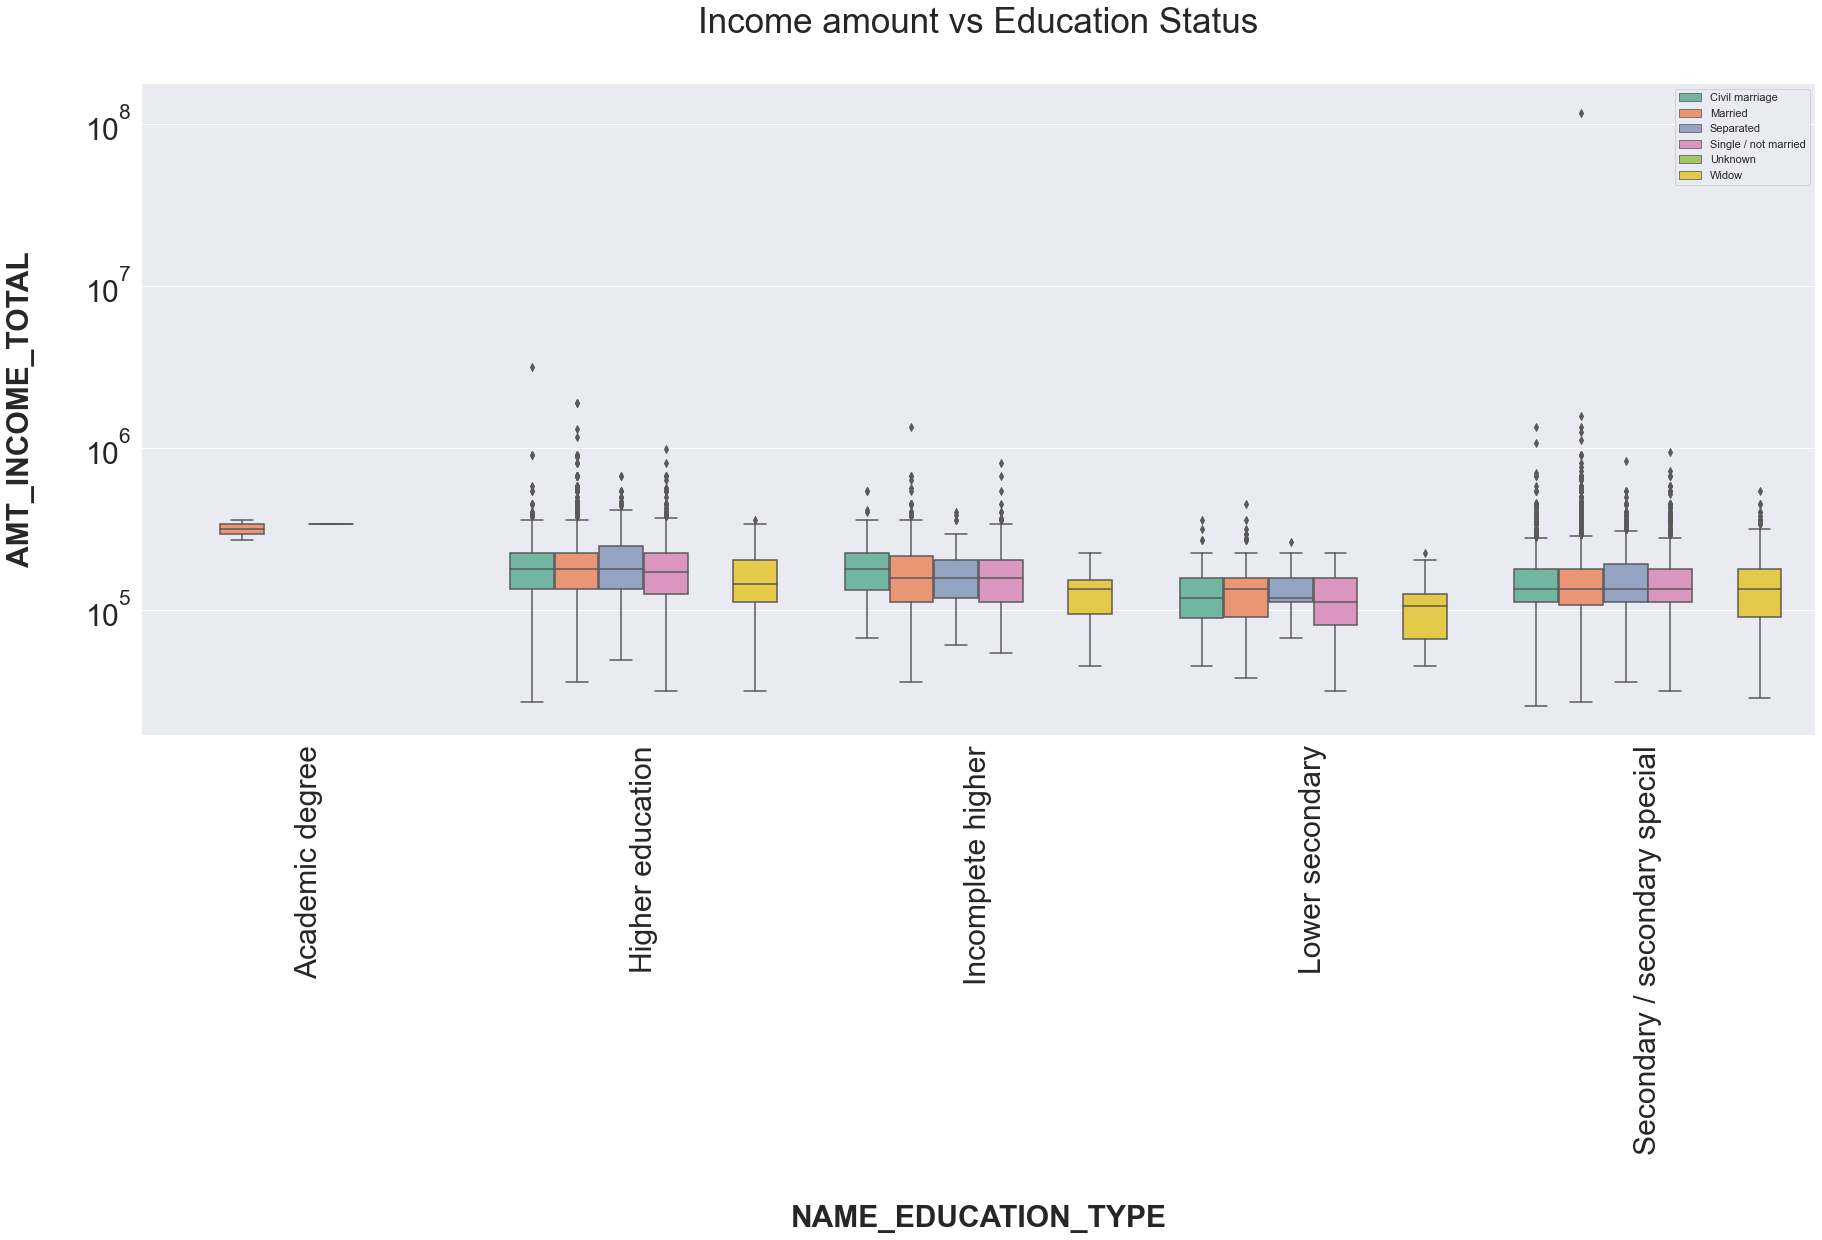

In [54]:
plt.figure(figsize=(30,12)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Insights:

- **Income amount** for Married clients with academic degree is much lesser as compared to others.


- **(Defaulter)** Clients have relatively less income as compared to **Non-defaulters.**


### 6.2.2 Credit Amount Vs Eduacation status Vs  FAMILY_Status   WRT  data Target 1

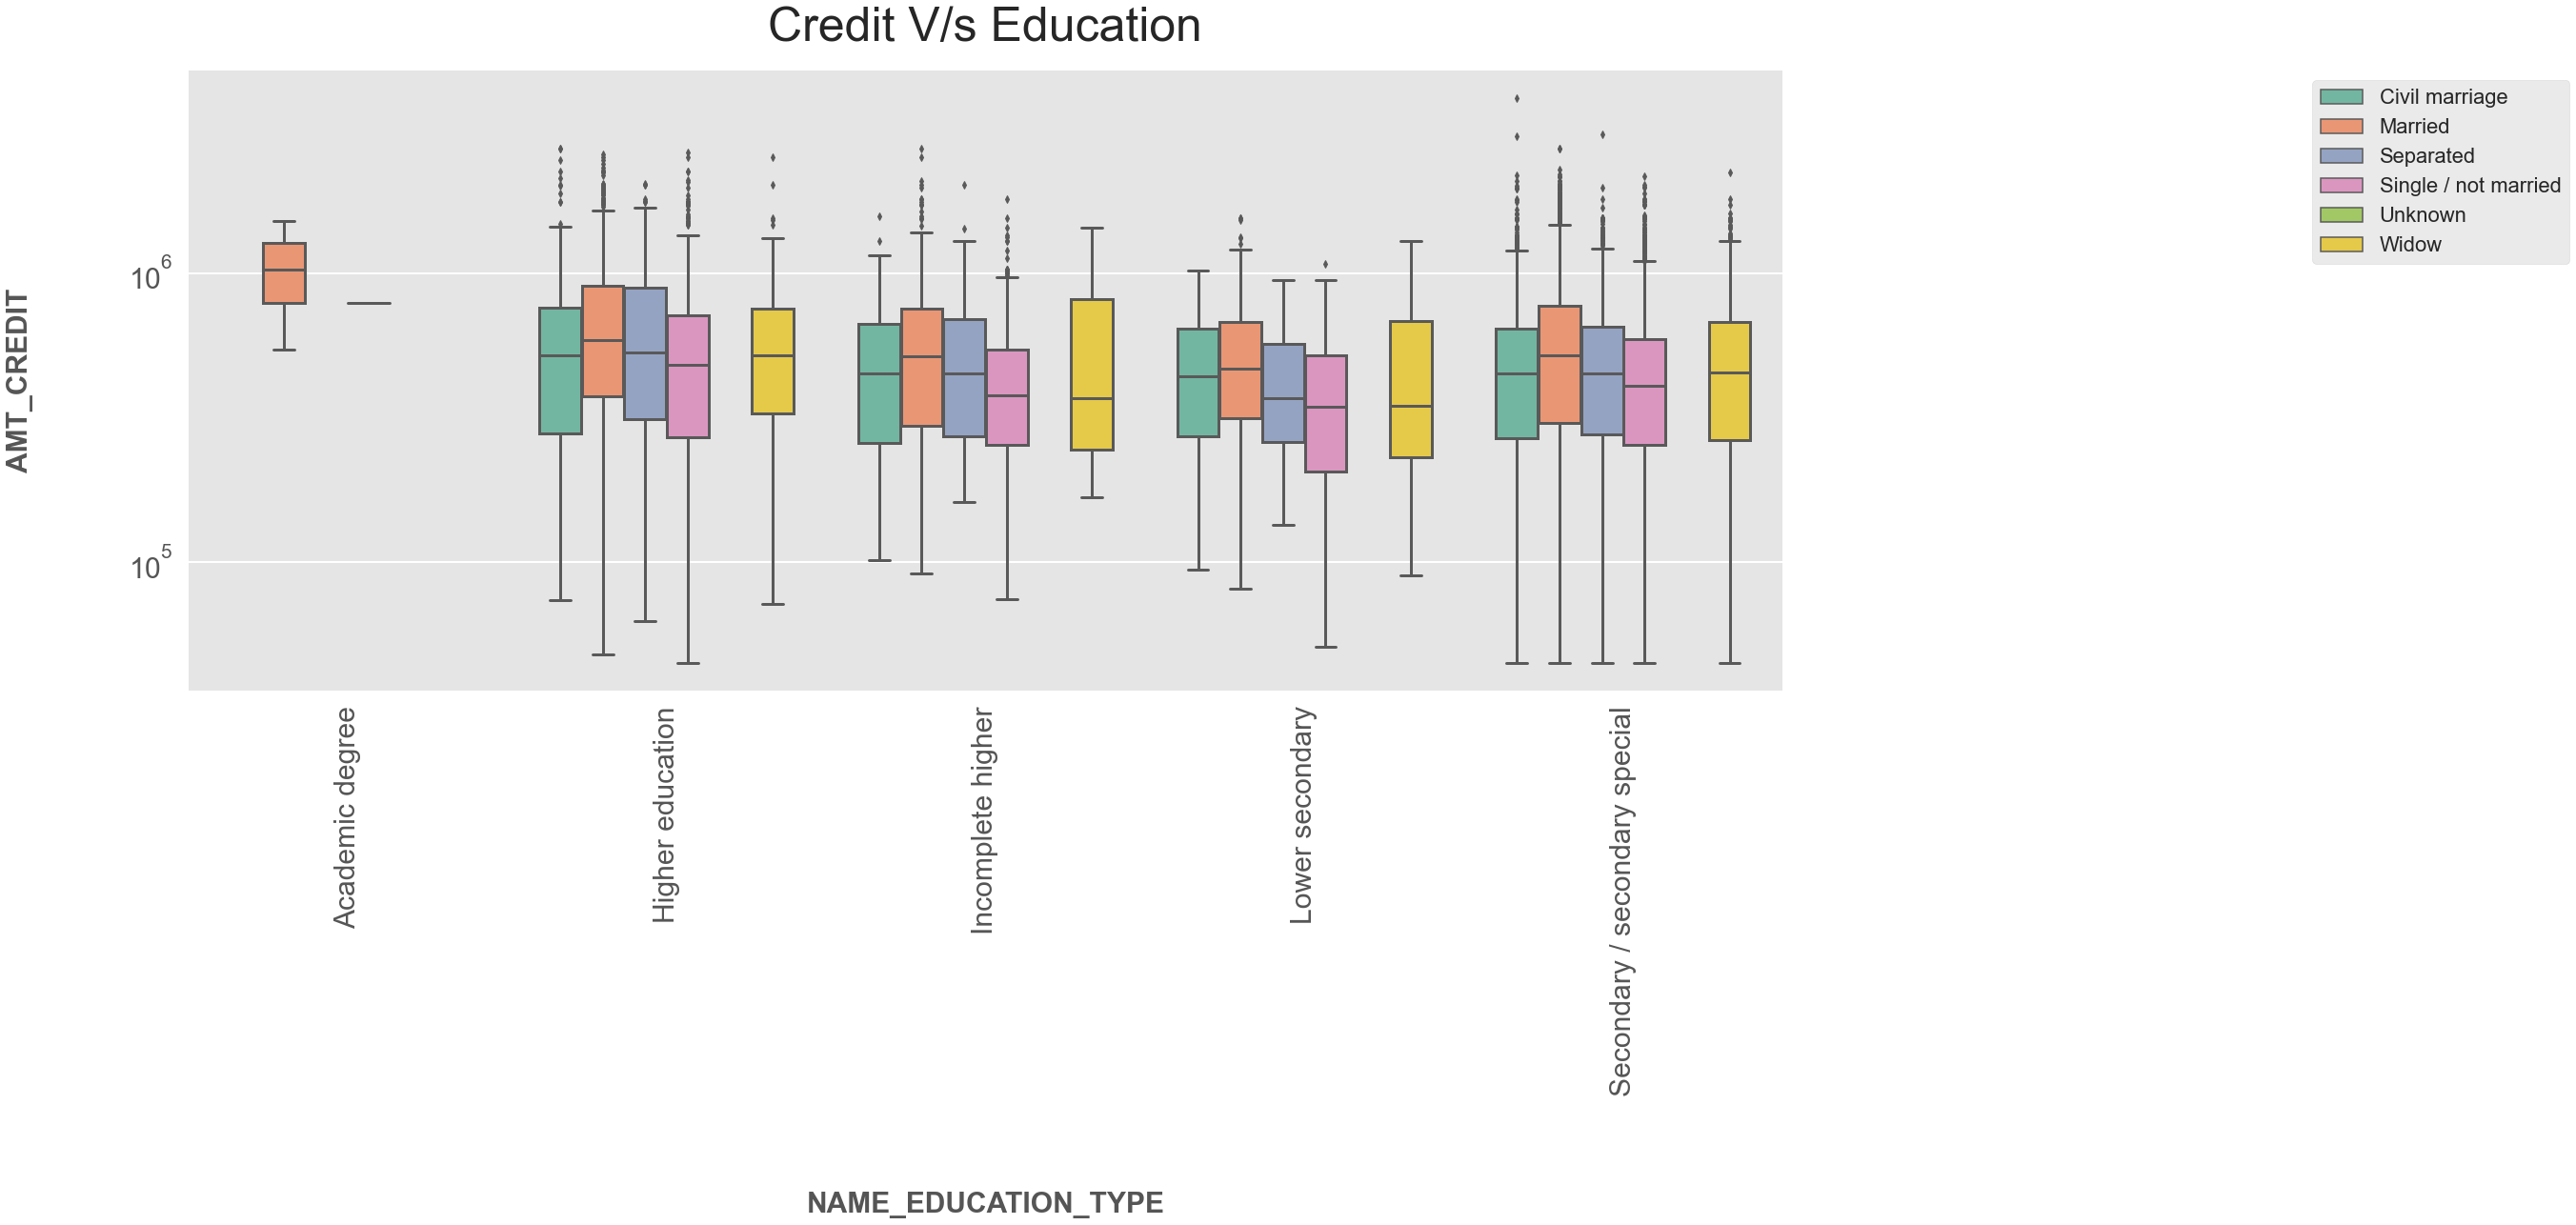

In [159]:
plt.figure(figsize=(30,12))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


 
plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Insights:

- Married client with academic applied for **higher credit loan**. And doesn't have outliers.Single clients eith **academic degree have a very slim boxplot with no outliers**.


- Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Eduacation are more likely to take **high amount of credit loan**.

# 7. Bivariate Analysis of Categorical-Categorical to find the Maximum % Clients with  Loan-Payment Difficulties  

## 7.0 Function for bivariate plots  

In [56]:
def biplot(df,feature,title):
    temp = df[feature].value_counts()
    
# Calculate the percentage of target=1 per category value    

    perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean() 
    perc.sort_values(by='TARGET', ascending=False, inplace=True)
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=("Count of "+ title,"% of Loan Payment difficulties within each category"))
    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=600, width=1000, title_text=title, showlegend=False)
    fig.show()

## 7.1 Distribution of Amount Income Range and the category with maximum %  Loan-Payment Difficulties

In [57]:
biplot(df1 ,'AMT_INCOME_TYPE','Income range')

## Insight:
    
- **Clients having Low income have high risk to default** followed by **clients with medium and very low income.**



- **Clients with  high salaries have minimal risk to default.**

## 7.2 Distribution of Type of Income  and the category with maximum Loan-Payment Difficulties

In [58]:
biplot(df1 ,'NAME_INCOME_TYPE','Income type')

## Insights:
- Though count of **working clients** applying for loan is significantly high , **risk to default in payments is less** as compared to others


- **Count of clients with income type Maternity leave is only 5**, but **risk to default in payments for those is minimum** among all the 
    income types.
    
    
- Same condition is observed in case of **unemployed**.Though count is very low,**risk to default in payments  is low**.


- **Pensioner**,**State servant** and **Commercial associate** have higher risk to default.


## 7.3 Distribution of Contract Type and the category with maximum Loan-Payment Difficulties

In [59]:
biplot(df1 ,'NAME_CONTRACT_TYPE','Contract type')

## Insights:

- **Cash loans** have higher risk to default, Revolving loans have comparatively lower risk for the same .


## 7.4 Distribution of Education Type and the category with maximum Loan-Payment Difficulties

In [60]:
biplot(df1 ,'NAME_EDUCATION_TYPE','Education type')

## Insights:

- Clients having Academic Degree and higher Education have **lower risk to default.**


- Clients having Lower Secondary , Secondary/Secondary Special Education have **very high risk to default.**

## 7.5 Distribution of Housing Type and the category with maximum Loan-Payment Difficulties

In [61]:
biplot(df1 ,'NAME_HOUSING_TYPE','Housing type')

## Insights:


- Applicants living in House/Apartments has the highest number of loan application.While we see that Rented apartment and applicants living with parents have **very high percentage to default**


## 7.6 Distribution of Occupation Type and the category with maximum Loan-Payment Difficulties

In [62]:
biplot(df1 ,'OCCUPATION_TYPE','Occupation type')

## Insights:

- **Low-skill Laborers** have **higher risk to default**


- **Managers**, **High skill** **tech staff** and **Accountants** have relatively **lower risk to default**

## 7.7 Distribution of CODE_GENDER with respect to AMT_INCOME_RANGE  to find maximum % Loan-Payment Difficulties using pivot table

In [63]:
table= pd.pivot_table(df1, values='TARGET', index=['CODE_GENDER','AMT_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

table

NAME_EDUCATION_TYPE          Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_TYPE                                      
F           VERY_LOW                0.000000          0.056068   
            LOW                     0.000000          0.049022   
            MEDIUM                  0.000000          0.050254   
            HIGH                    0.105263          0.041516   
            VERY_HIGH               0.076923          0.037289   
M           VERY_LOW                0.000000          0.080411   
            LOW                     0.000000          0.073305   
            MEDIUM                  0.000000          0.070086   
            HIGH                    0.000000          0.055911   
            VERY_HIGH               0.000000          0.044080   

NAME_EDUCATION_TYPE          Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_TYPE                                       
F           VERY_LOW                  0.086399         0.080193   
            LOW                       0.080075         0.113889   
            MEDIUM                    0.078431         0.096983   
            HIGH                      0.074313         0.038961   
            VERY_HIGH                 0.082251         0.066667   
M           VERY_LOW                  0.123967         0.125000   
            LOW                       0.097778         0.142857   
            MEDIUM                    0.095130         0.150515   
            HIGH                      0.074627         0.081633   
            VERY_HIGH                 0.077586         0.064516   

NAME_EDUCATION_TYPE          Secondary / secondary special  
CODE_GENDER AMT_INCOME_TYPE                                 
F           VERY_LOW                              0.076778  
            LOW                                   0.079523  
            MEDIUM                                0.075692  
            HIGH                                  0.070736  
            VERY_HIGH                             0.065930  
M           VERY_LOW                              0.118066  
            LOW                                   0.123693  
            MEDIUM                                0.113466  
            HIGH                                  0.093484  
            VERY_HIGH                             0.089939

## Insights:

- Female clients with **Academic degree and high income type have higher risk to default**


- Male clients with **Secondary/Secondary Special Education** having all types of **salaries have higher risk to default.**


- Male clients with **Incomplete Education having very low salary have high risk to default.**


- Male Clients with Lower **Secondary Education** having **very low or medium have high risk to default**

# 8. Correlations

## 8.1 Correlations between numerical variables Using "Pair Plots "

**8.1.1 Analysing numerical columns** 

In [64]:
numerical_col = df1.select_dtypes(include='number').columns
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

**8.1.2 Total no of numerical columns**

In [65]:
len(numerical_col)

35

**8.1.3 Pairplot for Target 0 (Loan-Non Payment Difficulties)**

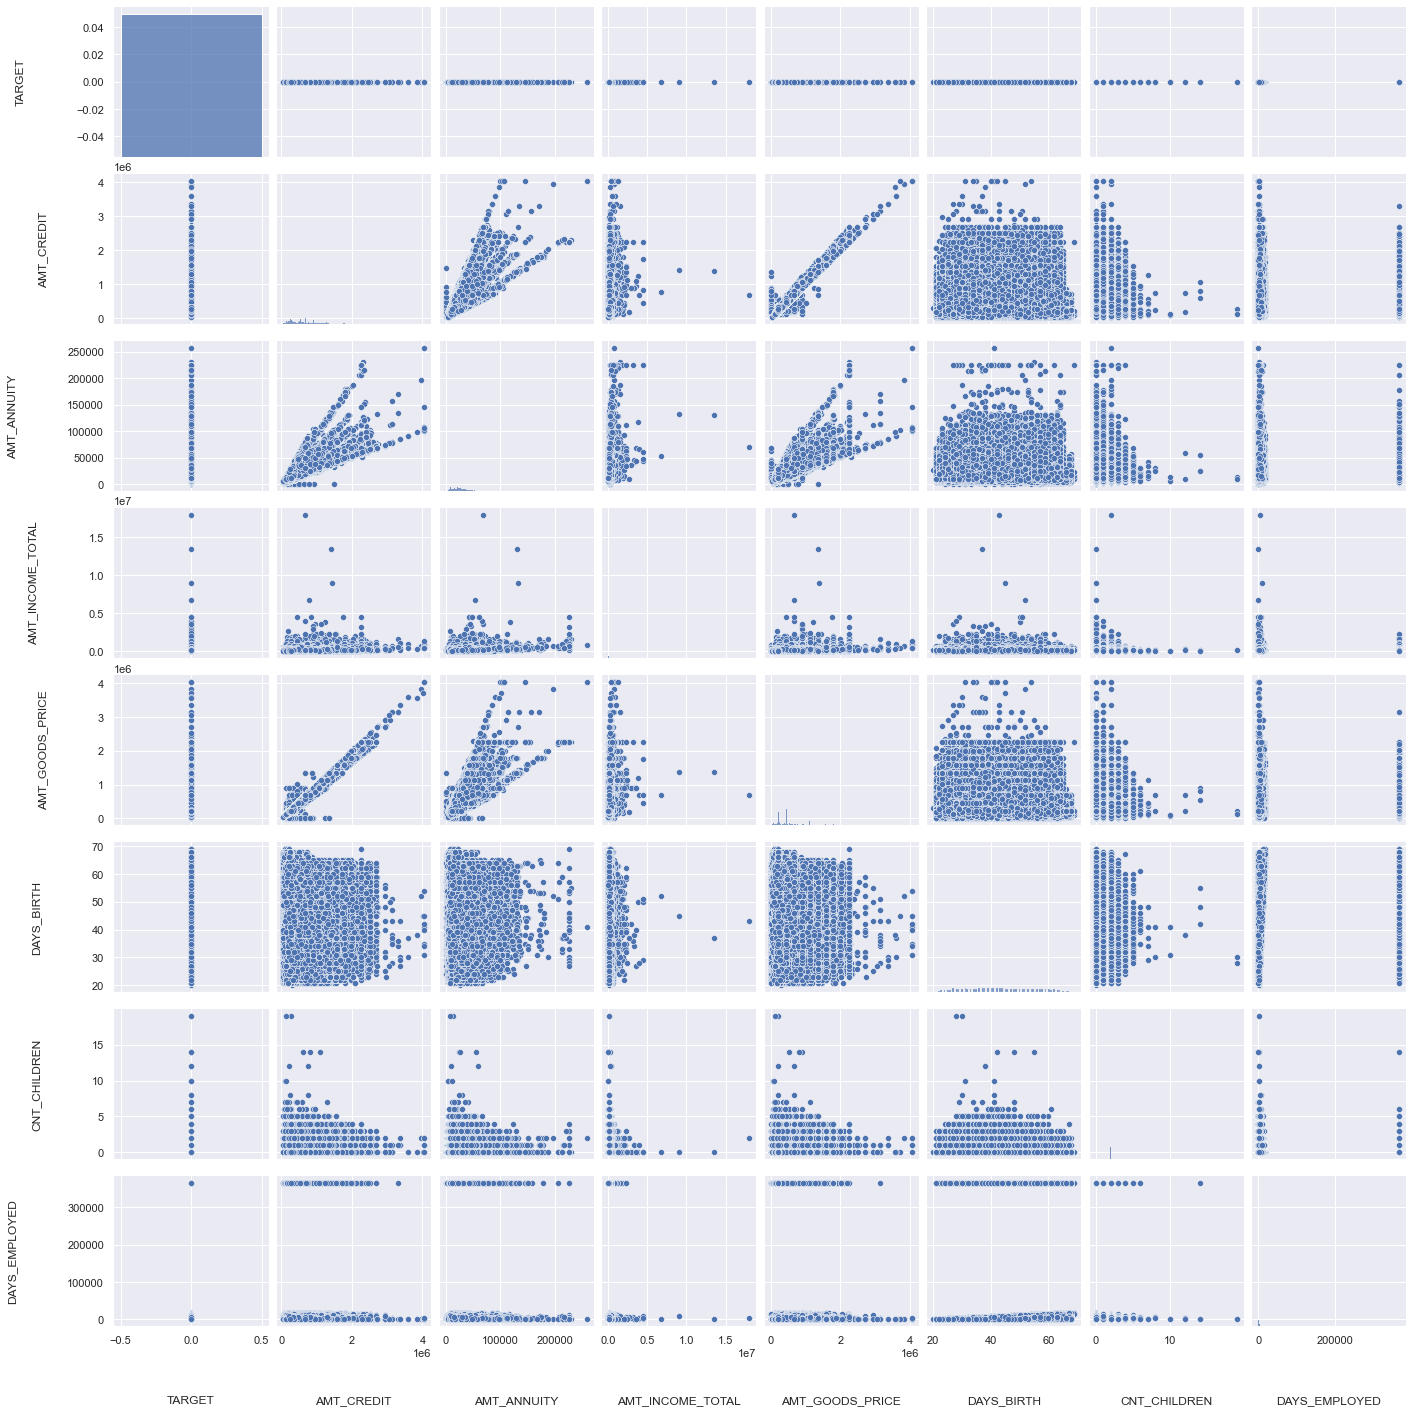

In [66]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

**8.1.4 Pairplot for Target 1 (Loan-Payment Difficulties)**

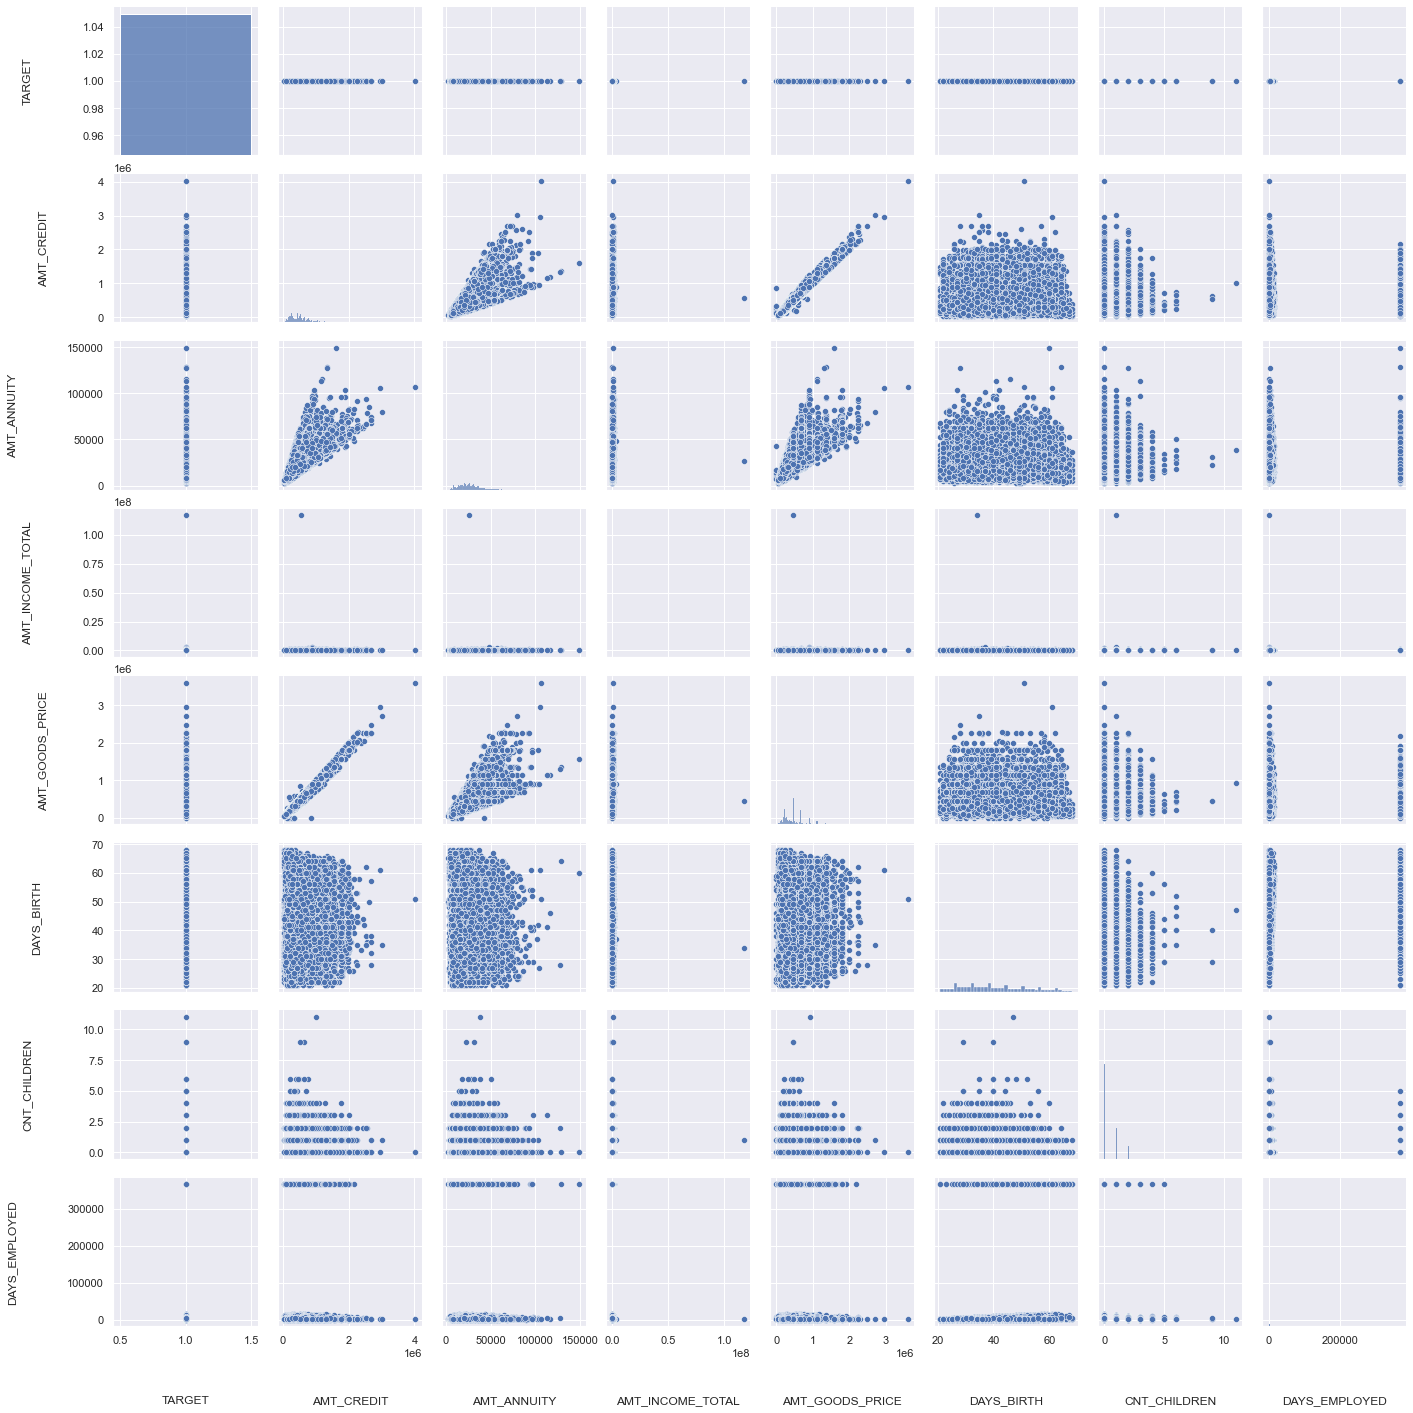

In [67]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

# Insight:

- **`AMT_CREDIT`** and **`AMT_GOODS_PRICE`** are highly correlated variables for both defaulters and non - defaulters. So as the home price increases the loan amount also increases

- **`AMT_CREDIT`** and **`AMT_ANNUITY`** (EMI) are highly correlated variables for both defaulters and non - defaulters . So as the home price increases the EMI amount also increases which is logical
- All three variables **`AMT_CREDIT`**, **`AMT_GOODS_PRICE`** and **`AMT_ANNUITY`** are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for defaulter detection

## 8.2 Correlations between numerical variables  using "Heatmap's"

**8.2.1 Corelations by separating data in to two**

In [68]:
corr0=df1.iloc[0:,2:]
corr1=df1.iloc[0:,2:]

t0=corr0.corr(method='spearman')   # t0 - Corelations distibuted according rank wise for target 0
t1=corr1.corr(method='spearman')   # t1 - Corelations distibuted according rank wise for target 1

**8.2.2 Now, plotting the above correlation with heat map using function "targets_corr" as it is the best choice to visulaize**

In [69]:
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    
    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax= sns.heatmap(data, mask=mask,cmap='RdYlGn')           

## 8.3 For TARGET 0

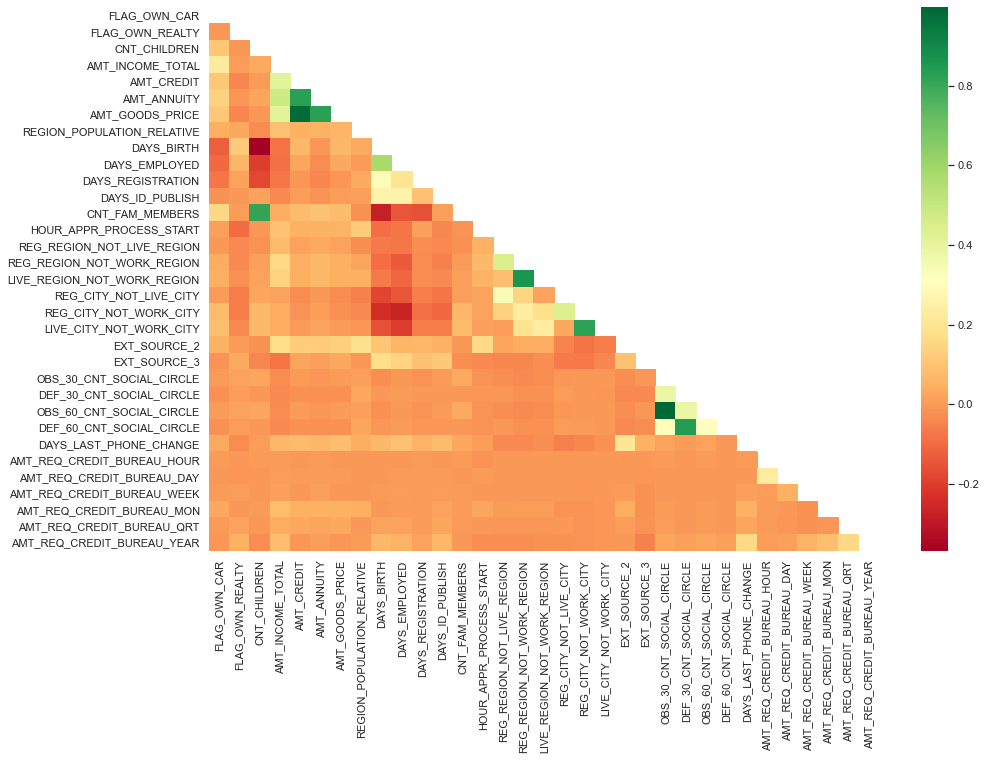

In [70]:
targets_corr(data=t0,title='Correlation for Target 0')

## Insight:

- **`AMT_CREDIT`** is inversely proportional to the **`DAYS_BIRTH`** , peoples belongs to low-age group taking high Credit amount and  vice-versa

- **`AMT_CREDIT`** is inversely proportional to the **`CNT_CHILDREN`**, means Credit amount is higher for less 
  children count client have and vice-versa.

- **`AMT_INCOME_TOTAL`** is inversely proportional to the **`CNT_CHILDREN`**, means more income for less children client have and vice-versa.

- less children client have in densely populated area.

- **`AMT_CREDIT`** is higher to densely populated area.

- **`AMT_INCOME_TOTAL`** is also higher in densely populated area.


## 8.4 For TARGET 1

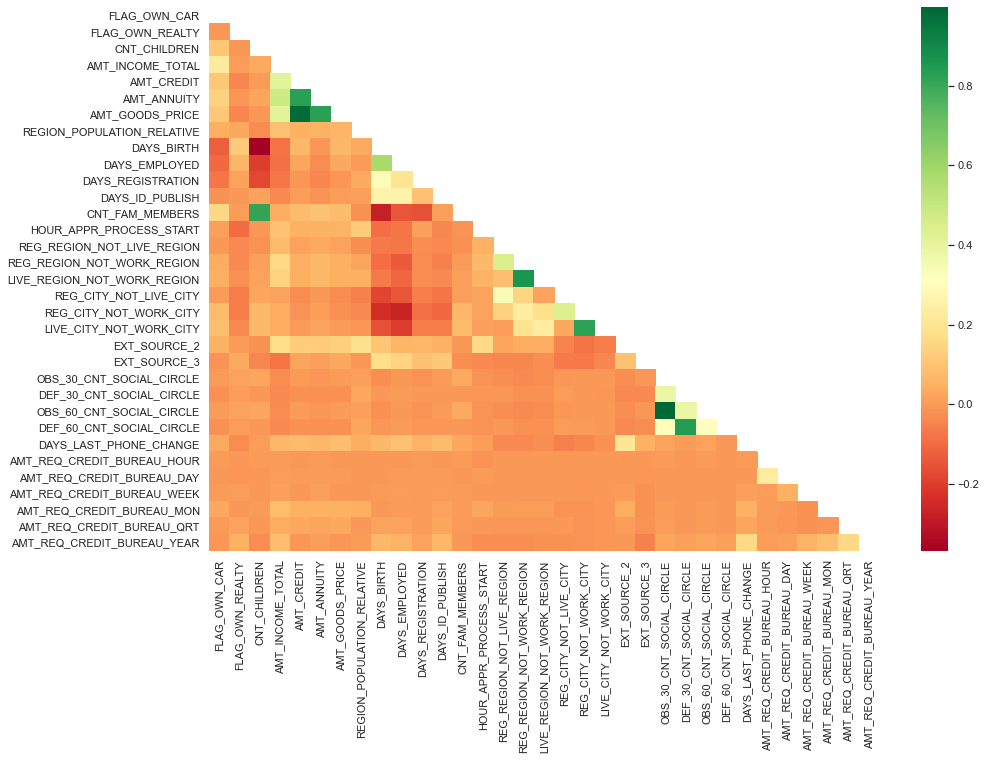

In [71]:
targets_corr(data=t1,title='Correlation for Target 1')

## Insight:

- This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

- The client's permanent address does not match contact address are having less children.

- The client's permanent address does not match work address are having less children.

# 9. Top 10 Correlations for TARGET 0 and TARGET 1

## 9.1  TARGET 0

In [72]:
Columns=Target0.columns  #Collecting all Columns of Target0 

corr=Target0[Columns].corr(method = 'pearson')                        # Finding correlations using corr() func.

corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

top10_corr0=corr.unstack().reset_index() # Top 10 Correlations           

In [73]:
top10_corr0.columns = ['VAR1','VAR2','CORRELATION']  # dividing Correlated variables to Columns "var1" & "Var2"

top10_corr0.dropna(subset=['CORRELATION'],inplace=True)

top10_corr0['CORR_ABS']=top10_corr0['CORRELATION'].abs()

top10_corr0.sort_values('CORR_ABS', ascending=False).head(10)

VAR1                        VAR2  CORRELATION  \
934     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998510   
286              AMT_GOODS_PRICE                  AMT_CREDIT     0.987250   
494              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571   
647  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861   
970     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859371   
755      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381   
287              AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686   
251                  AMT_ANNUITY                  AMT_CREDIT     0.771309   
395                DAYS_EMPLOYED                  DAYS_BIRTH     0.626028   
611   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.446101   

     CORR_ABS  
934  0.998510  
286  0.987250  
494  0.878571  
647  0.861861  
970  0.859371  
755  0.830381  
287  0.776686  
251  0.771309  
395  0.626028  
611  0.446101

## 9.2  TARGET 1

In [74]:
Columns=Target1.columns   #Collecting all Columns of Target0 

corr1=Target1[Columns].corr(method = 'pearson')
corr1=corr1.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))             # Finding correlations using corr() func


top10_corr1=corr1.unstack().reset_index()   # Top 10 Correlations     

In [75]:
top10_corr1.columns = ['VAR1','VAR2','CORRELATION']     # dividing Correlated variables to Columns "var1" & "Var2"

top10_corr1.dropna(subset=['CORRELATION'],inplace=True)

top10_corr1['CORR_ABS']=top10_corr0['CORRELATION'].abs()

top10_corr1.sort_values('CORR_ABS', ascending=False).head(10)


VAR1                        VAR2  CORRELATION  \
934     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998270   
286              AMT_GOODS_PRICE                  AMT_CREDIT     0.983103   
494              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484   
647  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885   
970     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.869016   
755      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540   
287              AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699   
251                  AMT_ANNUITY                  AMT_CREDIT     0.752195   
395                DAYS_EMPLOYED                  DAYS_BIRTH     0.582441   
611   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937   

     CORR_ABS  
934  0.998510  
286  0.987250  
494  0.878571  
647  0.861861  
970  0.859371  
755  0.830381  
287  0.776686  
251  0.771309  
395  0.626028  
611  0.446101

## Insight: 

- **Top 10** correlations in both the Default and non default population are ***`alomost at the same level`*** 

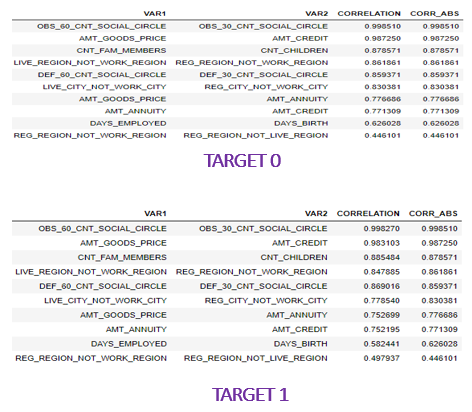

# 10. Loading  Data "previous_application.csv"

**10.0.1 Reading file**

In [76]:
df2 = pd.read_csv("previous_application.csv")
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

**10.0.2 Shape of Dataframe**

In [77]:
df2.shape

(1670214, 37)

**10.0.3 Checking no. of columns with diffrent datatypes**

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**10.0.4 Checking the summary for the numeric columns**

In [79]:
df2.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

**10.0.5 Sorting Percentage of null values in each column in desending  order**

In [80]:
(df2.isnull().sum()/len(df2)*100).sort_values(ascending = False).head(30)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

## 10.1 Data Cleaning

**10.1.1 List of Columns & null counts where null values are more than 35%**

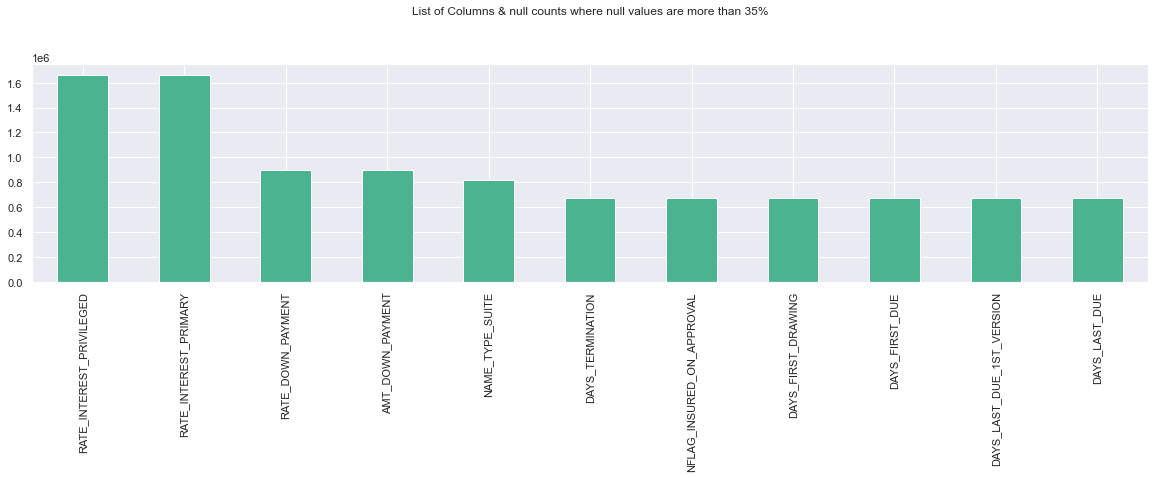

In [81]:
null_col = df2.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df2))]

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")
plt.title('List of Columns & null counts where null values are more than 35%')
plt.show()

**10.1.2 Total no.of columns having percentage of null values > 35%**

In [82]:
len(null_col)

11

**10.1.3 Removing the columns having percentage of null values > 35%**

In [83]:

label = list(null_col.index.values) #Making list of column names having null values greater than 35%
df2.drop(labels = label,axis=1,inplace = True) #Droping those columns


**10.1.4 Shape of new data frame after removing null values >35%**

In [84]:
df2.shape

(1670214, 26)

**10.1.5 Checking the % of null values for each column in new dataset again for confirmation**

In [85]:
null = (df2.isnull().sum()/len(df2)*100).sort_values(ascending = False).head(50)
null.head(30)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_YIELD_GROUP                0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

## 10.3 Handling Missing Values       

### 10.3.1 Imputing Columns having null values ≤ 25% with Mode values for numeric columns except for continuous numeric columns we imputed with Median value

In [86]:
df2.AMT_GOODS_PRICE.fillna(df2.AMT_GOODS_PRICE.median(),inplace = True)

df2.AMT_ANNUITY.fillna(df2.AMT_ANNUITY.mode()[0],inplace = True)

df2.CNT_PAYMENT.fillna(df2.CNT_PAYMENT.mode()[0],inplace = True)

**10.3.2 Checking  if there are still null values or not in the dataframe**

In [87]:
(df2.isnull().sum()/len(df2)*100).sort_values(ascending=False)

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
NAME_YIELD_GROUP               0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000


## 10.4 Handling Errors

**10.4.1 Removing the column values of 'XNA' and 'XAP'**

In [88]:
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df2.shape  #Cheking shape after removing 

(69635, 26)

**10.4.2 Merging the Application dataset with previous appliaction dataset by creating new variable** ***`"df3"`***

In [89]:
df3=pd.merge(left=df1,right=df2,how='inner',on='SK_ID_CURR',suffixes='_x')

**10.4.3 Renaming the column names after merging**


In [90]:
df3 = df3.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


## 10.5 Loan Distributions and Purposes

### 10.5.1  Percentage Count of  `NAME_CONTRACT_STATUS` and `NAME_CLIENT_TYPE`

In [158]:

fig = make_subplots(rows=1, cols=2,subplot_titles=("Percentage of NAME_CLIENT_TYPE","Percentage of NAME_CONTRACT_STATUS"),
                   specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = df3['NAME_CLIENT_TYPE'].value_counts().index.to_list(),
                     values = df3['NAME_CLIENT_TYPE'].value_counts().to_list() ,textinfo='label+percent'),1, 1)

fig.add_trace(go.Pie(labels = df3['NAME_CONTRACT_STATUS'].value_counts().index.to_list(), 
                     values = df3['NAME_CONTRACT_STATUS'].value_counts().to_list(), textinfo='label+percent'),1, 2)


fig.update_traces(hole=.4,showlegend=False)      # Use `hole` to create a donut-like pie chart

fig.show()

## Insights:
**`NAME_CLIENT_TYPE`**
- Around 80.7% clients were repeaters applying for loan.
- 14.5% clients are new applying for the loan.

**`NAME_CONTRACT_STATUS`**

Percentage of contracts approved or not in previous applications

- Approved     :- 38.8%
- Refused      :- 58.5%
- Canceled     :- 2.3%
- Unused offer :- 0.31%

In [142]:
df3.CHANNEL_TYPE.value_counts()

Credit and cash offices       42177
AP+ (Cash loan)                7198
Country-wide                   4693
Channel of corporate sales     2770
Contact center                 2365
Stone                           113
Regional / Local                 97
Name: CHANNEL_TYPE, dtype: int64

### 10.5.2 **`NAME_CONTRACT_STATUS`** **with** **`NAME_CASH_LOAN_PURPOSE`** **based on  logarithmic scale**

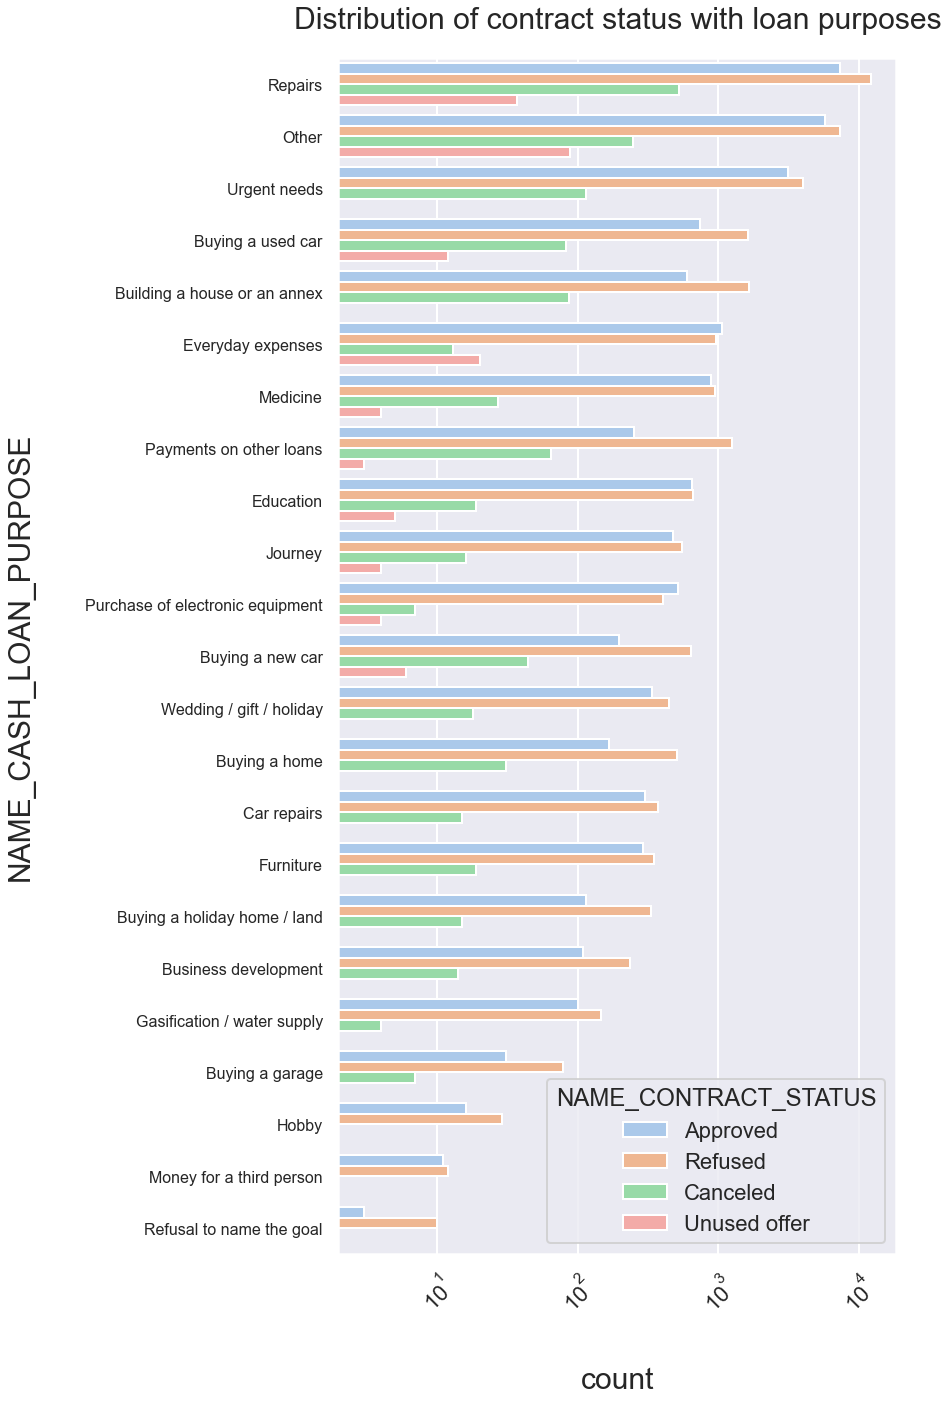

In [95]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of contract status with loan purposes')



ax = sns.countplot(data = df3, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df3['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')



## Insight:


- Most rejection of loans came from purpose **`"Repairs"`**.

- For **`"Education"`** & **`"Medicine"`** purposes we have equal number of approves and rejection

- **`"Payign other loans"`** and **`"Buying a new car'`** is having significant higher rejection than approves.







### 10.5.3 **`TARGET`** with **`NAME_CASH_LOAN_PURPOSE`** **based on  logarithmic scale**

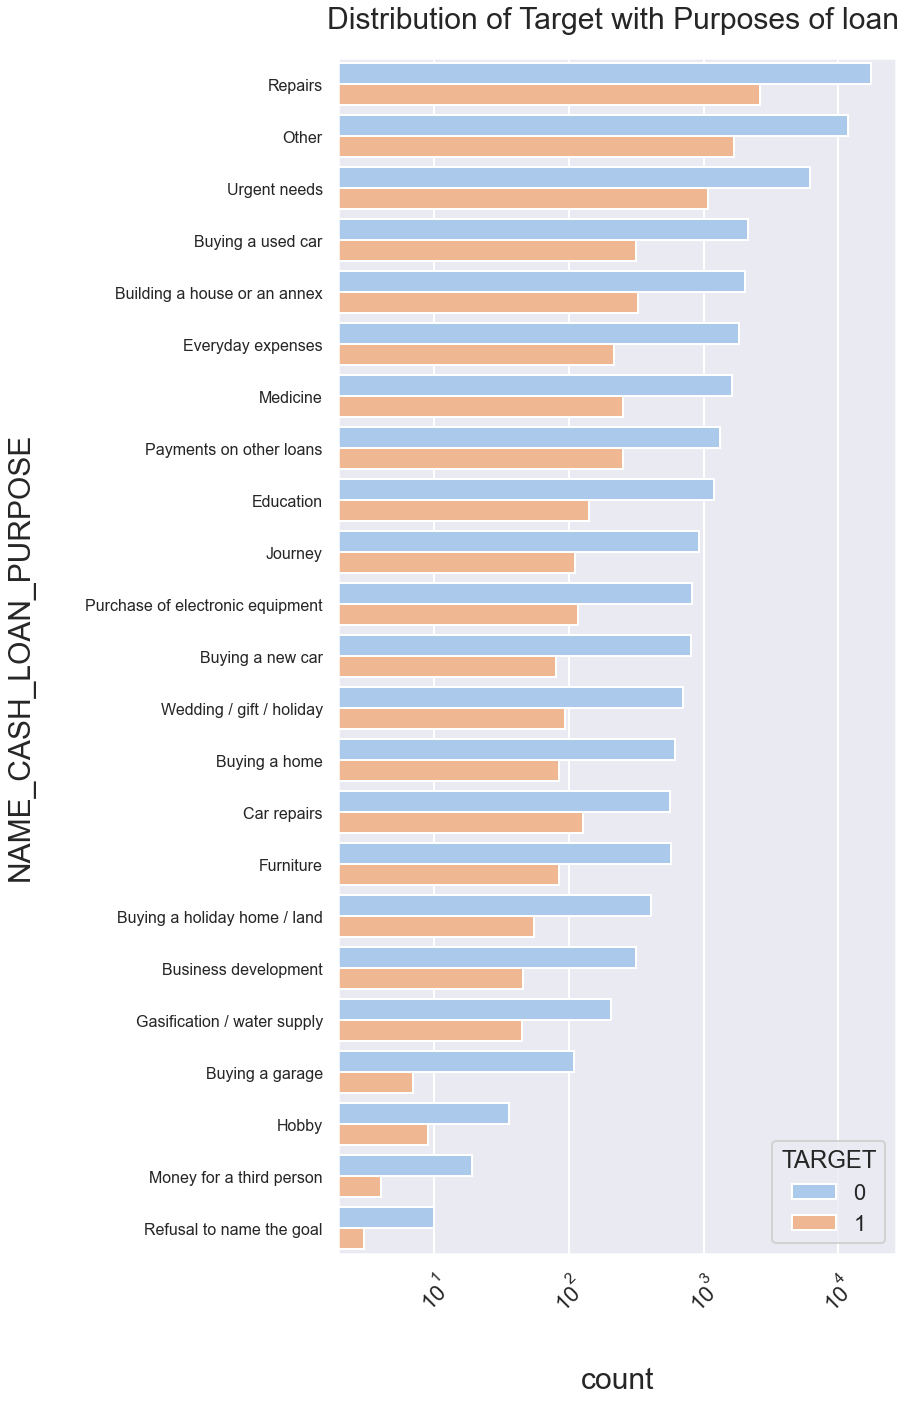

In [92]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of Target with Purposes of loan ')

ax = sns.countplot(data = df3, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df3['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='pastel')



## Insight:


- Here also there is a high variation for  **`"Repairs"`** for both the targets 

- Comparing **`"Education"`** & **`"Medicine"`** purposes ,  Medicine  there is high no. of cliets having difficulties for re payement the loan amount compare to **`"Education"`**

- **`Buying used Car`"** and **`Building purpose`** client having difficulties in payment have equal ratio

## 10.6 Distibution between **`AMT_CREDIT`** &  **`NAME_HOUSING_TYPE`** **based on  logarithmic scale**

**10.6.1 Checking the columns in the new dataframe**

In [93]:
df3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU

**10.6.2 Barplot Distibution** for columns **`AMT_CREDIT`** &  **`NAME_HOUSING_TYPE`**

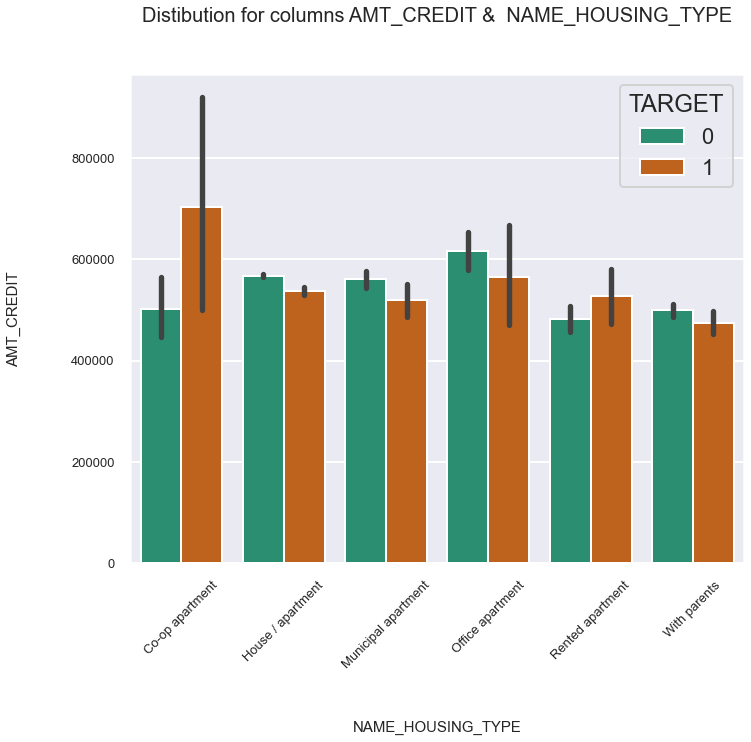

In [94]:
plt.figure(figsize=(11,9))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30
sns.barplot(data =df3, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE',palette='Dark2')
plt.title("Distibution for columns AMT_CREDIT &  NAME_HOUSING_TYPE\n")
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=13, rotation=360)
plt.show()

## Insight:
- Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.





















# FINAL  CONCLUSION

**After all these analysis we conculded that** 

- We observe a decrease in the percentage of Payment Difficulties who are pentioners and an increase in the percentage of Payment Difficulties who are working when compared the percentages of both Payment Difficulties and non-Payment Difficulties.


- We observe a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the the percentage of single and civil married with Loan Payment Difficulties when comapred with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties


- We observe an increase in percentage of Loan Payment Difficulties whose educational qualifications are secondary/secondary special and a decrease in the percentage of Loan Payment Difficulties who have completed higher education when compared with the percentages of Loan Payment Difficulties and Loan Non-Payment Difficulties



- The count of ‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 17%. Hence, client with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters.


- The count of ‘Lower Secondary’ in ‘NAME_EDUCATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 11%. Hence, client with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters.


- Banks should focus more on contract type Student ,pensioner and Businessman with housing type other than Co-op apartment,Office apartment for successful payments.


- Banks should focus less on income type Working as they are having most number of unsuccessful payments.


- Also with loan purpose Repair is having higher number of unsuccessful payments on time.


- Get as much as clients from housing type With parents as they are having least number of unsuccessful payments.
